__author__ = 'Ricardo Pasquini'

# Counting tweets at the hexagon level. Complete procedure

Overview: This code counts georeferenced tweets at the hexagon level. Hexagons are uniquely identified in space. We use Uber's H3 library for this purpose.  
The code  also performs a home location prediction for each user. This allows later counting tweets by whether they were tweeted by residents, residents of neighbors hexagons, or non-residents.
The project was designed to be scalable to millions of tweets. The process is done with MongoDB.

By default the project generates the following collections on the Mongo database:

tweets: Collection containing tweets. This collection is modified by incorporating the corresponding hex id. \
users: Collection containing users. This collection is modified by incorporating the home location data.\
hexcounts: Collection containing counts of tweets.


In [82]:
import sys
sys.path.append("../") 
import databasepopulation
import communicationwmongo as commu
import home_location as home
import analysis as a
import pymongo
from pymongo.errors import BulkWriteError
import pandas as pd
import my_h3_functions as myh3

In [83]:
import importlib
importlib.reload(databasepopulation)
importlib.reload(home)
importlib.reload(a)
importlib.reload(myh3)

<module 'my_h3_functions' from '..\\my_h3_functions.py'>

# Counting tweets at the hexagon level. Complete procedure

This version of the code assumes that a different database will be used for each city.


If necessary check your current location with the following command:

In [84]:
pwd

'C:\\Users\\emman\\Documents\\git\\twitter_and_displacement\\notebooks'

# 0. Connect to Mongo and define a specific database

By default connect to Mongo running on a localhost. 
Requires manually changing the parameters if working on a cloud environment

I will use the name buenosaires as the db example. Recall each database for each city.


In [85]:
db=commu.connecttoLocaldb(database='twitter_sf')

In [86]:
db.twitter_sf

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'twitter_sf'), 'twitter_sf')

# 1. Raw data to Mongo
This function populates the files containing tweets into Mongo.
Assumes files are named like: ba_2012.csv, etc.
Choose start and end years.


In [18]:
databasepopulation.populatetweets(db, path='C:/Users/Emman/Downloads/', cityprefix='sf', yearstart=2012, yearend=2012)

Now populating year  2012
process completed


# 2. Adding Hexids to tweets 
This function includes hexagons ids to each tweet.  

In [91]:
databasepopulation.addhexjob(db)

 iter: 1  time: 0.4258584976196289
 iter: 2  time: 0.2642951011657715
 iter: 3  time: 0.2413637638092041
 iter: 4  time: 0.40889501571655273
 iter: 5  time: 0.5235989093780518
 iter: 6  time: 0.3730039596557617
 iter: 7  time: 0.24434423446655273
 iter: 8  time: 0.2204127311706543
 iter: 9  time: 0.19148874282836914
 iter: 10  time: 0.18849587440490723
 iter: 11  time: 0.24135398864746094
 iter: 12  time: 0.22140765190124512
 iter: 13  time: 0.1964402198791504
 iter: 14  time: 0.20046162605285645
 iter: 15  time: 0.22838902473449707
 iter: 16  time: 0.2373645305633545
 iter: 17  time: 0.25232696533203125
 iter: 18  time: 0.18749666213989258
 iter: 19  time: 0.27426719665527344
 iter: 20  time: 0.36291980743408203
 iter: 21  time: 0.284238338470459
 iter: 22  time: 0.24335002899169922
 iter: 23  time: 0.3261284828186035
 iter: 24  time: 0.21043729782104492
 iter: 25  time: 0.20345592498779297
 iter: 26  time: 0.17955327033996582
 iter: 27  time: 0.1915116310119629
 iter: 28  time: 0.244

 iter: 222  time: 0.15055632591247559
 iter: 223  time: 0.16559839248657227
 iter: 224  time: 0.15693211555480957
 iter: 225  time: 0.15554261207580566
 iter: 226  time: 0.15362095832824707
 iter: 227  time: 0.1546001434326172
 iter: 228  time: 0.15760445594787598
 iter: 229  time: 0.15769171714782715
 iter: 230  time: 0.1565864086151123
 iter: 231  time: 0.17155861854553223
 iter: 232  time: 0.15972471237182617
 iter: 233  time: 0.15474534034729004
 iter: 234  time: 0.1546025276184082
 iter: 235  time: 0.16364407539367676
 iter: 236  time: 0.15957307815551758
 iter: 237  time: 0.15259218215942383
 iter: 238  time: 0.16032958030700684
 iter: 239  time: 0.15513372421264648
 iter: 240  time: 0.15558791160583496
 iter: 241  time: 0.15991544723510742
 iter: 242  time: 0.15961146354675293
 iter: 243  time: 0.1584923267364502
 iter: 244  time: 0.1625659465789795
 iter: 245  time: 0.17597246170043945
 iter: 246  time: 0.15554070472717285
 iter: 247  time: 0.15462565422058105
 iter: 248  time:

 iter: 439  time: 0.1580350399017334
 iter: 440  time: 0.1556241512298584
 iter: 441  time: 0.16663861274719238
 iter: 442  time: 0.15556716918945312
 iter: 443  time: 0.15459179878234863
 iter: 444  time: 0.15554571151733398
 iter: 445  time: 0.1526317596435547
 iter: 446  time: 0.15956902503967285
 iter: 447  time: 0.15259289741516113
 iter: 448  time: 0.15255451202392578
 iter: 449  time: 0.1526012420654297
 iter: 450  time: 0.1485905647277832
 iter: 451  time: 0.15460848808288574
 iter: 452  time: 0.15657830238342285
 iter: 453  time: 0.16057109832763672
 iter: 454  time: 0.15408921241760254
 iter: 455  time: 0.1515955924987793
 iter: 456  time: 0.15061211585998535
 iter: 457  time: 0.15572786331176758
 iter: 458  time: 0.152815580368042
 iter: 459  time: 0.1690809726715088
 iter: 460  time: 0.15458989143371582
 iter: 461  time: 0.1505599021911621
 iter: 462  time: 0.15961003303527832
 iter: 463  time: 0.151594877243042
 iter: 464  time: 0.15214109420776367
 iter: 465  time: 0.1595

 iter: 658  time: 0.15683794021606445
 iter: 659  time: 0.15873932838439941
 iter: 660  time: 0.171630859375
 iter: 661  time: 0.15259194374084473
 iter: 662  time: 0.18550348281860352
 iter: 663  time: 0.16655492782592773
 iter: 664  time: 0.1711430549621582
 iter: 665  time: 0.15455245971679688
 iter: 666  time: 0.16074490547180176
 iter: 667  time: 0.15258240699768066
 iter: 668  time: 0.15226531028747559
 iter: 669  time: 0.15842580795288086
 iter: 670  time: 0.15781474113464355
 iter: 671  time: 0.15165305137634277
 iter: 672  time: 0.17191648483276367
 iter: 673  time: 0.15924739837646484
 iter: 674  time: 0.16059160232543945
 iter: 675  time: 0.1555626392364502
 iter: 676  time: 0.1571338176727295
 iter: 677  time: 0.1637740135192871
 iter: 678  time: 0.15473270416259766
 iter: 679  time: 0.15259337425231934
 iter: 680  time: 0.15757393836975098
 iter: 681  time: 0.1710035800933838
 iter: 682  time: 0.15855669975280762
 iter: 683  time: 0.15361332893371582
 iter: 684  time: 0.14

 iter: 876  time: 0.17893719673156738
 iter: 877  time: 0.16000580787658691
 iter: 878  time: 0.16459178924560547
 iter: 879  time: 0.15930891036987305
 iter: 880  time: 0.15857720375061035
 iter: 881  time: 0.15987229347229004
 iter: 882  time: 0.1661362648010254
 iter: 883  time: 0.1515941619873047
 iter: 884  time: 0.17019104957580566
 iter: 885  time: 0.17136335372924805
 iter: 886  time: 0.15651321411132812
 iter: 887  time: 0.15279150009155273
 iter: 888  time: 0.16327595710754395
 iter: 889  time: 0.15259170532226562
 iter: 890  time: 0.15259313583374023
 iter: 891  time: 0.16262578964233398
 iter: 892  time: 0.16414499282836914
 iter: 893  time: 0.1625378131866455
 iter: 894  time: 0.16359782218933105
 iter: 895  time: 0.16356182098388672
 iter: 896  time: 0.16361451148986816
 iter: 897  time: 0.1575789451599121
 iter: 898  time: 0.1765275001525879
 iter: 899  time: 0.15960311889648438
 iter: 900  time: 0.17054963111877441
 iter: 901  time: 0.1585538387298584
 iter: 902  time: 

 iter: 1092  time: 0.17892885208129883
 iter: 1093  time: 0.1578218936920166
 iter: 1094  time: 0.16565990447998047
 iter: 1095  time: 0.18751835823059082
 iter: 1096  time: 0.18350768089294434
 iter: 1097  time: 0.16849470138549805
 iter: 1098  time: 0.18864178657531738
 iter: 1099  time: 0.17357277870178223
 iter: 1100  time: 0.17449665069580078
 iter: 1101  time: 0.1605684757232666
 iter: 1102  time: 0.19218230247497559
 iter: 1103  time: 0.1855452060699463
 iter: 1104  time: 0.19945955276489258
 iter: 1105  time: 0.18151593208312988
 iter: 1106  time: 0.15820074081420898
 iter: 1107  time: 0.15073466300964355
 iter: 1108  time: 0.1625661849975586
 iter: 1109  time: 0.15314698219299316
 iter: 1110  time: 0.18297410011291504
 iter: 1111  time: 0.1631147861480713
 iter: 1112  time: 0.16881799697875977
 iter: 1113  time: 0.183060884475708
 iter: 1114  time: 0.16657328605651855
 iter: 1115  time: 0.16662812232971191
 iter: 1116  time: 0.15958619117736816
 iter: 1117  time: 0.22240519523

 iter: 1305  time: 0.20150089263916016
 iter: 1306  time: 0.1595313549041748
 iter: 1307  time: 0.16460061073303223
 iter: 1308  time: 0.15659141540527344
 iter: 1309  time: 0.16585087776184082
 iter: 1310  time: 0.1586453914642334
 iter: 1311  time: 0.1586158275604248
 iter: 1312  time: 0.1826324462890625
 iter: 1313  time: 0.17157888412475586
 iter: 1314  time: 0.1535933017730713
 iter: 1315  time: 0.16957664489746094
 iter: 1316  time: 0.15259170532226562
 iter: 1317  time: 0.16746282577514648
 iter: 1318  time: 0.17955970764160156
 iter: 1319  time: 0.17309069633483887
 iter: 1320  time: 0.18060541152954102
 iter: 1321  time: 0.15653657913208008
 iter: 1322  time: 0.1591176986694336
 iter: 1323  time: 0.17756128311157227
 iter: 1324  time: 0.17980289459228516
 iter: 1325  time: 0.1662740707397461
 iter: 1326  time: 0.16260504722595215
 iter: 1327  time: 0.15231895446777344
 iter: 1328  time: 0.16954851150512695
 iter: 1329  time: 0.16994214057922363
 iter: 1330  time: 0.16854810714

 iter: 1517  time: 0.1711597442626953
 iter: 1518  time: 0.14959955215454102
 iter: 1519  time: 0.19559621810913086
 iter: 1520  time: 0.1526041030883789
 iter: 1521  time: 0.16758227348327637
 iter: 1522  time: 0.14963912963867188
 iter: 1523  time: 0.14960455894470215
 iter: 1524  time: 0.15643811225891113
 iter: 1525  time: 0.15262937545776367
 iter: 1526  time: 0.17625999450683594
 iter: 1527  time: 0.15558719635009766
 iter: 1528  time: 0.16314387321472168
 iter: 1529  time: 0.15055346488952637
 iter: 1530  time: 0.15984535217285156
 iter: 1531  time: 0.1651160717010498
 iter: 1532  time: 0.17553114891052246
 iter: 1533  time: 0.18202710151672363
 iter: 1534  time: 0.15935897827148438
 iter: 1535  time: 0.1652669906616211
 iter: 1536  time: 0.1669938564300537
 iter: 1537  time: 0.15857672691345215
 iter: 1538  time: 0.19469547271728516
 iter: 1539  time: 0.17308282852172852
 iter: 1540  time: 0.1715385913848877
 iter: 1541  time: 0.17848730087280273
 iter: 1542  time: 0.1535875797

 iter: 1730  time: 0.17092680931091309
 iter: 1731  time: 0.16314101219177246
 iter: 1732  time: 0.16356539726257324
 iter: 1733  time: 0.19405817985534668
 iter: 1734  time: 0.15452313423156738
 iter: 1735  time: 0.16052937507629395
 iter: 1736  time: 0.15668034553527832
 iter: 1737  time: 0.1699388027191162
 iter: 1738  time: 0.16439414024353027
 iter: 1739  time: 0.16346430778503418
 iter: 1740  time: 0.18995451927185059
 iter: 1741  time: 0.16460227966308594
 iter: 1742  time: 0.17004776000976562
 iter: 1743  time: 0.15367770195007324
 iter: 1744  time: 0.16504502296447754
 iter: 1745  time: 0.16502714157104492
 iter: 1746  time: 0.18950128555297852
 iter: 1747  time: 0.16339635848999023
 iter: 1748  time: 0.15516233444213867
 iter: 1749  time: 0.16782164573669434
 iter: 1750  time: 0.16760611534118652
 iter: 1751  time: 0.16655468940734863
 iter: 1752  time: 0.18252897262573242
 iter: 1753  time: 0.16095399856567383
 iter: 1754  time: 0.1563706398010254
 iter: 1755  time: 0.184095

 iter: 1943  time: 0.2014613151550293
 iter: 1944  time: 0.2348790168762207
 iter: 1945  time: 0.30219388008117676
 iter: 1946  time: 0.31116604804992676
 iter: 1947  time: 0.3999321460723877
 iter: 1948  time: 0.3241736888885498
 iter: 1949  time: 0.23432707786560059
 iter: 1950  time: 0.22040724754333496
 iter: 1951  time: 0.2563142776489258
 iter: 1952  time: 0.34906721115112305
 iter: 1953  time: 0.27088165283203125
 iter: 1954  time: 0.37300562858581543
 iter: 1955  time: 0.37101078033447266
 iter: 1956  time: 0.33610010147094727
 iter: 1957  time: 0.35305356979370117
 iter: 1958  time: 0.3665328025817871
 iter: 1959  time: 0.44265270233154297
 iter: 1960  time: 0.39095258712768555
 iter: 1961  time: 0.27426767349243164
 iter: 1962  time: 0.273270845413208
 iter: 1963  time: 0.3351314067840576
 iter: 1964  time: 0.34305405616760254
 iter: 1965  time: 0.48769569396972656
 iter: 1966  time: 0.36901378631591797
 iter: 1967  time: 0.34308505058288574
 iter: 1968  time: 0.2513256072998

 iter: 2156  time: 0.1884605884552002
 iter: 2157  time: 0.2064533233642578
 iter: 2158  time: 0.1857013702392578
 iter: 2159  time: 0.1775648593902588
 iter: 2160  time: 0.21197247505187988
 iter: 2161  time: 0.20894718170166016
 iter: 2162  time: 0.18450617790222168
 iter: 2163  time: 0.1815803050994873
 iter: 2164  time: 0.1855309009552002
 iter: 2165  time: 0.1762406826019287
 iter: 2166  time: 0.18164753913879395
 iter: 2167  time: 0.23251008987426758
 iter: 2168  time: 0.24744868278503418
 iter: 2169  time: 0.19003725051879883
 iter: 2170  time: 0.1757981777191162
 iter: 2171  time: 0.18510174751281738
 iter: 2172  time: 0.17752718925476074
 iter: 2173  time: 0.17656159400939941
 iter: 2174  time: 0.19375944137573242
 iter: 2175  time: 0.1632680892944336
 iter: 2176  time: 0.17090201377868652
 iter: 2177  time: 0.20844268798828125
 iter: 2178  time: 0.23041963577270508
 iter: 2179  time: 0.21150588989257812
 iter: 2180  time: 0.2353687286376953
 iter: 2181  time: 0.21192336082458

 iter: 2369  time: 0.4597737789154053
 iter: 2370  time: 0.42685770988464355
 iter: 2371  time: 0.4148905277252197
 iter: 2372  time: 0.3231360912322998
 iter: 2373  time: 0.3011963367462158
 iter: 2374  time: 0.49866390228271484
 iter: 2375  time: 0.3700103759765625
 iter: 2376  time: 0.254319429397583
 iter: 2377  time: 0.2234020233154297
 iter: 2378  time: 0.24135661125183105
 iter: 2379  time: 0.2533235549926758
 iter: 2380  time: 0.19788622856140137
 iter: 2381  time: 0.20436477661132812
 iter: 2382  time: 0.20313644409179688
 iter: 2383  time: 0.2077317237854004
 iter: 2384  time: 0.18250679969787598
 iter: 2385  time: 0.18151140213012695
 iter: 2386  time: 0.1825566291809082
 iter: 2387  time: 0.17050600051879883
 iter: 2388  time: 0.21941232681274414
 iter: 2389  time: 0.17652249336242676
 iter: 2390  time: 0.17647600173950195
 iter: 2391  time: 0.16858267784118652
 iter: 2392  time: 0.17050933837890625
 iter: 2393  time: 0.1755537986755371
 iter: 2394  time: 0.1956257820129394

 iter: 2582  time: 0.16260814666748047
 iter: 2583  time: 0.18779730796813965
 iter: 2584  time: 0.1598498821258545
 iter: 2585  time: 0.1611313819885254
 iter: 2586  time: 0.16035938262939453
 iter: 2587  time: 0.15857720375061035
 iter: 2588  time: 0.1792595386505127
 iter: 2589  time: 0.18550348281860352
 iter: 2590  time: 0.1641373634338379
 iter: 2591  time: 0.17252755165100098
 iter: 2592  time: 0.1648869514465332
 iter: 2593  time: 0.15762042999267578
 iter: 2594  time: 0.16363191604614258
 iter: 2595  time: 0.16367292404174805
 iter: 2596  time: 0.18944597244262695
 iter: 2597  time: 0.15558290481567383
 iter: 2598  time: 0.16455960273742676
 iter: 2599  time: 0.15554189682006836
 iter: 2600  time: 0.16309762001037598
 iter: 2601  time: 0.16231989860534668
 iter: 2602  time: 0.18785762786865234
 iter: 2603  time: 0.15962958335876465
 iter: 2604  time: 0.16355180740356445
 iter: 2605  time: 0.15367484092712402
 iter: 2606  time: 0.1575772762298584
 iter: 2607  time: 0.1825127601

 iter: 2794  time: 0.17752528190612793
 iter: 2795  time: 0.1575775146484375
 iter: 2796  time: 0.1613447666168213
 iter: 2797  time: 0.20660018920898438
 iter: 2798  time: 0.17650151252746582
 iter: 2799  time: 0.18753290176391602
 iter: 2800  time: 0.17154574394226074
 iter: 2801  time: 0.16694068908691406
 iter: 2802  time: 0.16384458541870117
 iter: 2803  time: 0.18454623222351074
 iter: 2804  time: 0.16655492782592773
 iter: 2805  time: 0.16053152084350586
 iter: 2806  time: 0.15961074829101562
 iter: 2807  time: 0.15062785148620605
 iter: 2808  time: 0.16455507278442383
 iter: 2809  time: 0.15754461288452148
 iter: 2810  time: 0.18650078773498535
 iter: 2811  time: 0.15657949447631836
 iter: 2812  time: 0.15639376640319824
 iter: 2813  time: 0.1616072654724121
 iter: 2814  time: 0.1565413475036621
 iter: 2815  time: 0.15705370903015137
 iter: 2816  time: 0.1854853630065918
 iter: 2817  time: 0.15390729904174805
 iter: 2818  time: 0.15404438972473145
 iter: 2819  time: 0.180090188

 iter: 3007  time: 0.15874099731445312
 iter: 3008  time: 0.15515375137329102
 iter: 3009  time: 0.15709877014160156
 iter: 3010  time: 0.16256475448608398
 iter: 3011  time: 0.18949389457702637
 iter: 3012  time: 0.18146467208862305
 iter: 3013  time: 0.16260385513305664
 iter: 3014  time: 0.15754055976867676
 iter: 3015  time: 0.18107151985168457
 iter: 3016  time: 0.16866660118103027
 iter: 3017  time: 0.1870577335357666
 iter: 3018  time: 0.15790367126464844
 iter: 3019  time: 0.15957188606262207
 iter: 3020  time: 0.15654349327087402
 iter: 3021  time: 0.16154837608337402
 iter: 3022  time: 0.1795203685760498
 iter: 3023  time: 0.1595299243927002
 iter: 3024  time: 0.18020415306091309
 iter: 3025  time: 0.1600022315979004
 iter: 3026  time: 0.15727853775024414
 iter: 3027  time: 0.17227816581726074
 iter: 3028  time: 0.15621018409729004
 iter: 3029  time: 0.16655468940734863
 iter: 3030  time: 0.1795179843902588
 iter: 3031  time: 0.15961766242980957
 iter: 3032  time: 0.165512800

 iter: 3219  time: 0.1882622241973877
 iter: 3220  time: 0.1705465316772461
 iter: 3221  time: 0.17253875732421875
 iter: 3222  time: 0.15625452995300293
 iter: 3223  time: 0.1589829921722412
 iter: 3224  time: 0.15261507034301758
 iter: 3225  time: 0.19186711311340332
 iter: 3226  time: 0.15759015083312988
 iter: 3227  time: 0.15353894233703613
 iter: 3228  time: 0.15862441062927246
 iter: 3229  time: 0.1615607738494873
 iter: 3230  time: 0.17551398277282715
 iter: 3231  time: 0.18788528442382812
 iter: 3232  time: 0.1677243709564209
 iter: 3233  time: 0.15213441848754883
 iter: 3234  time: 0.16453170776367188
 iter: 3235  time: 0.1655418872833252
 iter: 3236  time: 0.16597270965576172
 iter: 3237  time: 0.16622400283813477
 iter: 3238  time: 0.18588852882385254
 iter: 3239  time: 0.15554404258728027
 iter: 3240  time: 0.15722417831420898
 iter: 3241  time: 0.16072416305541992
 iter: 3242  time: 0.15973830223083496
 iter: 3243  time: 0.16556191444396973
 iter: 3244  time: 0.1792621612

 iter: 3432  time: 0.17871332168579102
 iter: 3433  time: 0.1880779266357422
 iter: 3434  time: 0.16684889793395996
 iter: 3435  time: 0.16312003135681152
 iter: 3436  time: 0.17415332794189453
 iter: 3437  time: 0.16116046905517578
 iter: 3438  time: 0.16780543327331543
 iter: 3439  time: 0.18735027313232422
 iter: 3440  time: 0.1545875072479248
 iter: 3441  time: 0.1636059284210205
 iter: 3442  time: 0.16005492210388184
 iter: 3443  time: 0.1636056900024414
 iter: 3444  time: 0.15953326225280762
 iter: 3445  time: 0.19148778915405273
 iter: 3446  time: 0.16942572593688965
 iter: 3447  time: 0.1674203872680664
 iter: 3448  time: 0.1681365966796875
 iter: 3449  time: 0.15280961990356445
 iter: 3450  time: 0.16455984115600586
 iter: 3451  time: 0.15259337425231934
 iter: 3452  time: 0.19389081001281738
 iter: 3453  time: 0.15175437927246094
 iter: 3454  time: 0.16655421257019043
 iter: 3455  time: 0.16835403442382812
 iter: 3456  time: 0.17229294776916504
 iter: 3457  time: 0.1759569644

 iter: 3644  time: 0.2094104290008545
 iter: 3645  time: 0.2161107063293457
 iter: 3646  time: 0.22841668128967285
 iter: 3647  time: 0.25490236282348633
 iter: 3648  time: 0.20425939559936523
 iter: 3649  time: 0.2255861759185791
 iter: 3650  time: 0.21795392036437988
 iter: 3651  time: 0.2269430160522461
 iter: 3652  time: 0.21268105506896973
 iter: 3653  time: 0.25827956199645996
 iter: 3654  time: 0.2030806541442871
 iter: 3655  time: 0.2191944122314453
 iter: 3656  time: 0.2093045711517334
 iter: 3657  time: 0.2294166088104248
 iter: 3658  time: 0.24654579162597656
 iter: 3659  time: 0.2604703903198242
 iter: 3660  time: 0.20396757125854492
 iter: 3661  time: 0.176727294921875
 iter: 3662  time: 0.17005467414855957
 iter: 3663  time: 0.16817712783813477
 iter: 3664  time: 0.16954684257507324
 iter: 3665  time: 0.1619734764099121
 iter: 3666  time: 0.19060182571411133
 iter: 3667  time: 0.16204619407653809
 iter: 3668  time: 0.17199254035949707
 iter: 3669  time: 0.162994384765625


 iter: 3857  time: 0.1606137752532959
 iter: 3858  time: 0.16056513786315918
 iter: 3859  time: 0.15957045555114746
 iter: 3860  time: 0.17453575134277344
 iter: 3861  time: 0.1820387840270996
 iter: 3862  time: 0.16061758995056152
 iter: 3863  time: 0.16854619979858398
 iter: 3864  time: 0.16558098793029785
 iter: 3865  time: 0.16354084014892578
 iter: 3866  time: 0.1642463207244873
 iter: 3867  time: 0.19602012634277344
 iter: 3868  time: 0.16252875328063965
 iter: 3869  time: 0.1625652313232422
 iter: 3870  time: 0.1685488224029541
 iter: 3871  time: 0.1685492992401123
 iter: 3872  time: 0.16455984115600586
 iter: 3873  time: 0.18450641632080078
 iter: 3874  time: 0.17257380485534668
 iter: 3875  time: 0.1685490608215332
 iter: 3876  time: 0.1615281105041504
 iter: 3877  time: 0.17242693901062012
 iter: 3878  time: 0.1845858097076416
 iter: 3879  time: 0.1703505516052246
 iter: 3880  time: 0.2044515609741211
 iter: 3881  time: 0.18155407905578613
 iter: 3882  time: 0.197072505950927

 iter: 4069  time: 0.18935537338256836
 iter: 4070  time: 0.16599702835083008
 iter: 4071  time: 0.15555167198181152
 iter: 4072  time: 0.16605734825134277
 iter: 4073  time: 0.16468167304992676
 iter: 4074  time: 0.17988085746765137
 iter: 4075  time: 0.18788981437683105
 iter: 4076  time: 0.16169953346252441
 iter: 4077  time: 0.17362475395202637
 iter: 4078  time: 0.16812920570373535
 iter: 4079  time: 0.16646575927734375
 iter: 4080  time: 0.17723941802978516
 iter: 4081  time: 0.20285725593566895
 iter: 4082  time: 0.17244482040405273
 iter: 4083  time: 0.1672682762145996
 iter: 4084  time: 0.16472387313842773
 iter: 4085  time: 0.17323923110961914
 iter: 4086  time: 0.17253875732421875
 iter: 4087  time: 0.20199203491210938
 iter: 4088  time: 0.1674056053161621
 iter: 4089  time: 0.16887211799621582
 iter: 4090  time: 0.17300629615783691
 iter: 4091  time: 0.18084979057312012
 iter: 4092  time: 0.16088294982910156
 iter: 4093  time: 0.16453218460083008
 iter: 4094  time: 0.193919

 iter: 4282  time: 0.16455864906311035
 iter: 4283  time: 0.18781495094299316
 iter: 4284  time: 0.17096233367919922
 iter: 4285  time: 0.16828155517578125
 iter: 4286  time: 0.32912445068359375
 iter: 4287  time: 0.30274271965026855
 iter: 4288  time: 0.23772215843200684
 iter: 4289  time: 0.19947171211242676
 iter: 4290  time: 0.17051243782043457
 iter: 4291  time: 0.17513298988342285
 iter: 4292  time: 0.16057133674621582
 iter: 4293  time: 0.16839337348937988
 iter: 4294  time: 0.19643378257751465
 iter: 4295  time: 0.22043752670288086
 iter: 4296  time: 0.2273702621459961
 iter: 4297  time: 0.4398212432861328
 iter: 4298  time: 0.5325744152069092
 iter: 4299  time: 0.44879937171936035
 iter: 4300  time: 0.4837064743041992
 iter: 4301  time: 0.5355672836303711
 iter: 4302  time: 0.4757263660430908
 iter: 4303  time: 0.47872042655944824
 iter: 4304  time: 0.46276259422302246
 iter: 4305  time: 0.4946763515472412
 iter: 4306  time: 0.4661569595336914
 iter: 4307  time: 0.942640542984

 iter: 4494  time: 0.16610026359558105
 iter: 4495  time: 0.15952277183532715
 iter: 4496  time: 0.16522836685180664
 iter: 4497  time: 0.19164824485778809
 iter: 4498  time: 0.17150211334228516
 iter: 4499  time: 0.18155193328857422
 iter: 4500  time: 0.1835176944732666
 iter: 4501  time: 0.2017226219177246
 iter: 4502  time: 0.19347620010375977
 iter: 4503  time: 0.18515610694885254
 iter: 4504  time: 0.1805737018585205
 iter: 4505  time: 0.1846632957458496
 iter: 4506  time: 0.18769049644470215
 iter: 4507  time: 0.23834586143493652
 iter: 4508  time: 0.19549059867858887
 iter: 4509  time: 0.2143864631652832
 iter: 4510  time: 0.18354415893554688
 iter: 4511  time: 0.192518949508667
 iter: 4512  time: 0.20039677619934082
 iter: 4513  time: 0.18749475479125977
 iter: 4514  time: 0.17690324783325195
 iter: 4515  time: 0.20877790451049805
 iter: 4516  time: 0.17949295043945312
 iter: 4517  time: 0.17233800888061523
 iter: 4518  time: 0.18131494522094727
 iter: 4519  time: 0.18503379821

 iter: 4707  time: 0.15661907196044922
 iter: 4708  time: 0.1615276336669922
 iter: 4709  time: 0.15903544425964355
 iter: 4710  time: 0.15358281135559082
 iter: 4711  time: 0.18450307846069336
 iter: 4712  time: 0.1585695743560791
 iter: 4713  time: 0.1647946834564209
 iter: 4714  time: 0.1535482406616211
 iter: 4715  time: 0.15961742401123047
 iter: 4716  time: 0.15653705596923828
 iter: 4717  time: 0.1935110092163086
 iter: 4718  time: 0.15256166458129883
 iter: 4719  time: 0.1575789451599121
 iter: 4720  time: 0.16965079307556152
 iter: 4721  time: 0.16651439666748047
 iter: 4722  time: 0.16806912422180176
 iter: 4723  time: 0.18650388717651367
 iter: 4724  time: 0.1575782299041748
 iter: 4725  time: 0.15982508659362793
 iter: 4726  time: 0.16157937049865723
 iter: 4727  time: 0.1565382480621338
 iter: 4728  time: 0.1635584831237793
 iter: 4729  time: 0.18854522705078125
 iter: 4730  time: 0.15357279777526855
 iter: 4731  time: 0.1685495376586914
 iter: 4732  time: 0.17465424537658

 iter: 4919  time: 0.18873262405395508
 iter: 4920  time: 0.15778136253356934
 iter: 4921  time: 0.1660633087158203
 iter: 4922  time: 0.16160821914672852
 iter: 4923  time: 0.16651344299316406
 iter: 4924  time: 0.15059757232666016
 iter: 4925  time: 0.19150948524475098
 iter: 4926  time: 0.1545865535736084
 iter: 4927  time: 0.1758098602294922
 iter: 4928  time: 0.16049432754516602
 iter: 4929  time: 0.16523361206054688
 iter: 4930  time: 0.164459228515625
 iter: 4931  time: 0.18960094451904297
 iter: 4932  time: 0.1710524559020996
 iter: 4933  time: 0.1692500114440918
 iter: 4934  time: 0.16298365592956543
 iter: 4935  time: 0.17917323112487793
 iter: 4936  time: 0.17215418815612793
 iter: 4937  time: 0.19998621940612793
 iter: 4938  time: 0.15954923629760742
 iter: 4939  time: 0.17331910133361816
 iter: 4940  time: 0.15358781814575195
 iter: 4941  time: 0.15659523010253906
 iter: 4942  time: 0.1743154525756836
 iter: 4943  time: 0.17949724197387695
 iter: 4944  time: 0.163498401641

 iter: 5132  time: 0.19351673126220703
 iter: 5133  time: 0.15857315063476562
 iter: 5134  time: 0.16479730606079102
 iter: 5135  time: 0.15660810470581055
 iter: 5136  time: 0.15761995315551758
 iter: 5137  time: 0.1575772762298584
 iter: 5138  time: 0.16851091384887695
 iter: 5139  time: 0.21442604064941406
 iter: 5140  time: 0.2124326229095459
 iter: 5141  time: 0.20644474029541016
 iter: 5142  time: 0.2513298988342285
 iter: 5143  time: 0.22340106964111328
 iter: 5144  time: 0.21244382858276367
 iter: 5145  time: 0.23786497116088867
 iter: 5146  time: 0.1984694004058838
 iter: 5147  time: 0.2044522762298584
 iter: 5148  time: 0.18405604362487793
 iter: 5149  time: 0.17151355743408203
 iter: 5150  time: 0.1705944538116455
 iter: 5151  time: 0.1805574893951416
 iter: 5152  time: 0.1675562858581543
 iter: 5153  time: 0.1734943389892578
 iter: 5154  time: 0.16356253623962402
 iter: 5155  time: 0.1620473861694336
 iter: 5156  time: 0.15307140350341797
 iter: 5157  time: 0.19551491737365

 iter: 5344  time: 0.16845154762268066
 iter: 5345  time: 0.1536266803741455
 iter: 5346  time: 0.19652247428894043
 iter: 5347  time: 0.15905141830444336
 iter: 5348  time: 0.17376351356506348
 iter: 5349  time: 0.1714017391204834
 iter: 5350  time: 0.16681718826293945
 iter: 5351  time: 0.17118549346923828
 iter: 5352  time: 0.16260480880737305
 iter: 5353  time: 0.18753623962402344
 iter: 5354  time: 0.1725471019744873
 iter: 5355  time: 0.16356372833251953
 iter: 5356  time: 0.16954255104064941
 iter: 5357  time: 0.16057205200195312
 iter: 5358  time: 0.16712284088134766
 iter: 5359  time: 0.1827106475830078
 iter: 5360  time: 0.16489315032958984
 iter: 5361  time: 0.1515941619873047
 iter: 5362  time: 0.16252589225769043
 iter: 5363  time: 0.16260743141174316
 iter: 5364  time: 0.15916895866394043
 iter: 5365  time: 0.19447827339172363
 iter: 5366  time: 0.15358924865722656
 iter: 5367  time: 0.16671538352966309
 iter: 5368  time: 0.1625654697418213
 iter: 5369  time: 0.1550784111

 iter: 5556  time: 0.17783021926879883
 iter: 5557  time: 0.15608572959899902
 iter: 5558  time: 0.15761208534240723
 iter: 5559  time: 0.1672978401184082
 iter: 5560  time: 0.19798851013183594
 iter: 5561  time: 0.18505167961120605
 iter: 5562  time: 0.16225695610046387
 iter: 5563  time: 0.14963245391845703
 iter: 5564  time: 0.16000580787658691
 iter: 5565  time: 0.16954755783081055
 iter: 5566  time: 0.17484664916992188
 iter: 5567  time: 0.20345854759216309
 iter: 5568  time: 0.16465234756469727
 iter: 5569  time: 0.17833828926086426
 iter: 5570  time: 0.15349102020263672
 iter: 5571  time: 0.1565871238708496
 iter: 5572  time: 0.156541109085083
 iter: 5573  time: 0.1850574016571045
 iter: 5574  time: 0.15662407875061035
 iter: 5575  time: 0.15657567977905273
 iter: 5576  time: 0.1655580997467041
 iter: 5577  time: 0.16851210594177246
 iter: 5578  time: 0.1651136875152588
 iter: 5579  time: 0.20800471305847168
 iter: 5580  time: 0.1545851230621338
 iter: 5581  time: 0.157539844512

 iter: 5770  time: 0.16559600830078125
 iter: 5771  time: 0.17150640487670898
 iter: 5772  time: 0.21000313758850098
 iter: 5773  time: 0.1725330352783203
 iter: 5774  time: 0.18646693229675293
 iter: 5775  time: 0.16356134414672852
 iter: 5776  time: 0.15882420539855957
 iter: 5777  time: 0.15059733390808105
 iter: 5778  time: 0.1545851230621338
 iter: 5779  time: 0.1509411334991455
 iter: 5780  time: 0.1585378646850586
 iter: 5781  time: 0.19409537315368652
 iter: 5782  time: 0.17285799980163574
 iter: 5783  time: 0.16970396041870117
 iter: 5784  time: 0.1695866584777832
 iter: 5785  time: 0.15853548049926758
 iter: 5786  time: 0.1582036018371582
 iter: 5787  time: 0.19344282150268555
 iter: 5788  time: 0.17530345916748047
 iter: 5789  time: 0.1755387783050537
 iter: 5790  time: 0.16651058197021484
 iter: 5791  time: 0.1571202278137207
 iter: 5792  time: 0.16064453125
 iter: 5793  time: 0.19118595123291016
 iter: 5794  time: 0.16156816482543945
 iter: 5795  time: 0.1663210391998291
 

 iter: 5982  time: 0.1864614486694336
 iter: 5983  time: 0.16614365577697754
 iter: 5984  time: 0.15956830978393555
 iter: 5985  time: 0.16352581977844238
 iter: 5986  time: 0.1605827808380127
 iter: 5987  time: 0.15756535530090332
 iter: 5988  time: 0.18746376037597656
 iter: 5989  time: 0.1625661849975586
 iter: 5990  time: 0.16463422775268555
 iter: 5991  time: 0.16057157516479492
 iter: 5992  time: 0.1656944751739502
 iter: 5993  time: 0.15853619575500488
 iter: 5994  time: 0.22268104553222656
 iter: 5995  time: 0.23241829872131348
 iter: 5996  time: 0.1735384464263916
 iter: 5997  time: 0.1655561923980713
 iter: 5998  time: 0.16655254364013672
 iter: 5999  time: 0.22043824195861816
 iter: 6000  time: 0.16455650329589844
 iter: 6001  time: 0.19049835205078125
 iter: 6002  time: 0.158613920211792
 iter: 6003  time: 0.16844868659973145
 iter: 6004  time: 0.19148874282836914
 iter: 6005  time: 0.1975088119506836
 iter: 6006  time: 0.21139812469482422
 iter: 6007  time: 0.1995816230773

 iter: 6194  time: 0.16661453247070312
 iter: 6195  time: 0.15861201286315918
 iter: 6196  time: 0.1885695457458496
 iter: 6197  time: 0.17750787734985352
 iter: 6198  time: 0.22739005088806152
 iter: 6199  time: 0.20245790481567383
 iter: 6200  time: 0.18450641632080078
 iter: 6201  time: 0.17752504348754883
 iter: 6202  time: 0.1905367374420166
 iter: 6203  time: 0.1665489673614502
 iter: 6204  time: 0.1735363006591797
 iter: 6205  time: 0.19450640678405762
 iter: 6206  time: 0.19544148445129395
 iter: 6207  time: 0.17840814590454102
 iter: 6208  time: 0.17723989486694336
 iter: 6209  time: 0.21143484115600586
 iter: 6210  time: 0.18432903289794922
 iter: 6211  time: 0.182511568069458
 iter: 6212  time: 0.19022703170776367
 iter: 6213  time: 0.1675128936767578
 iter: 6214  time: 0.18550491333007812
 iter: 6215  time: 0.20145821571350098
 iter: 6216  time: 0.15961265563964844
 iter: 6217  time: 0.1605687141418457
 iter: 6218  time: 0.15853643417358398
 iter: 6219  time: 0.161566734313

 iter: 6407  time: 0.18450665473937988
 iter: 6408  time: 0.18650317192077637
 iter: 6409  time: 0.1795191764831543
 iter: 6410  time: 0.19351768493652344
 iter: 6411  time: 0.17050838470458984
 iter: 6412  time: 0.18849635124206543
 iter: 6413  time: 0.19876790046691895
 iter: 6414  time: 0.17856216430664062
 iter: 6415  time: 0.1785600185394287
 iter: 6416  time: 0.2080247402191162
 iter: 6417  time: 0.16951513290405273
 iter: 6418  time: 0.21448016166687012
 iter: 6419  time: 0.19551730155944824
 iter: 6420  time: 0.20441365242004395
 iter: 6421  time: 0.17253828048706055
 iter: 6422  time: 0.17253684997558594
 iter: 6423  time: 0.19308757781982422
 iter: 6424  time: 0.16455769538879395
 iter: 6425  time: 0.16852760314941406
 iter: 6426  time: 0.20844316482543945
 iter: 6427  time: 0.24235272407531738
 iter: 6428  time: 0.22194242477416992
 iter: 6429  time: 0.2283620834350586
 iter: 6430  time: 0.19747114181518555
 iter: 6431  time: 0.18051719665527344
 iter: 6432  time: 0.18350839

 iter: 6619  time: 0.16766929626464844
 iter: 6620  time: 0.16954565048217773
 iter: 6621  time: 0.17457222938537598
 iter: 6622  time: 0.18550610542297363
 iter: 6623  time: 0.17501425743103027
 iter: 6624  time: 0.19233942031860352
 iter: 6625  time: 0.17054343223571777
 iter: 6626  time: 0.1735692024230957
 iter: 6627  time: 0.18794679641723633
 iter: 6628  time: 0.17752504348754883
 iter: 6629  time: 0.17434096336364746
 iter: 6630  time: 0.19547271728515625
 iter: 6631  time: 0.1832716464996338
 iter: 6632  time: 0.18350958824157715
 iter: 6633  time: 0.1746203899383545
 iter: 6634  time: 0.18544840812683105
 iter: 6635  time: 0.1725783348083496
 iter: 6636  time: 0.1649463176727295
 iter: 6637  time: 0.19544768333435059
 iter: 6638  time: 0.1685488224029541
 iter: 6639  time: 0.17002606391906738
 iter: 6640  time: 0.16222381591796875
 iter: 6641  time: 0.16655468940734863
 iter: 6642  time: 0.16456103324890137
 iter: 6643  time: 0.18552947044372559
 iter: 6644  time: 0.1564221382

 iter: 6831  time: 0.23955821990966797
 iter: 6832  time: 0.2732682228088379
 iter: 6833  time: 0.22607064247131348
 iter: 6834  time: 0.3789498805999756
 iter: 6835  time: 0.3929464817047119
 iter: 6836  time: 0.25232481956481934
 iter: 6837  time: 0.24834394454956055
 iter: 6838  time: 0.2589411735534668
 iter: 6839  time: 0.20740842819213867
 iter: 6840  time: 0.20061302185058594
 iter: 6841  time: 0.19950652122497559
 iter: 6842  time: 0.20245790481567383
 iter: 6843  time: 0.18914389610290527
 iter: 6844  time: 0.23337101936340332
 iter: 6845  time: 0.20042824745178223
 iter: 6846  time: 0.22440052032470703
 iter: 6847  time: 0.22969889640808105
 iter: 6848  time: 0.18354153633117676
 iter: 6849  time: 0.1745002269744873
 iter: 6850  time: 0.16954541206359863
 iter: 6851  time: 0.20345425605773926
 iter: 6852  time: 0.17453432083129883
 iter: 6853  time: 0.20345616340637207
 iter: 6854  time: 0.19549250602722168
 iter: 6855  time: 0.18614411354064941
 iter: 6856  time: 0.169545888

 iter: 7043  time: 0.179518461227417
 iter: 7044  time: 0.17648744583129883
 iter: 7045  time: 0.1735372543334961
 iter: 7046  time: 0.19584441184997559
 iter: 7047  time: 0.23138427734375
 iter: 7048  time: 0.2563130855560303
 iter: 7049  time: 0.23885226249694824
 iter: 7050  time: 0.22536802291870117
 iter: 7051  time: 0.2134544849395752
 iter: 7052  time: 0.26927781105041504
 iter: 7053  time: 0.19283318519592285
 iter: 7054  time: 0.19383001327514648
 iter: 7055  time: 0.208451509475708
 iter: 7056  time: 0.2303783893585205
 iter: 7057  time: 0.18661856651306152
 iter: 7058  time: 0.19942331314086914
 iter: 7059  time: 0.16455960273742676
 iter: 7060  time: 0.1735363006591797
 iter: 7061  time: 0.17159318923950195
 iter: 7062  time: 0.17553043365478516
 iter: 7063  time: 0.1795198917388916
 iter: 7064  time: 0.17656588554382324
 iter: 7065  time: 0.20441460609436035
 iter: 7066  time: 0.17058229446411133
 iter: 7067  time: 0.16356229782104492
 iter: 7068  time: 0.16854572296142578

 iter: 7256  time: 0.17858624458312988
 iter: 7257  time: 0.17537760734558105
 iter: 7258  time: 0.17154288291931152
 iter: 7259  time: 0.18163585662841797
 iter: 7260  time: 0.19317412376403809
 iter: 7261  time: 0.165940523147583
 iter: 7262  time: 0.1869349479675293
 iter: 7263  time: 0.18055486679077148
 iter: 7264  time: 0.1825122833251953
 iter: 7265  time: 0.16155672073364258
 iter: 7266  time: 0.21639251708984375
 iter: 7267  time: 0.23337602615356445
 iter: 7268  time: 0.22140741348266602
 iter: 7269  time: 0.22739171981811523
 iter: 7270  time: 0.24135541915893555
 iter: 7271  time: 0.19148683547973633
 iter: 7272  time: 0.21941161155700684
 iter: 7273  time: 0.1695857048034668
 iter: 7274  time: 0.17752861976623535
 iter: 7275  time: 0.16253376007080078
 iter: 7276  time: 0.16854214668273926
 iter: 7277  time: 0.16455960273742676
 iter: 7278  time: 0.1707448959350586
 iter: 7279  time: 0.1964740753173828
 iter: 7280  time: 0.16651606559753418
 iter: 7281  time: 0.17457675933

 iter: 7469  time: 0.18746018409729004
 iter: 7470  time: 0.18150115013122559
 iter: 7471  time: 0.18650054931640625
 iter: 7472  time: 0.17354202270507812
 iter: 7473  time: 0.17050600051879883
 iter: 7474  time: 0.2064065933227539
 iter: 7475  time: 0.2014620304107666
 iter: 7476  time: 0.20046234130859375
 iter: 7477  time: 0.19499826431274414
 iter: 7478  time: 0.18147683143615723
 iter: 7479  time: 0.17755866050720215
 iter: 7480  time: 0.20341920852661133
 iter: 7481  time: 0.1685490608215332
 iter: 7482  time: 0.16954922676086426
 iter: 7483  time: 0.1695728302001953
 iter: 7484  time: 0.16955018043518066
 iter: 7485  time: 0.18650197982788086
 iter: 7486  time: 0.2066037654876709
 iter: 7487  time: 0.17982077598571777
 iter: 7488  time: 0.21439242362976074
 iter: 7489  time: 0.23836088180541992
 iter: 7490  time: 0.25232529640197754
 iter: 7491  time: 0.2503035068511963
 iter: 7492  time: 0.2234022617340088
 iter: 7493  time: 0.2672851085662842
 iter: 7494  time: 0.377987861633

 iter: 7681  time: 0.21541786193847656
 iter: 7682  time: 0.1834733486175537
 iter: 7683  time: 0.18354511260986328
 iter: 7684  time: 0.19245076179504395
 iter: 7685  time: 0.20556116104125977
 iter: 7686  time: 0.18754363059997559
 iter: 7687  time: 0.18550395965576172
 iter: 7688  time: 0.22343730926513672
 iter: 7689  time: 0.18065404891967773
 iter: 7690  time: 0.1830282211303711
 iter: 7691  time: 0.18151330947875977
 iter: 7692  time: 0.18340349197387695
 iter: 7693  time: 0.18450379371643066
 iter: 7694  time: 0.22171592712402344
 iter: 7695  time: 0.18350887298583984
 iter: 7696  time: 0.17868900299072266
 iter: 7697  time: 0.18753385543823242
 iter: 7698  time: 0.1884610652923584
 iter: 7699  time: 0.18849635124206543
 iter: 7700  time: 0.2393934726715088
 iter: 7701  time: 0.17899370193481445
 iter: 7702  time: 0.18554234504699707
 iter: 7703  time: 0.18758392333984375
 iter: 7704  time: 0.18051695823669434
 iter: 7705  time: 0.19274187088012695
 iter: 7706  time: 0.18750643

 iter: 7894  time: 0.1689598560333252
 iter: 7895  time: 0.20942211151123047
 iter: 7896  time: 0.17720508575439453
 iter: 7897  time: 0.19743800163269043
 iter: 7898  time: 0.22443318367004395
 iter: 7899  time: 0.22234082221984863
 iter: 7900  time: 0.22779345512390137
 iter: 7901  time: 0.1935253143310547
 iter: 7902  time: 0.226226806640625
 iter: 7903  time: 0.20820951461791992
 iter: 7904  time: 0.1944749355316162
 iter: 7905  time: 0.18515777587890625
 iter: 7906  time: 0.19244384765625
 iter: 7907  time: 0.1830899715423584
 iter: 7908  time: 0.21843433380126953
 iter: 7909  time: 0.2194211483001709
 iter: 7910  time: 0.18151521682739258
 iter: 7911  time: 0.17153644561767578
 iter: 7912  time: 0.17553043365478516
 iter: 7913  time: 0.18706965446472168
 iter: 7914  time: 0.21744227409362793
 iter: 7915  time: 0.18550419807434082
 iter: 7916  time: 0.1762838363647461
 iter: 7917  time: 0.18055176734924316
 iter: 7918  time: 0.2054142951965332
 iter: 7919  time: 0.2178215980529785

 iter: 8107  time: 0.21159124374389648
 iter: 8108  time: 0.19152307510375977
 iter: 8109  time: 0.24529147148132324
 iter: 8110  time: 0.20610761642456055
 iter: 8111  time: 0.20647048950195312
 iter: 8112  time: 0.18450260162353516
 iter: 8113  time: 0.2313392162322998
 iter: 8114  time: 0.24537014961242676
 iter: 8115  time: 0.19541573524475098
 iter: 8116  time: 0.3623170852661133
 iter: 8117  time: 0.2433474063873291
 iter: 8118  time: 0.28282642364501953
 iter: 8119  time: 0.27426791191101074
 iter: 8120  time: 0.2622969150543213
 iter: 8121  time: 0.26927876472473145
 iter: 8122  time: 0.28025031089782715
 iter: 8123  time: 0.25236058235168457
 iter: 8124  time: 0.2177257537841797
 iter: 8125  time: 0.24365568161010742
 iter: 8126  time: 0.2922184467315674
 iter: 8127  time: 0.35205960273742676
 iter: 8128  time: 0.47672438621520996
 iter: 8129  time: 0.2872309684753418
 iter: 8130  time: 0.24634099006652832
 iter: 8131  time: 0.20943903923034668
 iter: 8132  time: 0.19950294494

 iter: 8319  time: 0.19144749641418457
 iter: 8320  time: 0.1764833927154541
 iter: 8321  time: 0.1750025749206543
 iter: 8322  time: 0.18050241470336914
 iter: 8323  time: 0.2014625072479248
 iter: 8324  time: 0.17960429191589355
 iter: 8325  time: 0.17431950569152832
 iter: 8326  time: 0.18110084533691406
 iter: 8327  time: 0.18550491333007812
 iter: 8328  time: 0.18649935722351074
 iter: 8329  time: 0.18949294090270996
 iter: 8330  time: 0.20449614524841309
 iter: 8331  time: 0.2104787826538086
 iter: 8332  time: 0.1924436092376709
 iter: 8333  time: 0.19244146347045898
 iter: 8334  time: 0.17054343223571777
 iter: 8335  time: 0.1806631088256836
 iter: 8336  time: 0.1975712776184082
 iter: 8337  time: 0.17054438591003418
 iter: 8338  time: 0.18550491333007812
 iter: 8339  time: 0.1806507110595703
 iter: 8340  time: 0.17852210998535156
 iter: 8341  time: 0.18051719665527344
 iter: 8342  time: 0.20407509803771973
 iter: 8343  time: 0.1944723129272461
 iter: 8344  time: 0.2064199447631

 iter: 8531  time: 0.22712278366088867
 iter: 8532  time: 0.18749690055847168
 iter: 8533  time: 0.18654656410217285
 iter: 8534  time: 0.17776107788085938
 iter: 8535  time: 0.17685770988464355
 iter: 8536  time: 0.1695873737335205
 iter: 8537  time: 0.20904088020324707
 iter: 8538  time: 0.19547677040100098
 iter: 8539  time: 0.18859314918518066
 iter: 8540  time: 0.17780756950378418
 iter: 8541  time: 0.17991352081298828
 iter: 8542  time: 0.18654942512512207
 iter: 8543  time: 0.18449616432189941
 iter: 8544  time: 0.21141457557678223
 iter: 8545  time: 0.17656207084655762
 iter: 8546  time: 0.18054461479187012
 iter: 8547  time: 0.19964814186096191
 iter: 8548  time: 0.17955446243286133
 iter: 8549  time: 0.17752480506896973
 iter: 8550  time: 0.21266412734985352
 iter: 8551  time: 0.18454599380493164
 iter: 8552  time: 0.1808478832244873
 iter: 8553  time: 0.18175673484802246
 iter: 8554  time: 0.1934833526611328
 iter: 8555  time: 0.19447994232177734
 iter: 8556  time: 0.2123291

 iter: 8743  time: 0.1855027675628662
 iter: 8744  time: 0.17462682723999023
 iter: 8745  time: 0.19647550582885742
 iter: 8746  time: 0.17851805686950684
 iter: 8747  time: 0.18051409721374512
 iter: 8748  time: 0.18446993827819824
 iter: 8749  time: 0.17360377311706543
 iter: 8750  time: 0.17876386642456055
 iter: 8751  time: 0.2161247730255127
 iter: 8752  time: 0.1795196533203125
 iter: 8753  time: 0.18356704711914062
 iter: 8754  time: 0.1986548900604248
 iter: 8755  time: 0.19955945014953613
 iter: 8756  time: 0.1944139003753662
 iter: 8757  time: 0.19053339958190918
 iter: 8758  time: 0.23648738861083984
 iter: 8759  time: 0.18068432807922363
 iter: 8760  time: 0.19148826599121094
 iter: 8761  time: 0.18949198722839355
 iter: 8762  time: 0.1914997100830078
 iter: 8763  time: 0.18378257751464844
 iter: 8764  time: 0.20149636268615723
 iter: 8765  time: 0.178483247756958
 iter: 8766  time: 0.18185138702392578
 iter: 8767  time: 0.16751551628112793
 iter: 8768  time: 0.181516408920

 iter: 8955  time: 0.23038434982299805
 iter: 8956  time: 0.21875524520874023
 iter: 8957  time: 0.1986851692199707
 iter: 8958  time: 0.19348359107971191
 iter: 8959  time: 0.2573108673095703
 iter: 8960  time: 0.1934821605682373
 iter: 8961  time: 0.17713451385498047
 iter: 8962  time: 0.1855463981628418
 iter: 8963  time: 0.1874556541442871
 iter: 8964  time: 0.16862773895263672
 iter: 8965  time: 0.20940017700195312
 iter: 8966  time: 0.1745743751525879
 iter: 8967  time: 0.1685490608215332
 iter: 8968  time: 0.1825106143951416
 iter: 8969  time: 0.2014634609222412
 iter: 8970  time: 0.21039652824401855
 iter: 8971  time: 0.2045450210571289
 iter: 8972  time: 0.21569609642028809
 iter: 8973  time: 0.20630884170532227
 iter: 8974  time: 0.2334141731262207
 iter: 8975  time: 0.19942927360534668
 iter: 8976  time: 0.261303186416626
 iter: 8977  time: 0.23140788078308105
 iter: 8978  time: 0.22636818885803223
 iter: 8979  time: 0.18579888343811035
 iter: 8980  time: 0.18871045112609863

 iter: 9167  time: 0.23532843589782715
 iter: 9168  time: 0.21641921997070312
 iter: 9169  time: 0.23038625717163086
 iter: 9170  time: 0.2653176784515381
 iter: 9171  time: 0.20242881774902344
 iter: 9172  time: 0.20844388008117676
 iter: 9173  time: 0.2154247760772705
 iter: 9174  time: 0.20716571807861328
 iter: 9175  time: 0.21640872955322266
 iter: 9176  time: 0.19983744621276855
 iter: 9177  time: 0.1775217056274414
 iter: 9178  time: 0.17650580406188965
 iter: 9179  time: 0.2054882049560547
 iter: 9180  time: 0.2223668098449707
 iter: 9181  time: 0.2730987071990967
 iter: 9182  time: 0.21744108200073242
 iter: 9183  time: 0.20925116539001465
 iter: 9184  time: 0.25528979301452637
 iter: 9185  time: 0.22440004348754883
 iter: 9186  time: 0.23935699462890625
 iter: 9187  time: 0.27426958084106445
 iter: 9188  time: 0.21845364570617676
 iter: 9189  time: 0.23536920547485352
 iter: 9190  time: 0.23336458206176758
 iter: 9191  time: 0.19386816024780273
 iter: 9192  time: 0.2204225063

 iter: 9380  time: 0.2620069980621338
 iter: 9381  time: 0.28526997566223145
 iter: 9382  time: 0.20186352729797363
 iter: 9383  time: 0.20998144149780273
 iter: 9384  time: 0.19447922706604004
 iter: 9385  time: 0.195479154586792
 iter: 9386  time: 0.19022846221923828
 iter: 9387  time: 0.20241975784301758
 iter: 9388  time: 0.19352173805236816
 iter: 9389  time: 0.17054367065429688
 iter: 9390  time: 0.21661663055419922
 iter: 9391  time: 0.21741914749145508
 iter: 9392  time: 0.19350552558898926
 iter: 9393  time: 0.2143542766571045
 iter: 9394  time: 0.2343754768371582
 iter: 9395  time: 0.30617833137512207
 iter: 9396  time: 0.2433485984802246
 iter: 9397  time: 0.2293987274169922
 iter: 9398  time: 0.20348548889160156
 iter: 9399  time: 0.18359971046447754
 iter: 9400  time: 0.22543597221374512
 iter: 9401  time: 0.2094435691833496
 iter: 9402  time: 0.22887825965881348
 iter: 9403  time: 0.20542454719543457
 iter: 9404  time: 0.2204113006591797
 iter: 9405  time: 0.2383615970611

 iter: 9805  time: 0.22539615631103516
 iter: 9806  time: 0.20148825645446777
 iter: 9807  time: 0.22337579727172852
 iter: 9808  time: 0.26329565048217773
 iter: 9809  time: 0.25415587425231934
 iter: 9810  time: 0.19139885902404785
 iter: 9811  time: 0.19049477577209473
 iter: 9812  time: 0.1896228790283203
 iter: 9813  time: 0.17852544784545898
 iter: 9814  time: 0.1856241226196289
 iter: 9815  time: 0.40454649925231934
 iter: 9816  time: 0.20844244956970215
 iter: 9817  time: 0.2014598846435547
 iter: 9818  time: 0.1855323314666748
 iter: 9819  time: 0.1795206069946289
 iter: 9820  time: 0.18450546264648438
 iter: 9821  time: 0.3211030960083008
 iter: 9822  time: 0.2952117919921875
 iter: 9823  time: 0.32715487480163574
 iter: 9824  time: 0.2214367389678955
 iter: 9825  time: 0.25296497344970703
 iter: 9826  time: 0.2044534683227539
 iter: 9827  time: 0.2115035057067871
 iter: 9828  time: 0.25435519218444824
 iter: 9829  time: 0.21439361572265625
 iter: 9830  time: 0.18764710426330

 iter: 10017  time: 0.1711270809173584
 iter: 10018  time: 0.17054390907287598
 iter: 10019  time: 0.17752480506896973
 iter: 10020  time: 0.1654362678527832
 iter: 10021  time: 0.15957260131835938
 iter: 10022  time: 0.16259121894836426
 iter: 10023  time: 0.185516357421875
 iter: 10024  time: 0.16075706481933594
 iter: 10025  time: 0.206451416015625
 iter: 10026  time: 0.20644783973693848
 iter: 10027  time: 0.20847773551940918
 iter: 10028  time: 0.20148301124572754
 iter: 10029  time: 0.2263936996459961
 iter: 10030  time: 0.20328474044799805
 iter: 10031  time: 0.18051743507385254
 iter: 10032  time: 0.1801908016204834
 iter: 10033  time: 0.16655516624450684
 iter: 10034  time: 0.17456436157226562
 iter: 10035  time: 0.19648075103759766
 iter: 10036  time: 0.18013405799865723
 iter: 10037  time: 0.19348549842834473
 iter: 10038  time: 0.19946980476379395
 iter: 10039  time: 0.20147943496704102
 iter: 10040  time: 0.19209671020507812
 iter: 10041  time: 0.22694730758666992
 iter: 1

 iter: 10224  time: 0.23736214637756348
 iter: 10225  time: 0.18949365615844727
 iter: 10226  time: 0.17456603050231934
 iter: 10227  time: 0.17549538612365723
 iter: 10228  time: 0.16755127906799316
 iter: 10229  time: 0.16257381439208984
 iter: 10230  time: 0.18151068687438965
 iter: 10231  time: 0.16157031059265137
 iter: 10232  time: 0.16957449913024902
 iter: 10233  time: 0.16356396675109863
 iter: 10234  time: 0.16252803802490234
 iter: 10235  time: 0.17357158660888672
 iter: 10236  time: 0.16553711891174316
 iter: 10237  time: 0.24538445472717285
 iter: 10238  time: 0.1705493927001953
 iter: 10239  time: 0.17951726913452148
 iter: 10240  time: 0.18151426315307617
 iter: 10241  time: 0.1775517463684082
 iter: 10242  time: 0.18348169326782227
 iter: 10243  time: 0.20649147033691406
 iter: 10244  time: 0.16654658317565918
 iter: 10245  time: 0.16356706619262695
 iter: 10246  time: 0.16655349731445312
 iter: 10247  time: 0.17055010795593262
 iter: 10248  time: 0.17448711395263672
 i

 iter: 10432  time: 0.19578003883361816
 iter: 10433  time: 0.1715850830078125
 iter: 10434  time: 0.18923473358154297
 iter: 10435  time: 0.21799945831298828
 iter: 10436  time: 0.22240686416625977
 iter: 10437  time: 0.2104640007019043
 iter: 10438  time: 0.20973753929138184
 iter: 10439  time: 0.18222856521606445
 iter: 10440  time: 0.17452406883239746
 iter: 10441  time: 0.17277908325195312
 iter: 10442  time: 0.17991232872009277
 iter: 10443  time: 0.17052125930786133
 iter: 10444  time: 0.20048975944519043
 iter: 10445  time: 0.17749977111816406
 iter: 10446  time: 0.17878389358520508
 iter: 10447  time: 0.1745617389678955
 iter: 10448  time: 0.18751215934753418
 iter: 10449  time: 0.17682957649230957
 iter: 10450  time: 0.17853188514709473
 iter: 10451  time: 0.20041823387145996
 iter: 10452  time: 0.16850996017456055
 iter: 10453  time: 0.18055319786071777
 iter: 10454  time: 0.17553329467773438
 iter: 10455  time: 0.2044515609741211
 iter: 10456  time: 0.24135255813598633
 ite

 iter: 10639  time: 0.26732563972473145
 iter: 10640  time: 0.2845888137817383
 iter: 10641  time: 0.23137927055358887
 iter: 10642  time: 0.2014620304107666
 iter: 10643  time: 0.1915147304534912
 iter: 10644  time: 0.18452143669128418
 iter: 10645  time: 0.17852091789245605
 iter: 10646  time: 0.2363266944885254
 iter: 10647  time: 0.188934326171875
 iter: 10648  time: 0.17951416969299316
 iter: 10649  time: 0.17373228073120117
 iter: 10650  time: 0.17456960678100586
 iter: 10651  time: 0.1695115566253662
 iter: 10652  time: 0.19248604774475098
 iter: 10653  time: 0.17951631546020508
 iter: 10654  time: 0.16857624053955078
 iter: 10655  time: 0.16256451606750488
 iter: 10656  time: 0.17851018905639648
 iter: 10657  time: 0.18901777267456055
 iter: 10658  time: 0.20818567276000977
 iter: 10659  time: 0.16954684257507324
 iter: 10660  time: 0.17196273803710938
 iter: 10661  time: 0.16655588150024414
 iter: 10662  time: 0.17055296897888184
 iter: 10663  time: 0.16753935813903809
 iter: 

 iter: 10847  time: 0.1935110092163086
 iter: 10848  time: 0.1655571460723877
 iter: 10849  time: 0.19347429275512695
 iter: 10850  time: 0.21767807006835938
 iter: 10851  time: 0.19325876235961914
 iter: 10852  time: 0.21638226509094238
 iter: 10853  time: 0.1925196647644043
 iter: 10854  time: 0.22842097282409668
 iter: 10855  time: 0.1874992847442627
 iter: 10856  time: 0.18151402473449707
 iter: 10857  time: 0.1795203685760498
 iter: 10858  time: 0.19351434707641602
 iter: 10859  time: 0.1794877052307129
 iter: 10860  time: 0.19053053855895996
 iter: 10861  time: 0.1645183563232422
 iter: 10862  time: 0.17457842826843262
 iter: 10863  time: 0.16854286193847656
 iter: 10864  time: 0.17349648475646973
 iter: 10865  time: 0.17054414749145508
 iter: 10866  time: 0.2044522762298584
 iter: 10867  time: 0.16460371017456055
 iter: 10868  time: 0.17253327369689941
 iter: 10869  time: 0.17948126792907715
 iter: 10870  time: 0.1795191764831543
 iter: 10871  time: 0.16849565505981445
 iter: 10

 iter: 11054  time: 0.16257691383361816
 iter: 11055  time: 0.1944890022277832
 iter: 11056  time: 0.17453551292419434
 iter: 11057  time: 0.16697907447814941
 iter: 11058  time: 0.165571928024292
 iter: 11059  time: 0.17752742767333984
 iter: 11060  time: 0.21555519104003906
 iter: 11061  time: 0.24733781814575195
 iter: 11062  time: 0.19547677040100098
 iter: 11063  time: 0.18356084823608398
 iter: 11064  time: 0.1776275634765625
 iter: 11065  time: 0.18453598022460938
 iter: 11066  time: 0.20847702026367188
 iter: 11067  time: 0.19244861602783203
 iter: 11068  time: 0.2061469554901123
 iter: 11069  time: 0.200425386428833
 iter: 11070  time: 0.24038434028625488
 iter: 11071  time: 0.20176386833190918
 iter: 11072  time: 0.18050813674926758
 iter: 11073  time: 0.18746471405029297
 iter: 11074  time: 0.21043896675109863
 iter: 11075  time: 0.19252538681030273
 iter: 11076  time: 0.18898916244506836
 iter: 11077  time: 0.17553091049194336
 iter: 11078  time: 0.1852123737335205
 iter: 1

 iter: 11262  time: 0.1665949821472168
 iter: 11263  time: 0.19144940376281738
 iter: 11264  time: 0.17663836479187012
 iter: 11265  time: 0.17245221138000488
 iter: 11266  time: 0.17327117919921875
 iter: 11267  time: 0.18546700477600098
 iter: 11268  time: 0.20651817321777344
 iter: 11269  time: 0.20246315002441406
 iter: 11270  time: 0.18350791931152344
 iter: 11271  time: 0.1839299201965332
 iter: 11272  time: 0.16851210594177246
 iter: 11273  time: 0.17351579666137695
 iter: 11274  time: 0.1735696792602539
 iter: 11275  time: 0.20137381553649902
 iter: 11276  time: 0.18283748626708984
 iter: 11277  time: 0.1804804801940918
 iter: 11278  time: 0.18254375457763672
 iter: 11279  time: 0.1777329444885254
 iter: 11280  time: 0.19743776321411133
 iter: 11281  time: 0.17981290817260742
 iter: 11282  time: 0.25472211837768555
 iter: 11283  time: 0.20342803001403809
 iter: 11284  time: 0.18988919258117676
 iter: 11285  time: 0.18052148818969727
 iter: 11286  time: 0.18148231506347656
 iter

 iter: 11469  time: 0.1954364776611328
 iter: 11470  time: 0.21372485160827637
 iter: 11471  time: 0.17934656143188477
 iter: 11472  time: 0.17974090576171875
 iter: 11473  time: 0.19846725463867188
 iter: 11474  time: 0.19262099266052246
 iter: 11475  time: 0.21146011352539062
 iter: 11476  time: 0.19644808769226074
 iter: 11477  time: 0.21641921997070312
 iter: 11478  time: 0.1836249828338623
 iter: 11479  time: 0.19376420974731445
 iter: 11480  time: 0.18116998672485352
 iter: 11481  time: 0.1795198917388916
 iter: 11482  time: 0.21741986274719238
 iter: 11483  time: 0.2563140392303467
 iter: 11484  time: 0.23706388473510742
 iter: 11485  time: 0.23639774322509766
 iter: 11486  time: 0.21642422676086426
 iter: 11487  time: 0.20496296882629395
 iter: 11488  time: 0.1964704990386963
 iter: 11489  time: 0.2263939380645752
 iter: 11490  time: 0.19658708572387695
 iter: 11491  time: 0.19852209091186523
 iter: 11492  time: 0.1804642677307129
 iter: 11493  time: 0.19248461723327637
 iter: 

 iter: 11676  time: 0.2184286117553711
 iter: 11677  time: 0.1953434944152832
 iter: 11678  time: 0.25087952613830566
 iter: 11679  time: 0.2068922519683838
 iter: 11680  time: 0.23266816139221191
 iter: 11681  time: 0.22439861297607422
 iter: 11682  time: 0.19750642776489258
 iter: 11683  time: 0.1804823875427246
 iter: 11684  time: 0.22839045524597168
 iter: 11685  time: 0.20644164085388184
 iter: 11686  time: 0.19148850440979004
 iter: 11687  time: 0.18016529083251953
 iter: 11688  time: 0.19748234748840332
 iter: 11689  time: 0.1921074390411377
 iter: 11690  time: 0.18255352973937988
 iter: 11691  time: 0.21366620063781738
 iter: 11692  time: 0.18550395965576172
 iter: 11693  time: 0.17966699600219727
 iter: 11694  time: 0.1725456714630127
 iter: 11695  time: 0.1755661964416504
 iter: 11696  time: 0.17801618576049805
 iter: 11697  time: 0.19922518730163574
 iter: 11698  time: 0.16655874252319336
 iter: 11699  time: 0.17256975173950195
 iter: 11700  time: 0.16783666610717773
 iter: 

 iter: 11884  time: 0.207444429397583
 iter: 11885  time: 0.2124330997467041
 iter: 11886  time: 0.19665813446044922
 iter: 11887  time: 0.16904163360595703
 iter: 11888  time: 0.1805274486541748
 iter: 11889  time: 0.1745314598083496
 iter: 11890  time: 0.19344711303710938
 iter: 11891  time: 0.19672226905822754
 iter: 11892  time: 0.22339558601379395
 iter: 11893  time: 0.18186402320861816
 iter: 11894  time: 0.17466020584106445
 iter: 11895  time: 0.1846144199371338
 iter: 11896  time: 0.19046258926391602
 iter: 11897  time: 0.16975784301757812
 iter: 11898  time: 0.19551539421081543
 iter: 11899  time: 0.18546366691589355
 iter: 11900  time: 0.1925206184387207
 iter: 11901  time: 0.18351340293884277
 iter: 11902  time: 0.16753840446472168
 iter: 11903  time: 0.17552971839904785
 iter: 11904  time: 0.2034931182861328
 iter: 11905  time: 0.23139166831970215
 iter: 11906  time: 0.20345854759216309
 iter: 11907  time: 0.20345377922058105
 iter: 11908  time: 0.197509765625
 iter: 11909 

 iter: 12091  time: 0.19651174545288086
 iter: 12092  time: 0.17773222923278809
 iter: 12093  time: 0.17051362991333008
 iter: 12094  time: 0.19946599006652832
 iter: 12095  time: 0.19936656951904297
 iter: 12096  time: 0.1845076084136963
 iter: 12097  time: 0.22041034698486328
 iter: 12098  time: 0.20049500465393066
 iter: 12099  time: 0.1925055980682373
 iter: 12100  time: 0.21937084197998047
 iter: 12101  time: 0.17812323570251465
 iter: 12102  time: 0.1964704990386963
 iter: 12103  time: 0.21838808059692383
 iter: 12104  time: 0.1865396499633789
 iter: 12105  time: 0.17553925514221191
 iter: 12106  time: 0.19938373565673828
 iter: 12107  time: 0.17666149139404297
 iter: 12108  time: 0.19149351119995117
 iter: 12109  time: 0.1905207633972168
 iter: 12110  time: 0.18845868110656738
 iter: 12111  time: 0.1811220645904541
 iter: 12112  time: 0.1924443244934082
 iter: 12113  time: 0.16508269309997559
 iter: 12114  time: 0.1655561923980713
 iter: 12115  time: 0.1685647964477539
 iter: 12

 iter: 12298  time: 0.1824939250946045
 iter: 12299  time: 0.17452549934387207
 iter: 12300  time: 0.18092703819274902
 iter: 12301  time: 0.20644617080688477
 iter: 12302  time: 0.17357945442199707
 iter: 12303  time: 0.17449069023132324
 iter: 12304  time: 0.16974997520446777
 iter: 12305  time: 0.17256736755371094
 iter: 12306  time: 0.18148159980773926
 iter: 12307  time: 0.16855144500732422
 iter: 12308  time: 0.19842886924743652
 iter: 12309  time: 0.18051671981811523
 iter: 12310  time: 0.1815488338470459
 iter: 12311  time: 0.21239733695983887
 iter: 12312  time: 0.20318365097045898
 iter: 12313  time: 0.17756438255310059
 iter: 12314  time: 0.21937179565429688
 iter: 12315  time: 0.17760276794433594
 iter: 12316  time: 0.17852115631103516
 iter: 12317  time: 0.17955923080444336
 iter: 12318  time: 0.17848443984985352
 iter: 12319  time: 0.17852354049682617
 iter: 12320  time: 0.21442508697509766
 iter: 12321  time: 0.20345473289489746
 iter: 12322  time: 0.20137834548950195
 i

 iter: 12505  time: 0.1944434642791748
 iter: 12506  time: 0.23836302757263184
 iter: 12507  time: 0.1984691619873047
 iter: 12508  time: 0.19349217414855957
 iter: 12509  time: 0.22141170501708984
 iter: 12510  time: 0.1934375762939453
 iter: 12511  time: 0.18853116035461426
 iter: 12512  time: 0.18447065353393555
 iter: 12513  time: 0.17754530906677246
 iter: 12514  time: 0.1685781478881836
 iter: 12515  time: 0.2064967155456543
 iter: 12516  time: 0.18949437141418457
 iter: 12517  time: 0.18454742431640625
 iter: 12518  time: 0.19246983528137207
 iter: 12519  time: 0.1835172176361084
 iter: 12520  time: 0.17852282524108887
 iter: 12521  time: 0.21438837051391602
 iter: 12522  time: 0.21676039695739746
 iter: 12523  time: 0.1895279884338379
 iter: 12524  time: 0.1834733486175537
 iter: 12525  time: 0.19846796989440918
 iter: 12526  time: 0.20946812629699707
 iter: 12527  time: 0.19431710243225098
 iter: 12528  time: 0.2812461853027344
 iter: 12529  time: 0.23739266395568848
 iter: 12

 iter: 12712  time: 0.1575624942779541
 iter: 12713  time: 0.16657495498657227
 iter: 12714  time: 0.17149639129638672
 iter: 12715  time: 0.1676025390625
 iter: 12716  time: 0.17453289031982422
 iter: 12717  time: 0.18448758125305176
 iter: 12718  time: 0.16676092147827148
 iter: 12719  time: 0.16152596473693848
 iter: 12720  time: 0.16359996795654297
 iter: 12721  time: 0.15957260131835938
 iter: 12722  time: 0.16080594062805176
 iter: 12723  time: 0.18155503273010254
 iter: 12724  time: 0.1576063632965088
 iter: 12725  time: 0.15753650665283203
 iter: 12726  time: 0.16260313987731934
 iter: 12727  time: 0.1575791835784912
 iter: 12728  time: 0.15957283973693848
 iter: 12729  time: 0.18251276016235352
 iter: 12730  time: 0.1575779914855957
 iter: 12731  time: 0.1615746021270752
 iter: 12732  time: 0.15457797050476074
 iter: 12733  time: 0.16456174850463867
 iter: 12734  time: 0.18546390533447266
 iter: 12735  time: 0.16473078727722168
 iter: 12736  time: 0.19052600860595703
 iter: 12

 iter: 12920  time: 0.19447922706604004
 iter: 12921  time: 0.1874997615814209
 iter: 12922  time: 0.22041034698486328
 iter: 12923  time: 0.21546316146850586
 iter: 12924  time: 0.23732447624206543
 iter: 12925  time: 0.20450258255004883
 iter: 12926  time: 0.19945597648620605
 iter: 12927  time: 0.19843053817749023
 iter: 12928  time: 0.19647598266601562
 iter: 12929  time: 0.19747114181518555
 iter: 12930  time: 0.18454527854919434
 iter: 12931  time: 0.21054673194885254
 iter: 12932  time: 0.34583139419555664
 iter: 12933  time: 0.21544289588928223
 iter: 12934  time: 0.20147228240966797
 iter: 12935  time: 0.18946409225463867
 iter: 12936  time: 0.19248104095458984
 iter: 12937  time: 0.22141003608703613
 iter: 12938  time: 0.21043729782104492
 iter: 12939  time: 0.210435152053833
 iter: 12940  time: 0.18650317192077637
 iter: 12941  time: 0.19846725463867188
 iter: 12942  time: 0.19307851791381836
 iter: 12943  time: 0.2293851375579834
 iter: 12944  time: 0.17955923080444336
 ite

 iter: 13127  time: 0.16651558876037598
 iter: 13128  time: 0.1616060733795166
 iter: 13129  time: 0.1775205135345459
 iter: 13130  time: 0.17050480842590332
 iter: 13131  time: 0.1655564308166504
 iter: 13132  time: 0.18654656410217285
 iter: 13133  time: 0.16255450248718262
 iter: 13134  time: 0.16257214546203613
 iter: 13135  time: 0.16367578506469727
 iter: 13136  time: 0.16451692581176758
 iter: 13137  time: 0.16560101509094238
 iter: 13138  time: 0.18793320655822754
 iter: 13139  time: 0.1616075038909912
 iter: 13140  time: 0.16355586051940918
 iter: 13141  time: 0.1635298728942871
 iter: 13142  time: 0.1615772247314453
 iter: 13143  time: 0.19148778915405273
 iter: 13144  time: 0.19248557090759277
 iter: 13145  time: 0.22919440269470215
 iter: 13146  time: 0.1997816562652588
 iter: 13147  time: 0.18653249740600586
 iter: 13148  time: 0.18846535682678223
 iter: 13149  time: 0.21545052528381348
 iter: 13150  time: 0.22935938835144043
 iter: 13151  time: 0.25835490226745605
 iter: 

 iter: 13335  time: 0.1804811954498291
 iter: 13336  time: 0.19747424125671387
 iter: 13337  time: 0.18550372123718262
 iter: 13338  time: 0.18240928649902344
 iter: 13339  time: 0.16959118843078613
 iter: 13340  time: 0.20046377182006836
 iter: 13341  time: 0.1785140037536621
 iter: 13342  time: 0.18758153915405273
 iter: 13343  time: 0.18753981590270996
 iter: 13344  time: 0.17449259757995605
 iter: 13345  time: 0.20145964622497559
 iter: 13346  time: 0.2772202491760254
 iter: 13347  time: 0.21941328048706055
 iter: 13348  time: 0.23836159706115723
 iter: 13349  time: 0.24135637283325195
 iter: 13350  time: 0.2543213367462158
 iter: 13351  time: 0.24933457374572754
 iter: 13352  time: 0.2632932662963867
 iter: 13353  time: 0.2533237934112549
 iter: 13354  time: 0.2782552242279053
 iter: 13355  time: 0.25631237030029297
 iter: 13356  time: 0.2503321170806885
 iter: 13357  time: 0.2423839569091797
 iter: 13358  time: 0.2602713108062744
 iter: 13359  time: 0.2932136058807373
 iter: 1336

 iter: 13542  time: 0.1995537281036377
 iter: 13543  time: 0.1965010166168213
 iter: 13544  time: 0.2211449146270752
 iter: 13545  time: 0.201812744140625
 iter: 13546  time: 0.19248533248901367
 iter: 13547  time: 0.22838807106018066
 iter: 13548  time: 0.20208477973937988
 iter: 13549  time: 0.20163583755493164
 iter: 13550  time: 0.2064807415008545
 iter: 13551  time: 0.2931854724884033
 iter: 13552  time: 0.2734975814819336
 iter: 13553  time: 0.2842693328857422
 iter: 13554  time: 0.2872049808502197
 iter: 13555  time: 0.2463397979736328
 iter: 13556  time: 0.3091721534729004
 iter: 13557  time: 0.2573091983795166
 iter: 13558  time: 0.2503621578216553
 iter: 13559  time: 0.21145081520080566
 iter: 13560  time: 0.2473912239074707
 iter: 13561  time: 0.2094423770904541
 iter: 13562  time: 0.19650793075561523
 iter: 13563  time: 0.21242356300354004
 iter: 13564  time: 0.23636770248413086
 iter: 13565  time: 0.24032950401306152
 iter: 13566  time: 0.23645424842834473
 iter: 13567  ti

 iter: 13749  time: 0.20844101905822754
 iter: 13750  time: 0.17553257942199707
 iter: 13751  time: 0.18252134323120117
 iter: 13752  time: 0.17850279808044434
 iter: 13753  time: 0.1736128330230713
 iter: 13754  time: 0.16874337196350098
 iter: 13755  time: 0.22296595573425293
 iter: 13756  time: 0.18955469131469727
 iter: 13757  time: 0.18751049041748047
 iter: 13758  time: 0.191558837890625
 iter: 13759  time: 0.1727893352508545
 iter: 13760  time: 0.1943972110748291
 iter: 13761  time: 0.2173755168914795
 iter: 13762  time: 0.17553138732910156
 iter: 13763  time: 0.17461752891540527
 iter: 13764  time: 0.18076848983764648
 iter: 13765  time: 0.17874932289123535
 iter: 13766  time: 0.17685580253601074
 iter: 13767  time: 0.18251323699951172
 iter: 13768  time: 0.21143412590026855
 iter: 13769  time: 0.1874997615814209
 iter: 13770  time: 0.17429542541503906
 iter: 13771  time: 0.17953968048095703
 iter: 13772  time: 0.19021034240722656
 iter: 13773  time: 0.18849515914916992
 iter: 

 iter: 13956  time: 0.1845412254333496
 iter: 13957  time: 0.21637821197509766
 iter: 13958  time: 0.19163036346435547
 iter: 13959  time: 0.21274757385253906
 iter: 13960  time: 0.21895837783813477
 iter: 13961  time: 0.1845078468322754
 iter: 13962  time: 0.21941328048706055
 iter: 13963  time: 0.28626155853271484
 iter: 13964  time: 0.2044825553894043
 iter: 13965  time: 0.20644903182983398
 iter: 13966  time: 0.21342706680297852
 iter: 13967  time: 0.19348382949829102
 iter: 13968  time: 0.20444488525390625
 iter: 13969  time: 0.2339010238647461
 iter: 13970  time: 0.19977355003356934
 iter: 13971  time: 0.19549012184143066
 iter: 13972  time: 0.1875472068786621
 iter: 13973  time: 0.19544219970703125
 iter: 13974  time: 0.20349597930908203
 iter: 13975  time: 0.2173762321472168
 iter: 13976  time: 0.1765286922454834
 iter: 13977  time: 0.17453312873840332
 iter: 13978  time: 0.16455936431884766
 iter: 13979  time: 0.18354439735412598
 iter: 13980  time: 0.18451571464538574
 iter: 

 iter: 14164  time: 0.2141401767730713
 iter: 14165  time: 0.17109251022338867
 iter: 14166  time: 0.17335033416748047
 iter: 14167  time: 0.1780698299407959
 iter: 14168  time: 0.1745305061340332
 iter: 14169  time: 0.1735377311706543
 iter: 14170  time: 0.18145751953125
 iter: 14171  time: 0.1994633674621582
 iter: 14172  time: 0.1695575714111328
 iter: 14173  time: 0.16447687149047852
 iter: 14174  time: 0.16551971435546875
 iter: 14175  time: 0.18151402473449707
 iter: 14176  time: 0.17453312873840332
 iter: 14177  time: 0.209397554397583
 iter: 14178  time: 0.17307639122009277
 iter: 14179  time: 0.16950464248657227
 iter: 14180  time: 0.17575597763061523
 iter: 14181  time: 0.17402291297912598
 iter: 14182  time: 0.17358183860778809
 iter: 14183  time: 0.19948053359985352
 iter: 14184  time: 0.16852974891662598
 iter: 14185  time: 0.16950559616088867
 iter: 14186  time: 0.1636033058166504
 iter: 14187  time: 0.1705036163330078
 iter: 14188  time: 0.17253708839416504
 iter: 14189 

 iter: 14372  time: 0.210435152053833
 iter: 14373  time: 0.18949627876281738
 iter: 14374  time: 0.17645049095153809
 iter: 14375  time: 0.17450404167175293
 iter: 14376  time: 0.1705787181854248
 iter: 14377  time: 0.17250275611877441
 iter: 14378  time: 0.20847225189208984
 iter: 14379  time: 0.19190382957458496
 iter: 14380  time: 0.19947052001953125
 iter: 14381  time: 0.19148969650268555
 iter: 14382  time: 0.195770263671875
 iter: 14383  time: 0.21956253051757812
 iter: 14384  time: 0.21410393714904785
 iter: 14385  time: 0.23167777061462402
 iter: 14386  time: 0.22838616371154785
 iter: 14387  time: 0.21147656440734863
 iter: 14388  time: 0.19636845588684082
 iter: 14389  time: 0.19650530815124512
 iter: 14390  time: 0.19423270225524902
 iter: 14391  time: 0.20947980880737305
 iter: 14392  time: 0.18884515762329102
 iter: 14393  time: 0.2084064483642578
 iter: 14394  time: 0.2127242088317871
 iter: 14395  time: 0.1854839324951172
 iter: 14396  time: 0.19846129417419434
 iter: 1

 iter: 14579  time: 0.1655592918395996
 iter: 14580  time: 0.1906108856201172
 iter: 14581  time: 0.18150591850280762
 iter: 14582  time: 0.17745447158813477
 iter: 14583  time: 0.16859078407287598
 iter: 14584  time: 0.17401528358459473
 iter: 14585  time: 0.163529634475708
 iter: 14586  time: 0.19909429550170898
 iter: 14587  time: 0.1855020523071289
 iter: 14588  time: 0.19852852821350098
 iter: 14589  time: 0.18846821784973145
 iter: 14590  time: 0.2024979591369629
 iter: 14591  time: 0.1944725513458252
 iter: 14592  time: 0.24031639099121094
 iter: 14593  time: 0.21415996551513672
 iter: 14594  time: 0.20122575759887695
 iter: 14595  time: 0.21143364906311035
 iter: 14596  time: 0.23089146614074707
 iter: 14597  time: 0.22542524337768555
 iter: 14598  time: 0.20342707633972168
 iter: 14599  time: 0.22541284561157227
 iter: 14600  time: 0.2213597297668457
 iter: 14601  time: 0.2313845157623291
 iter: 14602  time: 0.23836231231689453
 iter: 14603  time: 0.2124319076538086
 iter: 146

 iter: 14786  time: 0.18159174919128418
 iter: 14787  time: 0.222367525100708
 iter: 14788  time: 0.20046138763427734
 iter: 14789  time: 0.19581961631774902
 iter: 14790  time: 0.18948984146118164
 iter: 14791  time: 0.20345687866210938
 iter: 14792  time: 0.33510303497314453
 iter: 14793  time: 0.2483358383178711
 iter: 14794  time: 0.2962057590484619
 iter: 14795  time: 0.20856499671936035
 iter: 14796  time: 0.19348955154418945
 iter: 14797  time: 0.19144701957702637
 iter: 14798  time: 0.20045971870422363
 iter: 14799  time: 0.18447351455688477
 iter: 14800  time: 0.20348715782165527
 iter: 14801  time: 0.19046545028686523
 iter: 14802  time: 0.20345211029052734
 iter: 14803  time: 0.1915292739868164
 iter: 14804  time: 0.18849802017211914
 iter: 14805  time: 0.19266772270202637
 iter: 14806  time: 0.19486260414123535
 iter: 14807  time: 0.2014000415802002
 iter: 14808  time: 0.21274137496948242
 iter: 14809  time: 0.19241881370544434
 iter: 14810  time: 0.18051719665527344
 iter:

 iter: 14993  time: 0.1954488754272461
 iter: 14994  time: 0.19846105575561523
 iter: 14995  time: 0.24936175346374512
 iter: 14996  time: 0.20946621894836426
 iter: 14997  time: 0.18656110763549805
 iter: 14998  time: 0.2124309539794922
 iter: 14999  time: 0.24035930633544922
 iter: 15000  time: 0.20647788047790527
 iter: 15001  time: 0.25329017639160156
 iter: 15002  time: 0.2693214416503906
 iter: 15003  time: 0.24031734466552734
 iter: 15004  time: 0.22289609909057617
 iter: 15005  time: 0.23189139366149902
 iter: 15006  time: 0.2513284683227539
 iter: 15007  time: 0.20245814323425293
 iter: 15008  time: 0.22753047943115234
 iter: 15009  time: 0.20844316482543945
 iter: 15010  time: 0.22800230979919434
 iter: 15011  time: 0.2124309539794922
 iter: 15012  time: 0.19850897789001465
 iter: 15013  time: 0.23950958251953125
 iter: 15014  time: 0.2692890167236328
 iter: 15015  time: 0.21842336654663086
 iter: 15016  time: 0.2014598846435547
 iter: 15017  time: 0.2121267318725586
 iter: 1

 iter: 15200  time: 0.20345640182495117
 iter: 15201  time: 0.2124314308166504
 iter: 15202  time: 0.23041486740112305
 iter: 15203  time: 0.25528597831726074
 iter: 15204  time: 0.22624731063842773
 iter: 15205  time: 0.22426438331604004
 iter: 15206  time: 0.20765256881713867
 iter: 15207  time: 0.2044532299041748
 iter: 15208  time: 0.19946599006652832
 iter: 15209  time: 0.20544981956481934
 iter: 15210  time: 0.1959853172302246
 iter: 15211  time: 0.19049334526062012
 iter: 15212  time: 0.18649840354919434
 iter: 15213  time: 0.18051695823669434
 iter: 15214  time: 0.17671489715576172
 iter: 15215  time: 0.1984691619873047
 iter: 15216  time: 0.17158102989196777
 iter: 15217  time: 0.20345687866210938
 iter: 15218  time: 0.18550372123718262
 iter: 15219  time: 0.18550372123718262
 iter: 15220  time: 0.19400501251220703
 iter: 15221  time: 0.20947623252868652
 iter: 15222  time: 0.19747114181518555
 iter: 15223  time: 0.19281268119812012
 iter: 15224  time: 0.18147993087768555
 ite

 iter: 15408  time: 0.18354105949401855
 iter: 15409  time: 0.18148374557495117
 iter: 15410  time: 0.1935136318206787
 iter: 15411  time: 0.2104053497314453
 iter: 15412  time: 0.2483351230621338
 iter: 15413  time: 0.21445465087890625
 iter: 15414  time: 0.20644783973693848
 iter: 15415  time: 0.19844293594360352
 iter: 15416  time: 0.2052145004272461
 iter: 15417  time: 0.28619980812072754
 iter: 15418  time: 0.25531578063964844
 iter: 15419  time: 0.24139761924743652
 iter: 15420  time: 0.22435498237609863
 iter: 15421  time: 0.2386322021484375
 iter: 15422  time: 0.24089860916137695
 iter: 15423  time: 0.28523683547973633
 iter: 15424  time: 0.24533438682556152
 iter: 15425  time: 0.24434494972229004
 iter: 15426  time: 0.2294607162475586
 iter: 15427  time: 0.20943403244018555
 iter: 15428  time: 0.215423583984375
 iter: 15429  time: 0.24930334091186523
 iter: 15430  time: 0.21146011352539062
 iter: 15431  time: 0.20744538307189941
 iter: 15432  time: 0.22773003578186035
 iter: 1

 iter: 15615  time: 0.21442651748657227
 iter: 15616  time: 0.19148731231689453
 iter: 15617  time: 0.1825106143951416
 iter: 15618  time: 0.23736310005187988
 iter: 15619  time: 0.21044254302978516
 iter: 15620  time: 0.20740699768066406
 iter: 15621  time: 0.21337294578552246
 iter: 15622  time: 0.215423583984375
 iter: 15623  time: 0.2304093837738037
 iter: 15624  time: 0.2283928394317627
 iter: 15625  time: 0.2577247619628906
 iter: 15626  time: 0.21941041946411133
 iter: 15627  time: 0.20344972610473633
 iter: 15628  time: 0.2154233455657959
 iter: 15629  time: 0.2133941650390625
 iter: 15630  time: 0.1955094337463379
 iter: 15631  time: 0.21442604064941406
 iter: 15632  time: 0.18550395965576172
 iter: 15633  time: 0.22041034698486328
 iter: 15634  time: 0.1825103759765625
 iter: 15635  time: 0.1825120449066162
 iter: 15636  time: 0.18649888038635254
 iter: 15637  time: 0.2154228687286377
 iter: 15638  time: 0.19451117515563965
 iter: 15639  time: 0.18351006507873535
 iter: 15640

 iter: 15822  time: 0.176483154296875
 iter: 15823  time: 0.17856264114379883
 iter: 15824  time: 0.17551803588867188
 iter: 15825  time: 0.1984405517578125
 iter: 15826  time: 0.21901679039001465
 iter: 15827  time: 0.1825087070465088
 iter: 15828  time: 0.18148112297058105
 iter: 15829  time: 0.1830906867980957
 iter: 15830  time: 0.18012714385986328
 iter: 15831  time: 0.165557861328125
 iter: 15832  time: 0.1934819221496582
 iter: 15833  time: 0.223646879196167
 iter: 15834  time: 0.19946599006652832
 iter: 15835  time: 0.19644784927368164
 iter: 15836  time: 0.18354105949401855
 iter: 15837  time: 0.18363404273986816
 iter: 15838  time: 0.17926263809204102
 iter: 15839  time: 0.2178056240081787
 iter: 15840  time: 0.172576904296875
 iter: 15841  time: 0.18146181106567383
 iter: 15842  time: 0.1876239776611328
 iter: 15843  time: 0.1735396385192871
 iter: 15844  time: 0.2449507713317871
 iter: 15845  time: 0.31766200065612793
 iter: 15846  time: 0.21741938591003418
 iter: 15847  ti

 iter: 16029  time: 0.2593059539794922
 iter: 16030  time: 0.2722015380859375
 iter: 16031  time: 0.3141591548919678
 iter: 16032  time: 0.24933314323425293
 iter: 16033  time: 0.20544672012329102
 iter: 16034  time: 0.21741890907287598
 iter: 16035  time: 0.25033140182495117
 iter: 16036  time: 0.23739385604858398
 iter: 16037  time: 0.22237563133239746
 iter: 16038  time: 0.19751310348510742
 iter: 16039  time: 0.18447017669677734
 iter: 16040  time: 0.20445489883422852
 iter: 16041  time: 0.1755681037902832
 iter: 16042  time: 0.17852425575256348
 iter: 16043  time: 0.17748475074768066
 iter: 16044  time: 0.18254590034484863
 iter: 16045  time: 0.17948484420776367
 iter: 16046  time: 0.2293872833251953
 iter: 16047  time: 0.18650031089782715
 iter: 16048  time: 0.18051576614379883
 iter: 16049  time: 0.16950440406799316
 iter: 16050  time: 0.17353439331054688
 iter: 16051  time: 0.1746201515197754
 iter: 16052  time: 0.17754268646240234
 iter: 16053  time: 0.20747160911560059
 iter:

 iter: 16237  time: 0.17158079147338867
 iter: 16238  time: 0.1805591583251953
 iter: 16239  time: 0.17648601531982422
 iter: 16240  time: 0.17889904975891113
 iter: 16241  time: 0.20730113983154297
 iter: 16242  time: 0.2223658561706543
 iter: 16243  time: 0.2174537181854248
 iter: 16244  time: 0.24234390258789062
 iter: 16245  time: 0.21340274810791016
 iter: 16246  time: 0.2238168716430664
 iter: 16247  time: 0.20841240882873535
 iter: 16248  time: 0.2423534393310547
 iter: 16249  time: 0.20048928260803223
 iter: 16250  time: 0.18946552276611328
 iter: 16251  time: 0.1879136562347412
 iter: 16252  time: 0.1984386444091797
 iter: 16253  time: 0.21143341064453125
 iter: 16254  time: 0.24933385848999023
 iter: 16255  time: 0.20245790481567383
 iter: 16256  time: 0.21944093704223633
 iter: 16257  time: 0.21842050552368164
 iter: 16258  time: 0.22938823699951172
 iter: 16259  time: 0.25826358795166016
 iter: 16260  time: 0.2603423595428467
 iter: 16261  time: 0.19544529914855957
 iter: 1

 iter: 16445  time: 0.1814713478088379
 iter: 16446  time: 0.18353652954101562
 iter: 16447  time: 0.18751025199890137
 iter: 16448  time: 0.16951918601989746
 iter: 16449  time: 0.2132265567779541
 iter: 16450  time: 0.1939868927001953
 iter: 16451  time: 0.20046567916870117
 iter: 16452  time: 0.19352412223815918
 iter: 16453  time: 0.18701863288879395
 iter: 16454  time: 0.19946670532226562
 iter: 16455  time: 0.23740196228027344
 iter: 16456  time: 0.20641303062438965
 iter: 16457  time: 0.22140789031982422
 iter: 16458  time: 0.21764540672302246
 iter: 16459  time: 0.19647550582885742
 iter: 16460  time: 0.20345449447631836
 iter: 16461  time: 0.20241785049438477
 iter: 16462  time: 0.22043442726135254
 iter: 16463  time: 0.19545984268188477
 iter: 16464  time: 0.19556713104248047
 iter: 16465  time: 0.18454599380493164
 iter: 16466  time: 0.20642423629760742
 iter: 16467  time: 0.2063450813293457
 iter: 16468  time: 0.22594118118286133
 iter: 16469  time: 0.17687249183654785
 ite

 iter: 16652  time: 0.23536992073059082
 iter: 16653  time: 0.23636531829833984
 iter: 16654  time: 0.2652931213378906
 iter: 16655  time: 0.24434685707092285
 iter: 16656  time: 0.2373645305633545
 iter: 16657  time: 0.2872307300567627
 iter: 16658  time: 0.23138189315795898
 iter: 16659  time: 0.22041034698486328
 iter: 16660  time: 0.21941137313842773
 iter: 16661  time: 0.21641993522644043
 iter: 16662  time: 0.2712390422821045
 iter: 16663  time: 0.27526354789733887
 iter: 16664  time: 0.22742176055908203
 iter: 16665  time: 0.23648619651794434
 iter: 16666  time: 0.23241519927978516
 iter: 16667  time: 0.22639226913452148
 iter: 16668  time: 0.23137402534484863
 iter: 16669  time: 0.25528860092163086
 iter: 16670  time: 0.22739315032958984
 iter: 16671  time: 0.24235200881958008
 iter: 16672  time: 0.22742033004760742
 iter: 16673  time: 0.21343064308166504
 iter: 16674  time: 0.23071956634521484
 iter: 16675  time: 0.2852356433868408
 iter: 16676  time: 0.29920101165771484
 iter

 iter: 16860  time: 0.33310985565185547
 iter: 16861  time: 0.26928114891052246
 iter: 16862  time: 0.2702755928039551
 iter: 16863  time: 0.22394871711730957
 iter: 16864  time: 0.259307861328125
 iter: 16865  time: 0.2513554096221924
 iter: 16866  time: 0.21641969680786133
 iter: 16867  time: 0.23035764694213867
 iter: 16868  time: 0.21642017364501953
 iter: 16869  time: 0.22739195823669434
 iter: 16870  time: 0.24391627311706543
 iter: 16871  time: 0.28523850440979004
 iter: 16872  time: 0.30254483222961426
 iter: 16873  time: 0.2842411994934082
 iter: 16874  time: 0.24237823486328125
 iter: 16875  time: 0.21842360496520996
 iter: 16876  time: 0.24637603759765625
 iter: 16877  time: 0.30315446853637695
 iter: 16878  time: 0.22938275337219238
 iter: 16879  time: 0.3550534248352051
 iter: 16880  time: 0.2652902603149414
 iter: 16881  time: 0.23140954971313477
 iter: 16882  time: 0.22995710372924805
 iter: 16883  time: 0.2792496681213379
 iter: 16884  time: 0.23636937141418457
 iter: 1

 iter: 17068  time: 0.2373642921447754
 iter: 17069  time: 0.27227330207824707
 iter: 17070  time: 0.2792513370513916
 iter: 17071  time: 0.24884271621704102
 iter: 17072  time: 0.2543189525604248
 iter: 17073  time: 0.2872326374053955
 iter: 17074  time: 0.20943927764892578
 iter: 17075  time: 0.20046377182006836
 iter: 17076  time: 0.21542596817016602
 iter: 17077  time: 0.20046162605285645
 iter: 17078  time: 0.2932157516479492
 iter: 17079  time: 0.23038291931152344
 iter: 17080  time: 0.27725815773010254
 iter: 17081  time: 0.2672882080078125
 iter: 17082  time: 0.28523802757263184
 iter: 17083  time: 0.32114124298095703
 iter: 17084  time: 0.30318665504455566
 iter: 17085  time: 0.31116771697998047
 iter: 17086  time: 0.33909177780151367
 iter: 17087  time: 0.34108757972717285
 iter: 17088  time: 0.2672855854034424
 iter: 17089  time: 0.33310866355895996
 iter: 17090  time: 0.27226972579956055
 iter: 17091  time: 0.3799855709075928
 iter: 17092  time: 0.25332093238830566
 iter: 1

 iter: 17276  time: 0.44081974029541016
 iter: 17277  time: 0.493680477142334
 iter: 17278  time: 0.47672343254089355
 iter: 17279  time: 0.3587944507598877
 iter: 17280  time: 0.31116747856140137
 iter: 17281  time: 0.27030467987060547
 iter: 17282  time: 0.29917144775390625
 iter: 17283  time: 0.2723062038421631
 iter: 17284  time: 0.3021559715270996
 iter: 17285  time: 0.3500978946685791
 iter: 17286  time: 0.28822827339172363
 iter: 17287  time: 0.28623390197753906
 iter: 17288  time: 0.23429083824157715
 iter: 17289  time: 0.26030492782592773
 iter: 17290  time: 0.2822599411010742
 iter: 17291  time: 0.24530458450317383
 iter: 17292  time: 0.2702763080596924
 iter: 17293  time: 0.30518269538879395
 iter: 17294  time: 0.26030421257019043
 iter: 17295  time: 0.25731348991394043
 iter: 17296  time: 0.23141145706176758
 iter: 17297  time: 0.3061492443084717
 iter: 17298  time: 0.33011603355407715
 iter: 17299  time: 0.3370981216430664
 iter: 17300  time: 0.280411958694458
 iter: 17301

 iter: 17484  time: 0.21845221519470215
 iter: 17485  time: 0.19942975044250488
 iter: 17486  time: 0.21342873573303223
 iter: 17487  time: 0.2014913558959961
 iter: 17488  time: 0.23884057998657227
 iter: 17489  time: 0.282545804977417
 iter: 17490  time: 0.29720401763916016
 iter: 17491  time: 0.23337221145629883
 iter: 17492  time: 0.21778035163879395
 iter: 17493  time: 0.19948744773864746
 iter: 17494  time: 0.22833585739135742
 iter: 17495  time: 0.19901490211486816
 iter: 17496  time: 0.2124319076538086
 iter: 17497  time: 0.2154526710510254
 iter: 17498  time: 0.19050145149230957
 iter: 17499  time: 0.1786799430847168
 iter: 17500  time: 0.19878506660461426
 iter: 17501  time: 0.17369341850280762
 iter: 17502  time: 0.17054367065429688
 iter: 17503  time: 0.17054295539855957
 iter: 17504  time: 0.17054390907287598
 iter: 17505  time: 0.17458271980285645
 iter: 17506  time: 0.19751286506652832
 iter: 17507  time: 0.17054414749145508
 iter: 17508  time: 0.17453742027282715
 iter:

 iter: 17691  time: 0.2734208106994629
 iter: 17692  time: 0.290191650390625
 iter: 17693  time: 0.433840274810791
 iter: 17694  time: 0.31914591789245605
 iter: 17695  time: 0.29433274269104004
 iter: 17696  time: 0.20047426223754883
 iter: 17697  time: 0.20245838165283203
 iter: 17698  time: 0.18151426315307617
 iter: 17699  time: 0.20943999290466309
 iter: 17700  time: 0.1788489818572998
 iter: 17701  time: 0.18155574798583984
 iter: 17702  time: 0.20047521591186523
 iter: 17703  time: 0.21437430381774902
 iter: 17704  time: 0.21841835975646973
 iter: 17705  time: 0.20644402503967285
 iter: 17706  time: 0.19551801681518555
 iter: 17707  time: 0.18649601936340332
 iter: 17708  time: 0.22636008262634277
 iter: 17709  time: 0.1825103759765625
 iter: 17710  time: 0.19551301002502441
 iter: 17711  time: 0.18746113777160645
 iter: 17712  time: 0.21146178245544434
 iter: 17713  time: 0.24135398864746094
 iter: 17714  time: 0.2373645305633545
 iter: 17715  time: 0.20450901985168457
 iter: 1

 iter: 17898  time: 0.18151545524597168
 iter: 17899  time: 0.17223525047302246
 iter: 17900  time: 0.17150044441223145
 iter: 17901  time: 0.18007326126098633
 iter: 17902  time: 0.1884937286376953
 iter: 17903  time: 0.23234128952026367
 iter: 17904  time: 0.20848321914672852
 iter: 17905  time: 0.1874992847442627
 iter: 17906  time: 0.19248247146606445
 iter: 17907  time: 0.19447660446166992
 iter: 17908  time: 0.22938752174377441
 iter: 17909  time: 0.23633193969726562
 iter: 17910  time: 0.1895296573638916
 iter: 17911  time: 0.2163856029510498
 iter: 17912  time: 0.24135422706604004
 iter: 17913  time: 0.21074795722961426
 iter: 17914  time: 0.24431419372558594
 iter: 17915  time: 0.23038291931152344
 iter: 17916  time: 0.21686410903930664
 iter: 17917  time: 0.18350839614868164
 iter: 17918  time: 0.20145320892333984
 iter: 17919  time: 0.21140789985656738
 iter: 17920  time: 0.1919703483581543
 iter: 17921  time: 0.19253778457641602
 iter: 17922  time: 0.2024366855621338
 iter:

 iter: 18106  time: 0.17853569984436035
 iter: 18107  time: 0.19149160385131836
 iter: 18108  time: 0.2036759853363037
 iter: 18109  time: 0.176527738571167
 iter: 18110  time: 0.19565057754516602
 iter: 18111  time: 0.20345425605773926
 iter: 18112  time: 0.18447041511535645
 iter: 18113  time: 0.18842267990112305
 iter: 18114  time: 0.18405771255493164
 iter: 18115  time: 0.18051648139953613
 iter: 18116  time: 0.1795666217803955
 iter: 18117  time: 0.21520233154296875
 iter: 18118  time: 0.1715409755706787
 iter: 18119  time: 0.18056178092956543
 iter: 18120  time: 0.1796875
 iter: 18121  time: 0.1914081573486328
 iter: 18122  time: 0.17856240272521973
 iter: 18123  time: 0.2118082046508789
 iter: 18124  time: 0.17748475074768066
 iter: 18125  time: 0.22642254829406738
 iter: 18126  time: 0.21351909637451172
 iter: 18127  time: 0.2263948917388916
 iter: 18128  time: 0.2932150363922119
 iter: 18129  time: 0.3789858818054199
 iter: 18130  time: 0.3749997615814209
 iter: 18131  time: 0

 iter: 18313  time: 0.18447184562683105
 iter: 18314  time: 0.17220187187194824
 iter: 18315  time: 0.16491341590881348
 iter: 18316  time: 0.16817092895507812
 iter: 18317  time: 0.16455936431884766
 iter: 18318  time: 0.1994631290435791
 iter: 18319  time: 0.182509183883667
 iter: 18320  time: 0.23633527755737305
 iter: 18321  time: 0.24338197708129883
 iter: 18322  time: 0.19743824005126953
 iter: 18323  time: 0.18450498580932617
 iter: 18324  time: 0.1737220287322998
 iter: 18325  time: 0.20241785049438477
 iter: 18326  time: 0.17158937454223633
 iter: 18327  time: 0.1655566692352295
 iter: 18328  time: 0.17062616348266602
 iter: 18329  time: 0.16453075408935547
 iter: 18330  time: 0.17353320121765137
 iter: 18331  time: 0.21147489547729492
 iter: 18332  time: 0.17453336715698242
 iter: 18333  time: 0.16954827308654785
 iter: 18334  time: 0.20149588584899902
 iter: 18335  time: 0.2163832187652588
 iter: 18336  time: 0.22140955924987793
 iter: 18337  time: 0.23955059051513672
 iter:

 iter: 18520  time: 0.23207926750183105
 iter: 18521  time: 0.20296406745910645
 iter: 18522  time: 0.1895301342010498
 iter: 18523  time: 0.17888951301574707
 iter: 18524  time: 0.19451689720153809
 iter: 18525  time: 0.18151402473449707
 iter: 18526  time: 0.2135021686553955
 iter: 18527  time: 0.19946670532226562
 iter: 18528  time: 0.24634075164794922
 iter: 18529  time: 0.23830342292785645
 iter: 18530  time: 0.22240686416625977
 iter: 18531  time: 0.21443414688110352
 iter: 18532  time: 0.2423408031463623
 iter: 18533  time: 0.18151640892028809
 iter: 18534  time: 0.20049047470092773
 iter: 18535  time: 0.215714693069458
 iter: 18536  time: 0.18817687034606934
 iter: 18537  time: 0.20645666122436523
 iter: 18538  time: 0.19248032569885254
 iter: 18539  time: 0.213392972946167
 iter: 18540  time: 0.18829774856567383
 iter: 18541  time: 0.1874980926513672
 iter: 18542  time: 0.18332958221435547
 iter: 18543  time: 0.18262100219726562
 iter: 18544  time: 0.17257905006408691
 iter: 1

 iter: 18728  time: 0.24035954475402832
 iter: 18729  time: 0.19946622848510742
 iter: 18730  time: 0.1999962329864502
 iter: 18731  time: 0.19048833847045898
 iter: 18732  time: 0.2074723243713379
 iter: 18733  time: 0.20243310928344727
 iter: 18734  time: 0.2433469295501709
 iter: 18735  time: 0.1995105743408203
 iter: 18736  time: 0.2064051628112793
 iter: 18737  time: 0.18692994117736816
 iter: 18738  time: 0.18350839614868164
 iter: 18739  time: 0.20897841453552246
 iter: 18740  time: 0.2583811283111572
 iter: 18741  time: 0.21140003204345703
 iter: 18742  time: 0.19697856903076172
 iter: 18743  time: 0.189500093460083
 iter: 18744  time: 0.18750762939453125
 iter: 18745  time: 0.1884467601776123
 iter: 18746  time: 0.2084813117980957
 iter: 18747  time: 0.19846534729003906
 iter: 18748  time: 0.23932695388793945
 iter: 18749  time: 0.22642230987548828
 iter: 18750  time: 0.20446515083312988
 iter: 18751  time: 0.19946622848510742
 iter: 18752  time: 0.19949960708618164
 iter: 187

 iter: 18935  time: 0.26030564308166504
 iter: 18936  time: 0.22337079048156738
 iter: 18937  time: 0.22742962837219238
 iter: 18938  time: 0.23336482048034668
 iter: 18939  time: 0.20844602584838867
 iter: 18940  time: 0.21545624732971191
 iter: 18941  time: 0.19744062423706055
 iter: 18942  time: 0.23937273025512695
 iter: 18943  time: 0.22738099098205566
 iter: 18944  time: 0.21343040466308594
 iter: 18945  time: 0.2176346778869629
 iter: 18946  time: 0.20699095726013184
 iter: 18947  time: 0.2154250144958496
 iter: 18948  time: 0.24933314323425293
 iter: 18949  time: 0.21442651748657227
 iter: 18950  time: 0.22240328788757324
 iter: 18951  time: 0.26030635833740234
 iter: 18952  time: 0.4198768138885498
 iter: 18953  time: 0.41588711738586426
 iter: 18954  time: 0.3919541835784912
 iter: 18955  time: 0.38995814323425293
 iter: 18956  time: 0.3071761131286621
 iter: 18957  time: 0.23337674140930176
 iter: 18958  time: 0.23038268089294434
 iter: 18959  time: 0.2044529914855957
 iter:

 iter: 19143  time: 0.24837660789489746
 iter: 19144  time: 0.21538448333740234
 iter: 19145  time: 0.21345901489257812
 iter: 19146  time: 0.20644831657409668
 iter: 19147  time: 0.19444727897644043
 iter: 19148  time: 0.2124326229095459
 iter: 19149  time: 0.23636770248413086
 iter: 19150  time: 0.19052600860595703
 iter: 19151  time: 0.19743633270263672
 iter: 19152  time: 0.2184145450592041
 iter: 19153  time: 0.21874356269836426
 iter: 19154  time: 0.20246624946594238
 iter: 19155  time: 0.19747400283813477
 iter: 19156  time: 0.22539949417114258
 iter: 19157  time: 0.18955564498901367
 iter: 19158  time: 0.1964435577392578
 iter: 19159  time: 0.18724775314331055
 iter: 19160  time: 0.19244909286499023
 iter: 19161  time: 0.18755149841308594
 iter: 19162  time: 0.21441149711608887
 iter: 19163  time: 0.19646382331848145
 iter: 19164  time: 0.2891991138458252
 iter: 19165  time: 0.3251302242279053
 iter: 19166  time: 0.23537063598632812
 iter: 19167  time: 0.20448899269104004
 iter

 iter: 19350  time: 0.3480691909790039
 iter: 19351  time: 0.3969712257385254
 iter: 19352  time: 0.22339773178100586
 iter: 19353  time: 0.23833322525024414
 iter: 19354  time: 0.19447922706604004
 iter: 19355  time: 0.21047711372375488
 iter: 19356  time: 0.23433279991149902
 iter: 19357  time: 0.5266008377075195
 iter: 19358  time: 0.7639508247375488
 iter: 19359  time: 0.7879080772399902
 iter: 19360  time: 0.5575146675109863
 iter: 19361  time: 0.2722644805908203
 iter: 19362  time: 0.28025221824645996
 iter: 19363  time: 0.24818873405456543
 iter: 19364  time: 0.18651056289672852
 iter: 19365  time: 0.1804952621459961
 iter: 19366  time: 0.23252010345458984
 iter: 19367  time: 0.2034468650817871
 iter: 19368  time: 0.2353670597076416
 iter: 19369  time: 0.19747614860534668
 iter: 19370  time: 0.23434233665466309
 iter: 19371  time: 0.2223958969116211
 iter: 19372  time: 0.19046258926391602
 iter: 19373  time: 0.17852139472961426
 iter: 19374  time: 0.19547724723815918
 iter: 1937

 iter: 19558  time: 0.21145296096801758
 iter: 19559  time: 0.19143104553222656
 iter: 19560  time: 0.17552947998046875
 iter: 19561  time: 0.1735367774963379
 iter: 19562  time: 0.18649935722351074
 iter: 19563  time: 0.17947864532470703
 iter: 19564  time: 0.2014932632446289
 iter: 19565  time: 0.21239852905273438
 iter: 19566  time: 0.17544889450073242
 iter: 19567  time: 0.18642354011535645
 iter: 19568  time: 0.1906754970550537
 iter: 19569  time: 0.17676663398742676
 iter: 19570  time: 0.18450403213500977
 iter: 19571  time: 0.21846890449523926
 iter: 19572  time: 0.1804654598236084
 iter: 19573  time: 0.17908501625061035
 iter: 19574  time: 0.1775226593017578
 iter: 19575  time: 0.18051838874816895
 iter: 19576  time: 0.22144460678100586
 iter: 19577  time: 0.23742914199829102
 iter: 19578  time: 0.2294142246246338
 iter: 19579  time: 0.21539568901062012
 iter: 19580  time: 0.21925663948059082
 iter: 19581  time: 0.2243638038635254
 iter: 19582  time: 0.20305418968200684
 iter: 

 iter: 19765  time: 0.2573699951171875
 iter: 19766  time: 0.24231624603271484
 iter: 19767  time: 0.2982010841369629
 iter: 19768  time: 0.30492496490478516
 iter: 19769  time: 0.2852354049682617
 iter: 19770  time: 0.315157413482666
 iter: 19771  time: 0.2683110237121582
 iter: 19772  time: 0.2782251834869385
 iter: 19773  time: 0.2224435806274414
 iter: 19774  time: 0.21441864967346191
 iter: 19775  time: 0.2094101905822754
 iter: 19776  time: 0.32811999320983887
 iter: 19777  time: 0.353057861328125
 iter: 19778  time: 0.46575450897216797
 iter: 19779  time: 0.5196094512939453
 iter: 19780  time: 0.29424166679382324
 iter: 19781  time: 0.2562851905822754
 iter: 19782  time: 0.315157413482666
 iter: 19783  time: 0.24634408950805664
 iter: 19784  time: 0.21242761611938477
 iter: 19785  time: 0.37599706649780273
 iter: 19786  time: 0.4866974353790283
 iter: 19787  time: 0.45378732681274414
 iter: 19788  time: 0.42885255813598633
 iter: 19789  time: 0.27728962898254395
 iter: 19790  ti

 iter: 19972  time: 0.17161822319030762
 iter: 19973  time: 0.17648768424987793
 iter: 19974  time: 0.193756103515625
 iter: 19975  time: 0.17552924156188965
 iter: 19976  time: 0.17553162574768066
 iter: 19977  time: 0.1715397834777832
 iter: 19978  time: 0.16939139366149902
 iter: 19979  time: 0.17350554466247559
 iter: 19980  time: 0.19542479515075684
 iter: 19981  time: 0.17748093605041504
 iter: 19982  time: 0.1681828498840332
 iter: 19983  time: 0.17253947257995605
 iter: 19984  time: 0.20636916160583496
 iter: 19985  time: 0.20641183853149414
 iter: 19986  time: 0.25833725929260254
 iter: 19987  time: 0.201432466506958
 iter: 19988  time: 0.19248461723327637
 iter: 19989  time: 0.1854095458984375
 iter: 19990  time: 0.2292330265045166
 iter: 19991  time: 0.21741819381713867
 iter: 19992  time: 0.19101262092590332
 iter: 19993  time: 0.20648884773254395
 iter: 19994  time: 0.18624544143676758
 iter: 19995  time: 0.2154231071472168
 iter: 19996  time: 0.20537877082824707
 iter: 19

 iter: 20179  time: 0.18454647064208984
 iter: 20180  time: 0.1775202751159668
 iter: 20181  time: 0.20840883255004883
 iter: 20182  time: 0.18151450157165527
 iter: 20183  time: 0.16730141639709473
 iter: 20184  time: 0.1655576229095459
 iter: 20185  time: 0.18157243728637695
 iter: 20186  time: 0.1665503978729248
 iter: 20187  time: 0.17269349098205566
 iter: 20188  time: 0.19448089599609375
 iter: 20189  time: 0.16651511192321777
 iter: 20190  time: 0.18264365196228027
 iter: 20191  time: 0.17453765869140625
 iter: 20192  time: 0.16750216484069824
 iter: 20193  time: 0.17969059944152832
 iter: 20194  time: 0.19451165199279785
 iter: 20195  time: 0.16955161094665527
 iter: 20196  time: 0.16573238372802734
 iter: 20197  time: 0.17557072639465332
 iter: 20198  time: 0.16651248931884766
 iter: 20199  time: 0.1715855598449707
 iter: 20200  time: 0.19742989540100098
 iter: 20201  time: 0.17552781105041504
 iter: 20202  time: 0.17058563232421875
 iter: 20203  time: 0.18391180038452148
 ite

 iter: 20386  time: 0.1636033058166504
 iter: 20387  time: 0.16255688667297363
 iter: 20388  time: 0.18351340293884277
 iter: 20389  time: 0.19952011108398438
 iter: 20390  time: 0.16256356239318848
 iter: 20391  time: 0.16754484176635742
 iter: 20392  time: 0.16526079177856445
 iter: 20393  time: 0.18863534927368164
 iter: 20394  time: 0.18354344367980957
 iter: 20395  time: 0.20537447929382324
 iter: 20396  time: 0.1715404987335205
 iter: 20397  time: 0.17455554008483887
 iter: 20398  time: 0.17110729217529297
 iter: 20399  time: 0.19625020027160645
 iter: 20400  time: 0.17557144165039062
 iter: 20401  time: 0.16767239570617676
 iter: 20402  time: 0.18554353713989258
 iter: 20403  time: 0.17962265014648438
 iter: 20404  time: 0.16954326629638672
 iter: 20405  time: 0.17947959899902344
 iter: 20406  time: 0.16859054565429688
 iter: 20407  time: 0.16498303413391113
 iter: 20408  time: 0.19344139099121094
 iter: 20409  time: 0.18114113807678223
 iter: 20410  time: 0.16556644439697266
 i

 iter: 20594  time: 0.1655571460723877
 iter: 20595  time: 0.16655421257019043
 iter: 20596  time: 0.17453360557556152
 iter: 20597  time: 0.19846868515014648
 iter: 20598  time: 0.17961597442626953
 iter: 20599  time: 0.17058777809143066
 iter: 20600  time: 0.16950345039367676
 iter: 20601  time: 0.16310477256774902
 iter: 20602  time: 0.18255043029785156
 iter: 20603  time: 0.2004246711730957
 iter: 20604  time: 0.17457127571105957
 iter: 20605  time: 0.16356611251831055
 iter: 20606  time: 0.16451764106750488
 iter: 20607  time: 0.15955376625061035
 iter: 20608  time: 0.16555094718933105
 iter: 20609  time: 0.1904890537261963
 iter: 20610  time: 0.18154525756835938
 iter: 20611  time: 0.16551995277404785
 iter: 20612  time: 0.1605689525604248
 iter: 20613  time: 0.16155767440795898
 iter: 20614  time: 0.16954541206359863
 iter: 20615  time: 0.17051219940185547
 iter: 20616  time: 0.1925187110900879
 iter: 20617  time: 0.17350149154663086
 iter: 20618  time: 0.16652274131774902
 iter

 iter: 20801  time: 0.16467738151550293
 iter: 20802  time: 0.16855812072753906
 iter: 20803  time: 0.16950178146362305
 iter: 20804  time: 0.1745307445526123
 iter: 20805  time: 0.19447970390319824
 iter: 20806  time: 0.16551637649536133
 iter: 20807  time: 0.16459155082702637
 iter: 20808  time: 0.17303919792175293
 iter: 20809  time: 0.16754388809204102
 iter: 20810  time: 0.15908575057983398
 iter: 20811  time: 0.18546509742736816
 iter: 20812  time: 0.1585850715637207
 iter: 20813  time: 0.15977978706359863
 iter: 20814  time: 0.1625654697418213
 iter: 20815  time: 0.17607927322387695
 iter: 20816  time: 0.16316819190979004
 iter: 20817  time: 0.19244742393493652
 iter: 20818  time: 0.16256952285766602
 iter: 20819  time: 0.17002010345458984
 iter: 20820  time: 0.17207884788513184
 iter: 20821  time: 0.17157649993896484
 iter: 20822  time: 0.162278413772583
 iter: 20823  time: 0.18648242950439453
 iter: 20824  time: 0.16257476806640625
 iter: 20825  time: 0.1665058135986328
 iter:

 iter: 21009  time: 0.1745166778564453
 iter: 21010  time: 0.15861845016479492
 iter: 21011  time: 0.15957260131835938
 iter: 21012  time: 0.18650150299072266
 iter: 21013  time: 0.16510319709777832
 iter: 21014  time: 0.17154145240783691
 iter: 21015  time: 0.16556024551391602
 iter: 21016  time: 0.1686878204345703
 iter: 21017  time: 0.1635282039642334
 iter: 21018  time: 0.16260862350463867
 iter: 21019  time: 0.2061164379119873
 iter: 21020  time: 0.1615767478942871
 iter: 21021  time: 0.16110754013061523
 iter: 21022  time: 0.1575789451599121
 iter: 21023  time: 0.15915584564208984
 iter: 21024  time: 0.16459941864013672
 iter: 21025  time: 0.1888749599456787
 iter: 21026  time: 0.16755127906799316
 iter: 21027  time: 0.17261576652526855
 iter: 21028  time: 0.15728545188903809
 iter: 21029  time: 0.16356205940246582
 iter: 21030  time: 0.16651606559753418
 iter: 21031  time: 0.19651341438293457
 iter: 21032  time: 0.18836426734924316
 iter: 21033  time: 0.16156816482543945
 iter: 

 iter: 21217  time: 0.16074180603027344
 iter: 21218  time: 0.1586143970489502
 iter: 21219  time: 0.15853524208068848
 iter: 21220  time: 0.18255162239074707
 iter: 21221  time: 0.16243529319763184
 iter: 21222  time: 0.16356253623962402
 iter: 21223  time: 0.15794587135314941
 iter: 21224  time: 0.16055846214294434
 iter: 21225  time: 0.1663515567779541
 iter: 21226  time: 0.18849611282348633
 iter: 21227  time: 0.16755247116088867
 iter: 21228  time: 0.15957236289978027
 iter: 21229  time: 0.17058324813842773
 iter: 21230  time: 0.1625654697418213
 iter: 21231  time: 0.16459989547729492
 iter: 21232  time: 0.16061162948608398
 iter: 21233  time: 0.18646025657653809
 iter: 21234  time: 0.15857601165771484
 iter: 21235  time: 0.16655468940734863
 iter: 21236  time: 0.16256451606750488
 iter: 21237  time: 0.15957331657409668
 iter: 21238  time: 0.1695876121520996
 iter: 21239  time: 0.19437336921691895
 iter: 21240  time: 0.1605696678161621
 iter: 21241  time: 0.18653321266174316
 iter

 iter: 21425  time: 0.16076278686523438
 iter: 21426  time: 0.16455483436584473
 iter: 21427  time: 0.17250394821166992
 iter: 21428  time: 0.1968991756439209
 iter: 21429  time: 0.16451406478881836
 iter: 21430  time: 0.17058444023132324
 iter: 21431  time: 0.15957331657409668
 iter: 21432  time: 0.15853357315063477
 iter: 21433  time: 0.16736292839050293
 iter: 21434  time: 0.188004732131958
 iter: 21435  time: 0.16475558280944824
 iter: 21436  time: 0.18262219429016113
 iter: 21437  time: 0.18255114555358887
 iter: 21438  time: 0.1636962890625
 iter: 21439  time: 0.15778017044067383
 iter: 21440  time: 0.19055628776550293
 iter: 21441  time: 0.16382813453674316
 iter: 21442  time: 0.18051767349243164
 iter: 21443  time: 0.15957283973693848
 iter: 21444  time: 0.15947961807250977
 iter: 21445  time: 0.16559982299804688
 iter: 21446  time: 0.15558958053588867
 iter: 21447  time: 0.18986105918884277
 iter: 21448  time: 0.1725478172302246
 iter: 21449  time: 0.1626744270324707
 iter: 21

 iter: 21633  time: 0.17852139472961426
 iter: 21634  time: 0.1722731590270996
 iter: 21635  time: 0.19148731231689453
 iter: 21636  time: 0.17041969299316406
 iter: 21637  time: 0.1705460548400879
 iter: 21638  time: 0.16455960273742676
 iter: 21639  time: 0.17154288291931152
 iter: 21640  time: 0.16850948333740234
 iter: 21641  time: 0.17167234420776367
 iter: 21642  time: 0.1916191577911377
 iter: 21643  time: 0.16354703903198242
 iter: 21644  time: 0.16774344444274902
 iter: 21645  time: 0.17755722999572754
 iter: 21646  time: 0.17271995544433594
 iter: 21647  time: 0.1665956974029541
 iter: 21648  time: 0.19045257568359375
 iter: 21649  time: 0.2513253688812256
 iter: 21650  time: 0.226393461227417
 iter: 21651  time: 0.20345664024353027
 iter: 21652  time: 0.2453441619873047
 iter: 21653  time: 0.20564913749694824
 iter: 21654  time: 0.22121620178222656
 iter: 21655  time: 0.18749523162841797
 iter: 21656  time: 0.1874988079071045
 iter: 21657  time: 0.1976618766784668
 iter: 216

 iter: 21841  time: 0.196502685546875
 iter: 21842  time: 0.1924583911895752
 iter: 21843  time: 0.21741533279418945
 iter: 21844  time: 0.1963956356048584
 iter: 21845  time: 0.18438982963562012
 iter: 21846  time: 0.1878204345703125
 iter: 21847  time: 0.18550825119018555
 iter: 21848  time: 0.18745946884155273
 iter: 21849  time: 0.2533226013183594
 iter: 21850  time: 0.21457505226135254
 iter: 21851  time: 0.19449377059936523
 iter: 21852  time: 0.21589422225952148
 iter: 21853  time: 0.1951460838317871
 iter: 21854  time: 0.21278786659240723
 iter: 21855  time: 0.20124173164367676
 iter: 21856  time: 0.26283931732177734
 iter: 21857  time: 0.23486638069152832
 iter: 21858  time: 0.3141636848449707
 iter: 21859  time: 0.2548232078552246
 iter: 21860  time: 0.21363425254821777
 iter: 21861  time: 0.21699047088623047
 iter: 21862  time: 0.2528343200683594
 iter: 21863  time: 0.20644760131835938
 iter: 21864  time: 0.2005155086517334
 iter: 21865  time: 0.2416377067565918
 iter: 21866

 iter: 22049  time: 0.1835010051727295
 iter: 22050  time: 0.1944890022277832
 iter: 22051  time: 0.2204115390777588
 iter: 22052  time: 0.20110511779785156
 iter: 22053  time: 0.19908547401428223
 iter: 22054  time: 0.19253087043762207
 iter: 22055  time: 0.18256354331970215
 iter: 22056  time: 0.18477272987365723
 iter: 22057  time: 0.20998764038085938
 iter: 22058  time: 0.1935114860534668
 iter: 22059  time: 0.19946575164794922
 iter: 22060  time: 0.2203829288482666
 iter: 22061  time: 0.21600937843322754
 iter: 22062  time: 0.20844078063964844
 iter: 22063  time: 0.238051176071167
 iter: 22064  time: 0.18804311752319336
 iter: 22065  time: 0.1910088062286377
 iter: 22066  time: 0.1894536018371582
 iter: 22067  time: 0.18949389457702637
 iter: 22068  time: 0.18649768829345703
 iter: 22069  time: 0.1901073455810547
 iter: 22070  time: 0.21441936492919922
 iter: 22071  time: 0.18503284454345703
 iter: 22072  time: 0.187516450881958
 iter: 22073  time: 0.199476957321167
 iter: 22074  

 iter: 22257  time: 0.7651562690734863
 iter: 22258  time: 0.5469810962677002
 iter: 22259  time: 0.554032564163208
 iter: 22260  time: 0.5042076110839844
 iter: 22261  time: 0.47572875022888184
 iter: 22262  time: 0.401935338973999
 iter: 22263  time: 0.6260781288146973
 iter: 22264  time: 0.7076261043548584
 iter: 22265  time: 0.4453270435333252
 iter: 22266  time: 0.26731300354003906
 iter: 22267  time: 0.2987194061279297
 iter: 22268  time: 0.3563401699066162
 iter: 22269  time: 0.2558321952819824
 iter: 22270  time: 0.23637604713439941
 iter: 22271  time: 0.3804972171783447
 iter: 22272  time: 0.33310747146606445
 iter: 22273  time: 0.2958836555480957
 iter: 22274  time: 0.4243783950805664
 iter: 22275  time: 0.4029209613800049
 iter: 22276  time: 0.31316518783569336
 iter: 22277  time: 0.39334702491760254
 iter: 22278  time: 0.3455955982208252
 iter: 22279  time: 0.31220340728759766
 iter: 22280  time: 0.28079652786254883
 iter: 22281  time: 0.2807645797729492
 iter: 22282  time:

 iter: 22464  time: 0.3590381145477295
 iter: 22465  time: 0.31017041206359863
 iter: 22466  time: 0.30421972274780273
 iter: 22467  time: 0.2872607707977295
 iter: 22468  time: 0.24036598205566406
 iter: 22469  time: 0.2892262935638428
 iter: 22470  time: 0.23642206192016602
 iter: 22471  time: 0.22801661491394043
 iter: 22472  time: 0.22199440002441406
 iter: 22473  time: 0.24939846992492676
 iter: 22474  time: 0.21469449996948242
 iter: 22475  time: 0.21496105194091797
 iter: 22476  time: 0.22100496292114258
 iter: 22477  time: 0.22654080390930176
 iter: 22478  time: 0.20844173431396484
 iter: 22479  time: 0.24984288215637207
 iter: 22480  time: 0.2150709629058838
 iter: 22481  time: 0.2100512981414795
 iter: 22482  time: 0.2660949230194092
 iter: 22483  time: 0.25831103324890137
 iter: 22484  time: 0.2373640537261963
 iter: 22485  time: 0.27832698822021484
 iter: 22486  time: 0.2633345127105713
 iter: 22487  time: 0.29973268508911133
 iter: 22488  time: 0.23614931106567383
 iter: 2

 iter: 22672  time: 0.1805589199066162
 iter: 22673  time: 0.18266034126281738
 iter: 22674  time: 0.2834014892578125
 iter: 22675  time: 0.25582408905029297
 iter: 22676  time: 0.23470115661621094
 iter: 22677  time: 0.26429295539855957
 iter: 22678  time: 0.23243403434753418
 iter: 22679  time: 0.24055075645446777
 iter: 22680  time: 0.2538266181945801
 iter: 22681  time: 0.275296688079834
 iter: 22682  time: 0.24634313583374023
 iter: 22683  time: 0.2075340747833252
 iter: 22684  time: 0.23395681381225586
 iter: 22685  time: 0.24502825736999512
 iter: 22686  time: 0.21751856803894043
 iter: 22687  time: 0.26334404945373535
 iter: 22688  time: 0.21088838577270508
 iter: 22689  time: 0.1937880516052246
 iter: 22690  time: 0.1954345703125
 iter: 22691  time: 0.19251489639282227
 iter: 22692  time: 0.18154120445251465
 iter: 22693  time: 0.20996618270874023
 iter: 22694  time: 0.18959712982177734
 iter: 22695  time: 0.190032958984375
 iter: 22696  time: 0.19146299362182617
 iter: 22697 

 iter: 22879  time: 0.19758820533752441
 iter: 22880  time: 0.1835496425628662
 iter: 22881  time: 0.20892977714538574
 iter: 22882  time: 0.2117149829864502
 iter: 22883  time: 0.1820690631866455
 iter: 22884  time: 0.19222474098205566
 iter: 22885  time: 0.1825098991394043
 iter: 22886  time: 0.17653584480285645
 iter: 22887  time: 0.17499184608459473
 iter: 22888  time: 0.20695114135742188
 iter: 22889  time: 0.1711728572845459
 iter: 22890  time: 0.17956233024597168
 iter: 22891  time: 0.18449020385742188
 iter: 22892  time: 0.17551708221435547
 iter: 22893  time: 0.1805553436279297
 iter: 22894  time: 0.20204520225524902
 iter: 22895  time: 0.1825883388519287
 iter: 22896  time: 0.18758130073547363
 iter: 22897  time: 0.18354558944702148
 iter: 22898  time: 0.18598246574401855
 iter: 22899  time: 0.17116212844848633
 iter: 22900  time: 0.18151307106018066
 iter: 22901  time: 0.21094846725463867
 iter: 22902  time: 0.20012235641479492
 iter: 22903  time: 0.20844316482543945
 iter: 

 iter: 23086  time: 0.19005608558654785
 iter: 23087  time: 0.18501019477844238
 iter: 23088  time: 0.19899439811706543
 iter: 23089  time: 0.2059953212738037
 iter: 23090  time: 0.18033719062805176
 iter: 23091  time: 0.18051648139953613
 iter: 23092  time: 0.1815507411956787
 iter: 23093  time: 0.19484210014343262
 iter: 23094  time: 0.1765308380126953
 iter: 23095  time: 0.19148826599121094
 iter: 23096  time: 0.21384048461914062
 iter: 23097  time: 0.1864612102508545
 iter: 23098  time: 0.18251657485961914
 iter: 23099  time: 0.1879885196685791
 iter: 23100  time: 0.18545985221862793
 iter: 23101  time: 0.19052672386169434
 iter: 23102  time: 0.2133922576904297
 iter: 23103  time: 0.1917107105255127
 iter: 23104  time: 0.1820681095123291
 iter: 23105  time: 0.1805577278137207
 iter: 23106  time: 0.18929219245910645
 iter: 23107  time: 0.1990358829498291
 iter: 23108  time: 0.25332117080688477
 iter: 23109  time: 0.19946765899658203
 iter: 23110  time: 0.19447922706604004
 iter: 231

 iter: 23293  time: 0.18309640884399414
 iter: 23294  time: 0.17807841300964355
 iter: 23295  time: 0.1765284538269043
 iter: 23296  time: 0.17380285263061523
 iter: 23297  time: 0.19748187065124512
 iter: 23298  time: 0.16850805282592773
 iter: 23299  time: 0.17852282524108887
 iter: 23300  time: 0.17457866668701172
 iter: 23301  time: 0.17253398895263672
 iter: 23302  time: 0.1721205711364746
 iter: 23303  time: 0.19806194305419922
 iter: 23304  time: 0.17332124710083008
 iter: 23305  time: 0.1723165512084961
 iter: 23306  time: 0.1715407371520996
 iter: 23307  time: 0.17453336715698242
 iter: 23308  time: 0.17594218254089355
 iter: 23309  time: 0.17312169075012207
 iter: 23310  time: 0.1984691619873047
 iter: 23311  time: 0.17267513275146484
 iter: 23312  time: 0.16641569137573242
 iter: 23313  time: 0.17076444625854492
 iter: 23314  time: 0.1894993782043457
 iter: 23315  time: 0.18351435661315918
 iter: 23316  time: 0.1926126480102539
 iter: 23317  time: 0.17149639129638672
 iter: 

 iter: 23500  time: 0.176527738571167
 iter: 23501  time: 0.17158150672912598
 iter: 23502  time: 0.18053317070007324
 iter: 23503  time: 0.17345070838928223
 iter: 23504  time: 0.1735391616821289
 iter: 23505  time: 0.19768714904785156
 iter: 23506  time: 0.1917591094970703
 iter: 23507  time: 0.18126463890075684
 iter: 23508  time: 0.1795203685760498
 iter: 23509  time: 0.17453265190124512
 iter: 23510  time: 0.1686418056488037
 iter: 23511  time: 0.19651508331298828
 iter: 23512  time: 0.17403912544250488
 iter: 23513  time: 0.17150545120239258
 iter: 23514  time: 0.17256879806518555
 iter: 23515  time: 0.2040390968322754
 iter: 23516  time: 0.18646526336669922
 iter: 23517  time: 0.2104780673980713
 iter: 23518  time: 0.1755373477935791
 iter: 23519  time: 0.1745288372039795
 iter: 23520  time: 0.17702937126159668
 iter: 23521  time: 0.1785111427307129
 iter: 23522  time: 0.16676759719848633
 iter: 23523  time: 0.17557358741760254
 iter: 23524  time: 0.20122551918029785
 iter: 2352

 iter: 23707  time: 0.16964054107666016
 iter: 23708  time: 0.16905617713928223
 iter: 23709  time: 0.1761171817779541
 iter: 23710  time: 0.16976356506347656
 iter: 23711  time: 0.1695864200592041
 iter: 23712  time: 0.18944144248962402
 iter: 23713  time: 0.16450738906860352
 iter: 23714  time: 0.16755175590515137
 iter: 23715  time: 0.16310739517211914
 iter: 23716  time: 0.16455769538879395
 iter: 23717  time: 0.1695849895477295
 iter: 23718  time: 0.17260289192199707
 iter: 23719  time: 0.20146465301513672
 iter: 23720  time: 0.16965675354003906
 iter: 23721  time: 0.16362214088439941
 iter: 23722  time: 0.16422224044799805
 iter: 23723  time: 0.17851662635803223
 iter: 23724  time: 0.1715090274810791
 iter: 23725  time: 0.19736909866333008
 iter: 23726  time: 0.17453289031982422
 iter: 23727  time: 0.16256499290466309
 iter: 23728  time: 0.16913461685180664
 iter: 23729  time: 0.18920564651489258
 iter: 23730  time: 0.17285370826721191
 iter: 23731  time: 0.20078396797180176
 ite

 iter: 23914  time: 0.2122206687927246
 iter: 23915  time: 0.18341732025146484
 iter: 23916  time: 0.18797636032104492
 iter: 23917  time: 0.20742154121398926
 iter: 23918  time: 0.2014625072479248
 iter: 23919  time: 0.201460599899292
 iter: 23920  time: 0.21640300750732422
 iter: 23921  time: 0.3096961975097656
 iter: 23922  time: 0.2585279941558838
 iter: 23923  time: 0.40544795989990234
 iter: 23924  time: 0.32266783714294434
 iter: 23925  time: 0.3221402168273926
 iter: 23926  time: 0.3281238079071045
 iter: 23927  time: 0.25803256034851074
 iter: 23928  time: 0.22840428352355957
 iter: 23929  time: 0.21825790405273438
 iter: 23930  time: 0.22237873077392578
 iter: 23931  time: 0.20844030380249023
 iter: 23932  time: 0.2214365005493164
 iter: 23933  time: 0.25532054901123047
 iter: 23934  time: 0.22240710258483887
 iter: 23935  time: 0.2290351390838623
 iter: 23936  time: 0.2694966793060303
 iter: 23937  time: 0.23684978485107422
 iter: 23938  time: 0.2124006748199463
 iter: 23939

 iter: 24121  time: 0.21439433097839355
 iter: 24122  time: 0.1865406036376953
 iter: 24123  time: 0.17453455924987793
 iter: 24124  time: 0.18014812469482422
 iter: 24125  time: 0.17508435249328613
 iter: 24126  time: 0.1765735149383545
 iter: 24127  time: 0.17454004287719727
 iter: 24128  time: 0.19165277481079102
 iter: 24129  time: 0.17836642265319824
 iter: 24130  time: 0.17257261276245117
 iter: 24131  time: 0.17457270622253418
 iter: 24132  time: 0.17484450340270996
 iter: 24133  time: 0.17808222770690918
 iter: 24134  time: 0.19951486587524414
 iter: 24135  time: 0.17325735092163086
 iter: 24136  time: 0.17445015907287598
 iter: 24137  time: 0.17313933372497559
 iter: 24138  time: 0.177048921585083
 iter: 24139  time: 0.17405104637145996
 iter: 24140  time: 0.20516467094421387
 iter: 24141  time: 0.17353487014770508
 iter: 24142  time: 0.1825113296508789
 iter: 24143  time: 0.18251848220825195
 iter: 24144  time: 0.18448114395141602
 iter: 24145  time: 0.17757391929626465
 iter

 iter: 24328  time: 0.17531132698059082
 iter: 24329  time: 0.20944976806640625
 iter: 24330  time: 0.17659306526184082
 iter: 24331  time: 0.1675121784210205
 iter: 24332  time: 0.1860346794128418
 iter: 24333  time: 0.17453289031982422
 iter: 24334  time: 0.18110966682434082
 iter: 24335  time: 0.19112324714660645
 iter: 24336  time: 0.16858935356140137
 iter: 24337  time: 0.1695537567138672
 iter: 24338  time: 0.1765291690826416
 iter: 24339  time: 0.1795194149017334
 iter: 24340  time: 0.16954612731933594
 iter: 24341  time: 0.16954708099365234
 iter: 24342  time: 0.20063519477844238
 iter: 24343  time: 0.1706547737121582
 iter: 24344  time: 0.1650702953338623
 iter: 24345  time: 0.17204809188842773
 iter: 24346  time: 0.1795654296875
 iter: 24347  time: 0.1681993007659912
 iter: 24348  time: 0.19770526885986328
 iter: 24349  time: 0.16752219200134277
 iter: 24350  time: 0.1705484390258789
 iter: 24351  time: 0.19248509407043457
 iter: 24352  time: 0.2124316692352295
 iter: 24353  

 iter: 24536  time: 0.1792294979095459
 iter: 24537  time: 0.2014610767364502
 iter: 24538  time: 0.1825120449066162
 iter: 24539  time: 0.18745946884155273
 iter: 24540  time: 0.17353415489196777
 iter: 24541  time: 0.17603635787963867
 iter: 24542  time: 0.17015528678894043
 iter: 24543  time: 0.2034471035003662
 iter: 24544  time: 0.17413043975830078
 iter: 24545  time: 0.17944550514221191
 iter: 24546  time: 0.18048477172851562
 iter: 24547  time: 0.17453217506408691
 iter: 24548  time: 0.1934833526611328
 iter: 24549  time: 0.2014598846435547
 iter: 24550  time: 0.1681807041168213
 iter: 24551  time: 0.17651081085205078
 iter: 24552  time: 0.1781773567199707
 iter: 24553  time: 0.17927885055541992
 iter: 24554  time: 0.18685245513916016
 iter: 24555  time: 0.18971991539001465
 iter: 24556  time: 0.20245790481567383
 iter: 24557  time: 0.1945192813873291
 iter: 24558  time: 0.18949055671691895
 iter: 24559  time: 0.1830601692199707
 iter: 24560  time: 0.17353463172912598
 iter: 245

 iter: 24743  time: 0.2074747085571289
 iter: 24744  time: 0.1904597282409668
 iter: 24745  time: 0.22150945663452148
 iter: 24746  time: 0.19075489044189453
 iter: 24747  time: 0.16810846328735352
 iter: 24748  time: 0.1685490608215332
 iter: 24749  time: 0.17100310325622559
 iter: 24750  time: 0.18584656715393066
 iter: 24751  time: 0.1963205337524414
 iter: 24752  time: 0.1669166088104248
 iter: 24753  time: 0.1645956039428711
 iter: 24754  time: 0.16954731941223145
 iter: 24755  time: 0.16954588890075684
 iter: 24756  time: 0.17054414749145508
 iter: 24757  time: 0.19398999214172363
 iter: 24758  time: 0.1700584888458252
 iter: 24759  time: 0.16460371017456055
 iter: 24760  time: 0.16958904266357422
 iter: 24761  time: 0.17008328437805176
 iter: 24762  time: 0.1744978427886963
 iter: 24763  time: 0.1984717845916748
 iter: 24764  time: 0.16559815406799316
 iter: 24765  time: 0.17453312873840332
 iter: 24766  time: 0.18352937698364258
 iter: 24767  time: 0.16759204864501953
 iter: 24

 iter: 24951  time: 0.16851115226745605
 iter: 24952  time: 0.20348525047302246
 iter: 24953  time: 0.16954946517944336
 iter: 24954  time: 0.17009997367858887
 iter: 24955  time: 0.16358327865600586
 iter: 24956  time: 0.1850597858428955
 iter: 24957  time: 0.16468548774719238
 iter: 24958  time: 0.17419195175170898
 iter: 24959  time: 0.19594502449035645
 iter: 24960  time: 0.16594648361206055
 iter: 24961  time: 0.16950440406799316
 iter: 24962  time: 0.1721334457397461
 iter: 24963  time: 0.1745316982269287
 iter: 24964  time: 0.1715409755706787
 iter: 24965  time: 0.19312405586242676
 iter: 24966  time: 0.16579747200012207
 iter: 24967  time: 0.16884112358093262
 iter: 24968  time: 0.17194867134094238
 iter: 24969  time: 0.17854857444763184
 iter: 24970  time: 0.17304635047912598
 iter: 24971  time: 0.19742679595947266
 iter: 24972  time: 0.16751837730407715
 iter: 24973  time: 0.17995953559875488
 iter: 24974  time: 0.18047642707824707
 iter: 24975  time: 0.1646568775177002
 iter

 iter: 25159  time: 0.16515398025512695
 iter: 25160  time: 0.19851064682006836
 iter: 25161  time: 0.1681063175201416
 iter: 25162  time: 0.16905450820922852
 iter: 25163  time: 0.1824038028717041
 iter: 25164  time: 0.18351054191589355
 iter: 25165  time: 0.1645975112915039
 iter: 25166  time: 0.20214152336120605
 iter: 25167  time: 0.18446660041809082
 iter: 25168  time: 0.1984708309173584
 iter: 25169  time: 0.17254137992858887
 iter: 25170  time: 0.18218493461608887
 iter: 25171  time: 0.18953442573547363
 iter: 25172  time: 0.20540833473205566
 iter: 25173  time: 0.1846771240234375
 iter: 25174  time: 0.17847609519958496
 iter: 25175  time: 0.1725776195526123
 iter: 25176  time: 0.17051005363464355
 iter: 25177  time: 0.18134808540344238
 iter: 25178  time: 0.17154169082641602
 iter: 25179  time: 0.20724058151245117
 iter: 25180  time: 0.18398118019104004
 iter: 25181  time: 0.17752623558044434
 iter: 25182  time: 0.18047499656677246
 iter: 25183  time: 0.17353534698486328
 iter:

 iter: 25367  time: 0.2004256248474121
 iter: 25368  time: 0.17057514190673828
 iter: 25369  time: 0.1840806007385254
 iter: 25370  time: 0.17648744583129883
 iter: 25371  time: 0.17257905006408691
 iter: 25372  time: 0.1879291534423828
 iter: 25373  time: 0.1695547103881836
 iter: 25374  time: 0.19668817520141602
 iter: 25375  time: 0.1690523624420166
 iter: 25376  time: 0.18052196502685547
 iter: 25377  time: 0.18151426315307617
 iter: 25378  time: 0.1930217742919922
 iter: 25379  time: 0.1892409324645996
 iter: 25380  time: 0.20519661903381348
 iter: 25381  time: 0.1710500717163086
 iter: 25382  time: 0.176527738571167
 iter: 25383  time: 0.1795194149017334
 iter: 25384  time: 0.18068218231201172
 iter: 25385  time: 0.17841362953186035
 iter: 25386  time: 0.19402575492858887
 iter: 25387  time: 0.16593313217163086
 iter: 25388  time: 0.17763400077819824
 iter: 25389  time: 0.17254257202148438
 iter: 25390  time: 0.17263269424438477
 iter: 25391  time: 0.1650097370147705
 iter: 25392

 iter: 25574  time: 0.2603034973144531
 iter: 25575  time: 0.2219235897064209
 iter: 25576  time: 0.18203115463256836
 iter: 25577  time: 0.1874980926513672
 iter: 25578  time: 0.17553043365478516
 iter: 25579  time: 0.1815507411956787
 iter: 25580  time: 0.17354059219360352
 iter: 25581  time: 0.1970677375793457
 iter: 25582  time: 0.16954970359802246
 iter: 25583  time: 0.17502474784851074
 iter: 25584  time: 0.17148494720458984
 iter: 25585  time: 0.18685293197631836
 iter: 25586  time: 0.17254161834716797
 iter: 25587  time: 0.1715409755706787
 iter: 25588  time: 0.1934821605682373
 iter: 25589  time: 0.17058515548706055
 iter: 25590  time: 0.17011213302612305
 iter: 25591  time: 0.17756128311157227
 iter: 25592  time: 0.1730480194091797
 iter: 25593  time: 0.17058634757995605
 iter: 25594  time: 0.20485353469848633
 iter: 25595  time: 0.18831205368041992
 iter: 25596  time: 0.1984400749206543
 iter: 25597  time: 0.18350911140441895
 iter: 25598  time: 0.17656230926513672
 iter: 25

 iter: 25782  time: 0.20060324668884277
 iter: 25783  time: 0.17328166961669922
 iter: 25784  time: 0.1745738983154297
 iter: 25785  time: 0.17326879501342773
 iter: 25786  time: 0.17158222198486328
 iter: 25787  time: 0.1764848232269287
 iter: 25788  time: 0.1728527545928955
 iter: 25789  time: 0.1951274871826172
 iter: 25790  time: 0.1765282154083252
 iter: 25791  time: 0.16826343536376953
 iter: 25792  time: 0.18582677841186523
 iter: 25793  time: 0.16837477684020996
 iter: 25794  time: 0.17865276336669922
 iter: 25795  time: 0.20095348358154297
 iter: 25796  time: 0.16799163818359375
 iter: 25797  time: 0.18637967109680176
 iter: 25798  time: 0.17151260375976562
 iter: 25799  time: 0.17653989791870117
 iter: 25800  time: 0.18248486518859863
 iter: 25801  time: 0.20246076583862305
 iter: 25802  time: 0.17110991477966309
 iter: 25803  time: 0.17633509635925293
 iter: 25804  time: 0.17027854919433594
 iter: 25805  time: 0.17389726638793945
 iter: 25806  time: 0.17052674293518066
 iter

 iter: 25989  time: 0.1700596809387207
 iter: 25990  time: 0.20446395874023438
 iter: 25991  time: 0.1746506690979004
 iter: 25992  time: 0.17755651473999023
 iter: 25993  time: 0.18550395965576172
 iter: 25994  time: 0.17065095901489258
 iter: 25995  time: 0.17033028602600098
 iter: 25996  time: 0.19543695449829102
 iter: 25997  time: 0.1706404685974121
 iter: 25998  time: 0.17149925231933594
 iter: 25999  time: 0.16759228706359863
 iter: 26000  time: 0.1802978515625
 iter: 26001  time: 0.1675090789794922
 iter: 26002  time: 0.2004239559173584
 iter: 26003  time: 0.1715412139892578
 iter: 26004  time: 0.17068982124328613
 iter: 26005  time: 0.19547748565673828
 iter: 26006  time: 0.20495867729187012
 iter: 26007  time: 0.20245814323425293
 iter: 26008  time: 0.21442723274230957
 iter: 26009  time: 0.17783141136169434
 iter: 26010  time: 0.18269634246826172
 iter: 26011  time: 0.17873573303222656
 iter: 26012  time: 0.17656826972961426
 iter: 26013  time: 0.18745732307434082
 iter: 260

 iter: 26196  time: 0.16556596755981445
 iter: 26197  time: 0.19805645942687988
 iter: 26198  time: 0.166517972946167
 iter: 26199  time: 0.1645503044128418
 iter: 26200  time: 0.18151307106018066
 iter: 26201  time: 0.16575837135314941
 iter: 26202  time: 0.1754908561706543
 iter: 26203  time: 0.19052410125732422
 iter: 26204  time: 0.16707134246826172
 iter: 26205  time: 0.17798542976379395
 iter: 26206  time: 0.17951726913452148
 iter: 26207  time: 0.1891343593597412
 iter: 26208  time: 0.1915285587310791
 iter: 26209  time: 0.18531107902526855
 iter: 26210  time: 0.21597981452941895
 iter: 26211  time: 0.1765275001525879
 iter: 26212  time: 0.1734926700592041
 iter: 26213  time: 0.17354726791381836
 iter: 26214  time: 0.17452263832092285
 iter: 26215  time: 0.17064332962036133
 iter: 26216  time: 0.20505857467651367
 iter: 26217  time: 0.18017816543579102
 iter: 26218  time: 0.17453432083129883
 iter: 26219  time: 0.16811323165893555
 iter: 26220  time: 0.17149853706359863
 iter: 2

 iter: 26404  time: 0.20402860641479492
 iter: 26405  time: 0.1842513084411621
 iter: 26406  time: 0.1636030673980713
 iter: 26407  time: 0.17408299446105957
 iter: 26408  time: 0.17748451232910156
 iter: 26409  time: 0.16984844207763672
 iter: 26410  time: 0.16890645027160645
 iter: 26411  time: 0.19053316116333008
 iter: 26412  time: 0.17558908462524414
 iter: 26413  time: 0.17152810096740723
 iter: 26414  time: 0.17030715942382812
 iter: 26415  time: 0.16703104972839355
 iter: 26416  time: 0.1665968894958496
 iter: 26417  time: 0.20644879341125488
 iter: 26418  time: 0.22195672988891602
 iter: 26419  time: 0.1969470977783203
 iter: 26420  time: 0.19148635864257812
 iter: 26421  time: 0.17113637924194336
 iter: 26422  time: 0.1823432445526123
 iter: 26423  time: 0.19828200340270996
 iter: 26424  time: 0.1718602180480957
 iter: 26425  time: 0.1644291877746582
 iter: 26426  time: 0.16655802726745605
 iter: 26427  time: 0.17262721061706543
 iter: 26428  time: 0.16456103324890137
 iter: 

 iter: 26612  time: 0.19948101043701172
 iter: 26613  time: 0.18002724647521973
 iter: 26614  time: 0.16983509063720703
 iter: 26615  time: 0.17149949073791504
 iter: 26616  time: 0.1845386028289795
 iter: 26617  time: 0.17549848556518555
 iter: 26618  time: 0.2044532299041748
 iter: 26619  time: 0.17232465744018555
 iter: 26620  time: 0.16761565208435059
 iter: 26621  time: 0.1792914867401123
 iter: 26622  time: 0.18946218490600586
 iter: 26623  time: 0.16779041290283203
 iter: 26624  time: 0.20511198043823242
 iter: 26625  time: 0.17253470420837402
 iter: 26626  time: 0.17538857460021973
 iter: 26627  time: 0.18149948120117188
 iter: 26628  time: 0.18650078773498535
 iter: 26629  time: 0.18520283699035645
 iter: 26630  time: 0.1825571060180664
 iter: 26631  time: 0.18849539756774902
 iter: 26632  time: 0.17886614799499512
 iter: 26633  time: 0.17751264572143555
 iter: 26634  time: 0.18571782112121582
 iter: 26635  time: 0.18151426315307617
 iter: 26636  time: 0.17955255508422852
 ite

 iter: 26819  time: 0.20778441429138184
 iter: 26820  time: 0.17154169082641602
 iter: 26821  time: 0.1763296127319336
 iter: 26822  time: 0.17000055313110352
 iter: 26823  time: 0.16559863090515137
 iter: 26824  time: 0.17153024673461914
 iter: 26825  time: 0.16656088829040527
 iter: 26826  time: 0.19892263412475586
 iter: 26827  time: 0.1715385913848877
 iter: 26828  time: 0.1811530590057373
 iter: 26829  time: 0.1755228042602539
 iter: 26830  time: 0.17423486709594727
 iter: 26831  time: 0.17047977447509766
 iter: 26832  time: 0.2014610767364502
 iter: 26833  time: 0.17457342147827148
 iter: 26834  time: 0.16932153701782227
 iter: 26835  time: 0.1742560863494873
 iter: 26836  time: 0.1731123924255371
 iter: 26837  time: 0.18396496772766113
 iter: 26838  time: 0.19825506210327148
 iter: 26839  time: 0.16658663749694824
 iter: 26840  time: 0.1756608486175537
 iter: 26841  time: 0.17150068283081055
 iter: 26842  time: 0.16858863830566406
 iter: 26843  time: 0.17363405227661133
 iter: 2

 iter: 27026  time: 0.2039649486541748
 iter: 27027  time: 0.17353606224060059
 iter: 27028  time: 0.17054414749145508
 iter: 27029  time: 0.16353631019592285
 iter: 27030  time: 0.1754918098449707
 iter: 27031  time: 0.16309428215026855
 iter: 27032  time: 0.20107817649841309
 iter: 27033  time: 0.19951081275939941
 iter: 27034  time: 0.17459940910339355
 iter: 27035  time: 0.16797876358032227
 iter: 27036  time: 0.17163515090942383
 iter: 27037  time: 0.16359710693359375
 iter: 27038  time: 0.18211054801940918
 iter: 27039  time: 0.20128941535949707
 iter: 27040  time: 0.17956233024597168
 iter: 27041  time: 0.16750884056091309
 iter: 27042  time: 0.16610407829284668
 iter: 27043  time: 0.17313098907470703
 iter: 27044  time: 0.1685497760772705
 iter: 27045  time: 0.19498968124389648
 iter: 27046  time: 0.16913104057312012
 iter: 27047  time: 0.16656756401062012
 iter: 27048  time: 0.17356324195861816
 iter: 27049  time: 0.17962861061096191
 iter: 27050  time: 0.18647527694702148
 it

 iter: 27233  time: 0.17061614990234375
 iter: 27234  time: 0.1920318603515625
 iter: 27235  time: 0.1660935878753662
 iter: 27236  time: 0.163818359375
 iter: 27237  time: 0.1710655689239502
 iter: 27238  time: 0.16406989097595215
 iter: 27239  time: 0.17578577995300293
 iter: 27240  time: 0.19302105903625488
 iter: 27241  time: 0.1657273769378662
 iter: 27242  time: 0.16840100288391113
 iter: 27243  time: 0.1735076904296875
 iter: 27244  time: 0.16854429244995117
 iter: 27245  time: 0.1739788055419922
 iter: 27246  time: 0.19344258308410645
 iter: 27247  time: 0.18201947212219238
 iter: 27248  time: 0.1695864200592041
 iter: 27249  time: 0.1663975715637207
 iter: 27250  time: 0.16468524932861328
 iter: 27251  time: 0.16559624671936035
 iter: 27252  time: 0.17429566383361816
 iter: 27253  time: 0.19725537300109863
 iter: 27254  time: 0.1774892807006836
 iter: 27255  time: 0.16555404663085938
 iter: 27256  time: 0.17258000373840332
 iter: 27257  time: 0.18350887298583984
 iter: 27258  

 iter: 27441  time: 0.18878960609436035
 iter: 27442  time: 0.16785478591918945
 iter: 27443  time: 0.16651463508605957
 iter: 27444  time: 0.16962599754333496
 iter: 27445  time: 0.17826604843139648
 iter: 27446  time: 0.1645195484161377
 iter: 27447  time: 0.20345592498779297
 iter: 27448  time: 0.16562414169311523
 iter: 27449  time: 0.16620564460754395
 iter: 27450  time: 0.16129064559936523
 iter: 27451  time: 0.16655850410461426
 iter: 27452  time: 0.16058063507080078
 iter: 27453  time: 0.16853046417236328
 iter: 27454  time: 0.2104015350341797
 iter: 27455  time: 0.16906070709228516
 iter: 27456  time: 0.1647202968597412
 iter: 27457  time: 0.16958928108215332
 iter: 27458  time: 0.16685247421264648
 iter: 27459  time: 0.1730501651763916
 iter: 27460  time: 0.19056129455566406
 iter: 27461  time: 0.17104792594909668
 iter: 27462  time: 0.16356110572814941
 iter: 27463  time: 0.16456174850463867
 iter: 27464  time: 0.16373157501220703
 iter: 27465  time: 0.17249441146850586
 ite

 iter: 27648  time: 0.20041966438293457
 iter: 27649  time: 0.20998573303222656
 iter: 27650  time: 0.23046588897705078
 iter: 27651  time: 0.19743657112121582
 iter: 27652  time: 0.182511568069458
 iter: 27653  time: 0.16710233688354492
 iter: 27654  time: 0.17557835578918457
 iter: 27655  time: 0.20894575119018555
 iter: 27656  time: 0.1852705478668213
 iter: 27657  time: 0.16654157638549805
 iter: 27658  time: 0.17856884002685547
 iter: 27659  time: 0.18646526336669922
 iter: 27660  time: 0.1739788055419922
 iter: 27661  time: 0.20844030380249023
 iter: 27662  time: 0.18151497840881348
 iter: 27663  time: 0.17652678489685059
 iter: 27664  time: 0.1765744686126709
 iter: 27665  time: 0.1690354347229004
 iter: 27666  time: 0.16954946517944336
 iter: 27667  time: 0.20094895362854004
 iter: 27668  time: 0.1675429344177246
 iter: 27669  time: 0.18846583366394043
 iter: 27670  time: 0.16359639167785645
 iter: 27671  time: 0.16721653938293457
 iter: 27672  time: 0.18450403213500977
 iter: 

 iter: 27855  time: 0.16459894180297852
 iter: 27856  time: 0.19846892356872559
 iter: 27857  time: 0.16651582717895508
 iter: 27858  time: 0.17656636238098145
 iter: 27859  time: 0.17272019386291504
 iter: 27860  time: 0.17563295364379883
 iter: 27861  time: 0.17453289031982422
 iter: 27862  time: 0.19547724723815918
 iter: 27863  time: 0.16409778594970703
 iter: 27864  time: 0.16106677055358887
 iter: 27865  time: 0.18556857109069824
 iter: 27866  time: 0.16955971717834473
 iter: 27867  time: 0.17508673667907715
 iter: 27868  time: 0.1945178508758545
 iter: 27869  time: 0.16755127906799316
 iter: 27870  time: 0.16653060913085938
 iter: 27871  time: 0.15964221954345703
 iter: 27872  time: 0.17290997505187988
 iter: 27873  time: 0.16351556777954102
 iter: 27874  time: 0.20111775398254395
 iter: 27875  time: 0.16709375381469727
 iter: 27876  time: 0.16756296157836914
 iter: 27877  time: 0.1665966510772705
 iter: 27878  time: 0.17552971839904785
 iter: 27879  time: 0.16155600547790527
 i

 iter: 28062  time: 0.17478561401367188
 iter: 28063  time: 0.19448208808898926
 iter: 28064  time: 0.1815481185913086
 iter: 28065  time: 0.18299531936645508
 iter: 28066  time: 0.19148516654968262
 iter: 28067  time: 0.17154335975646973
 iter: 28068  time: 0.17197585105895996
 iter: 28069  time: 0.20654940605163574
 iter: 28070  time: 0.1744823455810547
 iter: 28071  time: 0.1645207405090332
 iter: 28072  time: 0.1683368682861328
 iter: 28073  time: 0.17257046699523926
 iter: 28074  time: 0.1655268669128418
 iter: 28075  time: 0.18350911140441895
 iter: 28076  time: 0.20005297660827637
 iter: 28077  time: 0.1645674705505371
 iter: 28078  time: 0.1738593578338623
 iter: 28079  time: 0.1650989055633545
 iter: 28080  time: 0.16265583038330078
 iter: 28081  time: 0.16950607299804688
 iter: 28082  time: 0.20049452781677246
 iter: 28083  time: 0.16353058815002441
 iter: 28084  time: 0.16755247116088867
 iter: 28085  time: 0.18404793739318848
 iter: 28086  time: 0.16655611991882324
 iter: 2

 iter: 28270  time: 0.1878504753112793
 iter: 28271  time: 0.16777586936950684
 iter: 28272  time: 0.1724412441253662
 iter: 28273  time: 0.17489886283874512
 iter: 28274  time: 0.1843726634979248
 iter: 28275  time: 0.16754436492919922
 iter: 28276  time: 0.17255091667175293
 iter: 28277  time: 0.1971743106842041
 iter: 28278  time: 0.17054295539855957
 iter: 28279  time: 0.18701171875
 iter: 28280  time: 0.16910147666931152
 iter: 28281  time: 0.17119336128234863
 iter: 28282  time: 0.1716301441192627
 iter: 28283  time: 0.20463967323303223
 iter: 28284  time: 0.1713097095489502
 iter: 28285  time: 0.16347384452819824
 iter: 28286  time: 0.17349600791931152
 iter: 28287  time: 0.17381715774536133
 iter: 28288  time: 0.16760778427124023
 iter: 28289  time: 0.19661808013916016
 iter: 28290  time: 0.17296552658081055
 iter: 28291  time: 0.16655731201171875
 iter: 28292  time: 0.16755223274230957
 iter: 28293  time: 0.1735367774963379
 iter: 28294  time: 0.1657731533050537
 iter: 28295  

 iter: 28477  time: 0.1695849895477295
 iter: 28478  time: 0.19244694709777832
 iter: 28479  time: 0.1685488224029541
 iter: 28480  time: 0.16559648513793945
 iter: 28481  time: 0.17563557624816895
 iter: 28482  time: 0.16556429862976074
 iter: 28483  time: 0.16600656509399414
 iter: 28484  time: 0.20554399490356445
 iter: 28485  time: 0.1745285987854004
 iter: 28486  time: 0.16651654243469238
 iter: 28487  time: 0.16758966445922852
 iter: 28488  time: 0.1655254364013672
 iter: 28489  time: 0.17511272430419922
 iter: 28490  time: 0.19252443313598633
 iter: 28491  time: 0.17253756523132324
 iter: 28492  time: 0.1725771427154541
 iter: 28493  time: 0.17068147659301758
 iter: 28494  time: 0.17889785766601562
 iter: 28495  time: 0.17810416221618652
 iter: 28496  time: 0.17353534698486328
 iter: 28497  time: 0.2084348201751709
 iter: 28498  time: 0.1724989414215088
 iter: 28499  time: 0.16959142684936523
 iter: 28500  time: 0.1725304126739502
 iter: 28501  time: 0.17339468002319336
 iter: 2

 iter: 28685  time: 0.20014429092407227
 iter: 28686  time: 0.16755127906799316
 iter: 28687  time: 0.17770075798034668
 iter: 28688  time: 0.1686093807220459
 iter: 28689  time: 0.18114185333251953
 iter: 28690  time: 0.18350863456726074
 iter: 28691  time: 0.17833209037780762
 iter: 28692  time: 0.19747710227966309
 iter: 28693  time: 0.16830062866210938
 iter: 28694  time: 0.16260838508605957
 iter: 28695  time: 0.17437529563903809
 iter: 28696  time: 0.17220520973205566
 iter: 28697  time: 0.19798064231872559
 iter: 28698  time: 0.22539639472961426
 iter: 28699  time: 0.18151235580444336
 iter: 28700  time: 0.1845719814300537
 iter: 28701  time: 0.17253947257995605
 iter: 28702  time: 0.17588162422180176
 iter: 28703  time: 0.16910362243652344
 iter: 28704  time: 0.1895308494567871
 iter: 28705  time: 0.1659848690032959
 iter: 28706  time: 0.1657876968383789
 iter: 28707  time: 0.1665961742401123
 iter: 28708  time: 0.17307472229003906
 iter: 28709  time: 0.16555213928222656
 iter:

 iter: 28893  time: 0.18977570533752441
 iter: 28894  time: 0.16554760932922363
 iter: 28895  time: 0.16153621673583984
 iter: 28896  time: 0.16301369667053223
 iter: 28897  time: 0.16858649253845215
 iter: 28898  time: 0.16295647621154785
 iter: 28899  time: 0.18712687492370605
 iter: 28900  time: 0.16455864906311035
 iter: 28901  time: 0.1715848445892334
 iter: 28902  time: 0.16759514808654785
 iter: 28903  time: 0.16754937171936035
 iter: 28904  time: 0.16950464248657227
 iter: 28905  time: 0.1916642189025879
 iter: 28906  time: 0.16376352310180664
 iter: 28907  time: 0.16854524612426758
 iter: 28908  time: 0.17604660987854004
 iter: 28909  time: 0.1780695915222168
 iter: 28910  time: 0.17452120780944824
 iter: 28911  time: 0.16654276847839355
 iter: 28912  time: 0.19643568992614746
 iter: 28913  time: 0.17253971099853516
 iter: 28914  time: 0.16916942596435547
 iter: 28915  time: 0.1691741943359375
 iter: 28916  time: 0.17503905296325684
 iter: 28917  time: 0.18351387977600098
 ite

 iter: 29100  time: 0.19205522537231445
 iter: 29101  time: 0.15744996070861816
 iter: 29102  time: 0.17967510223388672
 iter: 29103  time: 0.17552924156188965
 iter: 29104  time: 0.16759395599365234
 iter: 29105  time: 0.16451764106750488
 iter: 29106  time: 0.19554376602172852
 iter: 29107  time: 0.18107008934020996
 iter: 29108  time: 0.1795196533203125
 iter: 29109  time: 0.17025303840637207
 iter: 29110  time: 0.16644787788391113
 iter: 29111  time: 0.16408348083496094
 iter: 29112  time: 0.1884288787841797
 iter: 29113  time: 0.1715834140777588
 iter: 29114  time: 0.17748212814331055
 iter: 29115  time: 0.17052793502807617
 iter: 29116  time: 0.17252635955810547
 iter: 29117  time: 0.17009925842285156
 iter: 29118  time: 0.1750326156616211
 iter: 29119  time: 0.18909120559692383
 iter: 29120  time: 0.16306686401367188
 iter: 29121  time: 0.1720905303955078
 iter: 29122  time: 0.15912938117980957
 iter: 29123  time: 0.15957379341125488
 iter: 29124  time: 0.16933631896972656
 iter

 iter: 29307  time: 0.19950580596923828
 iter: 29308  time: 0.17386484146118164
 iter: 29309  time: 0.17752742767333984
 iter: 29310  time: 0.17254328727722168
 iter: 29311  time: 0.17054414749145508
 iter: 29312  time: 0.16755151748657227
 iter: 29313  time: 0.19378972053527832
 iter: 29314  time: 0.16407275199890137
 iter: 29315  time: 0.16520905494689941
 iter: 29316  time: 0.16773152351379395
 iter: 29317  time: 0.16555547714233398
 iter: 29318  time: 0.1727914810180664
 iter: 29319  time: 0.16863632202148438
 iter: 29320  time: 0.19495081901550293
 iter: 29321  time: 0.16755104064941406
 iter: 29322  time: 0.16460180282592773
 iter: 29323  time: 0.1625654697418213
 iter: 29324  time: 0.1795196533203125
 iter: 29325  time: 0.16483044624328613
 iter: 29326  time: 0.19595932960510254
 iter: 29327  time: 0.16956305503845215
 iter: 29328  time: 0.18403244018554688
 iter: 29329  time: 0.1710972785949707
 iter: 29330  time: 0.16655230522155762
 iter: 29331  time: 0.17054510116577148
 ite

 iter: 29720  time: 0.17852044105529785
 iter: 29721  time: 0.22639703750610352
 iter: 29722  time: 0.17852091789245605
 iter: 29723  time: 0.1765742301940918
 iter: 29724  time: 0.17194271087646484
 iter: 29725  time: 0.17154431343078613
 iter: 29726  time: 0.1708979606628418
 iter: 29727  time: 0.16578125953674316
 iter: 29728  time: 0.1973261833190918
 iter: 29729  time: 0.1635303497314453
 iter: 29730  time: 0.1775648593902588
 iter: 29731  time: 0.16551709175109863
 iter: 29732  time: 0.18255114555358887
 iter: 29733  time: 0.18002772331237793
 iter: 29734  time: 0.20948410034179688
 iter: 29735  time: 0.18611526489257812
 iter: 29736  time: 0.17319273948669434
 iter: 29737  time: 0.16475558280944824
 iter: 29738  time: 0.16705894470214844
 iter: 29739  time: 0.15961241722106934
 iter: 29740  time: 0.2060377597808838
 iter: 29741  time: 0.16792583465576172
 iter: 29742  time: 0.16335678100585938
 iter: 29743  time: 0.16755175590515137
 iter: 29744  time: 0.17014026641845703
 iter:

 iter: 29928  time: 0.19929862022399902
 iter: 29929  time: 0.16156768798828125
 iter: 29930  time: 0.18454241752624512
 iter: 29931  time: 0.17258739471435547
 iter: 29932  time: 0.1685490608215332
 iter: 29933  time: 0.16666197776794434
 iter: 29934  time: 0.17404603958129883
 iter: 29935  time: 0.19054627418518066
 iter: 29936  time: 0.18016791343688965
 iter: 29937  time: 0.1790318489074707
 iter: 29938  time: 0.16855144500732422
 iter: 29939  time: 0.168548583984375
 iter: 29940  time: 0.1675100326538086
 iter: 29941  time: 0.20931386947631836
 iter: 29942  time: 0.1730647087097168
 iter: 29943  time: 0.1685502529144287
 iter: 29944  time: 0.18076658248901367
 iter: 29945  time: 0.18016648292541504
 iter: 29946  time: 0.16562867164611816
 iter: 29947  time: 0.1974642276763916
 iter: 29948  time: 0.18192362785339355
 iter: 29949  time: 0.16881537437438965
 iter: 29950  time: 0.1685490608215332
 iter: 29951  time: 0.17453312873840332
 iter: 29952  time: 0.1715400218963623
 iter: 299

 iter: 30135  time: 0.17933440208435059
 iter: 30136  time: 0.19053435325622559
 iter: 30137  time: 0.17333340644836426
 iter: 30138  time: 0.1665210723876953
 iter: 30139  time: 0.17105460166931152
 iter: 30140  time: 0.18102312088012695
 iter: 30141  time: 0.17653107643127441
 iter: 30142  time: 0.19842982292175293
 iter: 30143  time: 0.16820025444030762
 iter: 30144  time: 0.16955852508544922
 iter: 30145  time: 0.17366957664489746
 iter: 30146  time: 0.17847871780395508
 iter: 30147  time: 0.17662310600280762
 iter: 30148  time: 0.19745612144470215
 iter: 30149  time: 0.1665184497833252
 iter: 30150  time: 0.17432785034179688
 iter: 30151  time: 0.163560152053833
 iter: 30152  time: 0.16655540466308594
 iter: 30153  time: 0.16241693496704102
 iter: 30154  time: 0.16713404655456543
 iter: 30155  time: 0.1978623867034912
 iter: 30156  time: 0.16850924491882324
 iter: 30157  time: 0.16199541091918945
 iter: 30158  time: 0.16732215881347656
 iter: 30159  time: 0.17758393287658691
 iter

 iter: 30342  time: 0.16455817222595215
 iter: 30343  time: 0.19207167625427246
 iter: 30344  time: 0.18503665924072266
 iter: 30345  time: 0.16460323333740234
 iter: 30346  time: 0.17503929138183594
 iter: 30347  time: 0.17287921905517578
 iter: 30348  time: 0.16526246070861816
 iter: 30349  time: 0.19375276565551758
 iter: 30350  time: 0.16460323333740234
 iter: 30351  time: 0.16008782386779785
 iter: 30352  time: 0.16405987739562988
 iter: 30353  time: 0.16446375846862793
 iter: 30354  time: 0.16269254684448242
 iter: 30355  time: 0.16864275932312012
 iter: 30356  time: 0.18645954132080078
 iter: 30357  time: 0.16727399826049805
 iter: 30358  time: 0.17348432540893555
 iter: 30359  time: 0.1718769073486328
 iter: 30360  time: 0.17304158210754395
 iter: 30361  time: 0.17357540130615234
 iter: 30362  time: 0.18968534469604492
 iter: 30363  time: 0.16063451766967773
 iter: 30364  time: 0.17162799835205078
 iter: 30365  time: 0.1735677719116211
 iter: 30366  time: 0.17388176918029785
 i

 iter: 30549  time: 0.16755032539367676
 iter: 30550  time: 0.19747352600097656
 iter: 30551  time: 0.17504215240478516
 iter: 30552  time: 0.1815955638885498
 iter: 30553  time: 0.17262792587280273
 iter: 30554  time: 0.17453217506408691
 iter: 30555  time: 0.17461609840393066
 iter: 30556  time: 0.1716017723083496
 iter: 30557  time: 0.20158028602600098
 iter: 30558  time: 0.16763758659362793
 iter: 30559  time: 0.16768431663513184
 iter: 30560  time: 0.16674041748046875
 iter: 30561  time: 0.170823335647583
 iter: 30562  time: 0.17093300819396973
 iter: 30563  time: 0.19248485565185547
 iter: 30564  time: 0.16913747787475586
 iter: 30565  time: 0.17768502235412598
 iter: 30566  time: 0.16883492469787598
 iter: 30567  time: 0.16972112655639648
 iter: 30568  time: 0.16407513618469238
 iter: 30569  time: 0.18807673454284668
 iter: 30570  time: 0.15980100631713867
 iter: 30571  time: 0.17207574844360352
 iter: 30572  time: 0.16412949562072754
 iter: 30573  time: 0.17198419570922852
 ite

 iter: 30756  time: 0.17449092864990234
 iter: 30757  time: 0.17000460624694824
 iter: 30758  time: 0.19956564903259277
 iter: 30759  time: 0.17648625373840332
 iter: 30760  time: 0.17353320121765137
 iter: 30761  time: 0.19345760345458984
 iter: 30762  time: 0.1985008716583252
 iter: 30763  time: 0.17708802223205566
 iter: 30764  time: 0.1985485553741455
 iter: 30765  time: 0.16855263710021973
 iter: 30766  time: 0.17262935638427734
 iter: 30767  time: 0.1745305061340332
 iter: 30768  time: 0.17354559898376465
 iter: 30769  time: 0.16754698753356934
 iter: 30770  time: 0.1905226707458496
 iter: 30771  time: 0.15953445434570312
 iter: 30772  time: 0.1706392765045166
 iter: 30773  time: 0.17763066291809082
 iter: 30774  time: 0.18051934242248535
 iter: 30775  time: 0.16905546188354492
 iter: 30776  time: 0.20146417617797852
 iter: 30777  time: 0.2153770923614502
 iter: 30778  time: 0.17854523658752441
 iter: 30779  time: 0.1745758056640625
 iter: 30780  time: 0.1725907325744629
 iter: 3

 iter: 30964  time: 0.1679673194885254
 iter: 30965  time: 0.20438838005065918
 iter: 30966  time: 0.17764639854431152
 iter: 30967  time: 0.16466665267944336
 iter: 30968  time: 0.16726326942443848
 iter: 30969  time: 0.16077899932861328
 iter: 30970  time: 0.16599273681640625
 iter: 30971  time: 0.1588296890258789
 iter: 30972  time: 0.19175934791564941
 iter: 30973  time: 0.16170024871826172
 iter: 30974  time: 0.168562650680542
 iter: 30975  time: 0.1616504192352295
 iter: 30976  time: 0.16755223274230957
 iter: 30977  time: 0.16455507278442383
 iter: 30978  time: 0.19053959846496582
 iter: 30979  time: 0.159712553024292
 iter: 30980  time: 0.16156649589538574
 iter: 30981  time: 0.16207599639892578
 iter: 30982  time: 0.1622002124786377
 iter: 30983  time: 0.1610572338104248
 iter: 30984  time: 0.190032958984375
 iter: 30985  time: 0.16382813453674316
 iter: 30986  time: 0.16559696197509766
 iter: 30987  time: 0.16954636573791504
 iter: 30988  time: 0.16657042503356934
 iter: 3098

 iter: 31171  time: 0.17124199867248535
 iter: 31172  time: 0.16356253623962402
 iter: 31173  time: 0.19647502899169922
 iter: 31174  time: 0.16651391983032227
 iter: 31175  time: 0.1718904972076416
 iter: 31176  time: 0.16456294059753418
 iter: 31177  time: 0.1691420078277588
 iter: 31178  time: 0.1710829734802246
 iter: 31179  time: 0.19153046607971191
 iter: 31180  time: 0.1620945930480957
 iter: 31181  time: 0.16828584671020508
 iter: 31182  time: 0.17058825492858887
 iter: 31183  time: 0.17648768424987793
 iter: 31184  time: 0.1602332592010498
 iter: 31185  time: 0.1904902458190918
 iter: 31186  time: 0.1655576229095459
 iter: 31187  time: 0.16359972953796387
 iter: 31188  time: 0.18015623092651367
 iter: 31189  time: 0.174605131149292
 iter: 31190  time: 0.1635150909423828
 iter: 31191  time: 0.17178606986999512
 iter: 31192  time: 0.1934823989868164
 iter: 31193  time: 0.16360092163085938
 iter: 31194  time: 0.16551613807678223
 iter: 31195  time: 0.16454195976257324
 iter: 3119

 iter: 31379  time: 0.17653751373291016
 iter: 31380  time: 0.19591975212097168
 iter: 31381  time: 0.16690874099731445
 iter: 31382  time: 0.1754915714263916
 iter: 31383  time: 0.17021393775939941
 iter: 31384  time: 0.17158150672912598
 iter: 31385  time: 0.1665966510772705
 iter: 31386  time: 0.19846892356872559
 iter: 31387  time: 0.17396926879882812
 iter: 31388  time: 0.17612886428833008
 iter: 31389  time: 0.16553211212158203
 iter: 31390  time: 0.17814159393310547
 iter: 31391  time: 0.1720571517944336
 iter: 31392  time: 0.17800331115722656
 iter: 31393  time: 0.19955778121948242
 iter: 31394  time: 0.17054486274719238
 iter: 31395  time: 0.17349839210510254
 iter: 31396  time: 0.17557048797607422
 iter: 31397  time: 0.16803407669067383
 iter: 31398  time: 0.17692852020263672
 iter: 31399  time: 0.1959547996520996
 iter: 31400  time: 0.1688857078552246
 iter: 31401  time: 0.17455029487609863
 iter: 31402  time: 0.18612456321716309
 iter: 31403  time: 0.17947864532470703
 iter

 iter: 31586  time: 0.19942736625671387
 iter: 31587  time: 0.1995086669921875
 iter: 31588  time: 0.23177313804626465
 iter: 31589  time: 0.21795105934143066
 iter: 31590  time: 0.2114732265472412
 iter: 31591  time: 0.2129509449005127
 iter: 31592  time: 0.19698238372802734
 iter: 31593  time: 0.20049834251403809
 iter: 31594  time: 0.2353677749633789
 iter: 31595  time: 0.2024681568145752
 iter: 31596  time: 0.21546363830566406
 iter: 31597  time: 0.19854068756103516
 iter: 31598  time: 0.19581341743469238
 iter: 31599  time: 0.20702409744262695
 iter: 31600  time: 0.2110600471496582
 iter: 31601  time: 0.17402386665344238
 iter: 31602  time: 0.1713709831237793
 iter: 31603  time: 0.16806268692016602
 iter: 31604  time: 0.16957855224609375
 iter: 31605  time: 0.17853999137878418
 iter: 31606  time: 0.1914827823638916
 iter: 31607  time: 0.16650795936584473
 iter: 31608  time: 0.1637113094329834
 iter: 31609  time: 0.17589735984802246
 iter: 31610  time: 0.16757941246032715
 iter: 31

 iter: 31794  time: 0.19402575492858887
 iter: 31795  time: 0.197068452835083
 iter: 31796  time: 0.16556000709533691
 iter: 31797  time: 0.17653131484985352
 iter: 31798  time: 0.1682593822479248
 iter: 31799  time: 0.1785266399383545
 iter: 31800  time: 0.17652678489685059
 iter: 31801  time: 0.19598937034606934
 iter: 31802  time: 0.16646456718444824
 iter: 31803  time: 0.17011594772338867
 iter: 31804  time: 0.17352294921875
 iter: 31805  time: 0.17930126190185547
 iter: 31806  time: 0.18550324440002441
 iter: 31807  time: 0.19657540321350098
 iter: 31808  time: 0.1784830093383789
 iter: 31809  time: 0.18109416961669922
 iter: 31810  time: 0.1725778579711914
 iter: 31811  time: 0.17249608039855957
 iter: 31812  time: 0.1725621223449707
 iter: 31813  time: 0.1676650047302246
 iter: 31814  time: 0.2024705410003662
 iter: 31815  time: 0.17693519592285156
 iter: 31816  time: 0.16551685333251953
 iter: 31817  time: 0.19352293014526367
 iter: 31818  time: 0.1685497760772705
 iter: 31819 

 iter: 32001  time: 0.17226576805114746
 iter: 32002  time: 0.19643330574035645
 iter: 32003  time: 0.17158174514770508
 iter: 32004  time: 0.16750049591064453
 iter: 32005  time: 0.17553067207336426
 iter: 32006  time: 0.17238187789916992
 iter: 32007  time: 0.16958093643188477
 iter: 32008  time: 0.17059946060180664
 iter: 32009  time: 0.19502043724060059
 iter: 32010  time: 0.16311240196228027
 iter: 32011  time: 0.17309308052062988
 iter: 32012  time: 0.16854476928710938
 iter: 32013  time: 0.17528367042541504
 iter: 32014  time: 0.1772603988647461
 iter: 32015  time: 0.1995079517364502
 iter: 32016  time: 0.1750020980834961
 iter: 32017  time: 0.17292451858520508
 iter: 32018  time: 0.18352007865905762
 iter: 32019  time: 0.17856121063232422
 iter: 32020  time: 0.17053651809692383
 iter: 32021  time: 0.19828414916992188
 iter: 32022  time: 0.18047738075256348
 iter: 32023  time: 0.17852306365966797
 iter: 32024  time: 0.17603588104248047
 iter: 32025  time: 0.1765730381011963
 ite

 iter: 32209  time: 0.16954731941223145
 iter: 32210  time: 0.21493101119995117
 iter: 32211  time: 0.1964716911315918
 iter: 32212  time: 0.18355011940002441
 iter: 32213  time: 0.1695849895477295
 iter: 32214  time: 0.17519307136535645
 iter: 32215  time: 0.1735239028930664
 iter: 32216  time: 0.1889505386352539
 iter: 32217  time: 0.1707172393798828
 iter: 32218  time: 0.17653203010559082
 iter: 32219  time: 0.16368865966796875
 iter: 32220  time: 0.16730690002441406
 iter: 32221  time: 0.1715402603149414
 iter: 32222  time: 0.19853568077087402
 iter: 32223  time: 0.17846965789794922
 iter: 32224  time: 0.17653703689575195
 iter: 32225  time: 0.16551637649536133
 iter: 32226  time: 0.17752599716186523
 iter: 32227  time: 0.1705029010772705
 iter: 32228  time: 0.18155574798583984
 iter: 32229  time: 0.19402122497558594
 iter: 32230  time: 0.1735837459564209
 iter: 32231  time: 0.16924118995666504
 iter: 32232  time: 0.1717815399169922
 iter: 32233  time: 0.18105077743530273
 iter: 32

 iter: 32416  time: 0.17357540130615234
 iter: 32417  time: 0.19543719291687012
 iter: 32418  time: 0.16954708099365234
 iter: 32419  time: 0.18151378631591797
 iter: 32420  time: 0.17158937454223633
 iter: 32421  time: 0.18052148818969727
 iter: 32422  time: 0.16706132888793945
 iter: 32423  time: 0.19449949264526367
 iter: 32424  time: 0.17204809188842773
 iter: 32425  time: 0.16536808013916016
 iter: 32426  time: 0.1625669002532959
 iter: 32427  time: 0.16755104064941406
 iter: 32428  time: 0.1655879020690918
 iter: 32429  time: 0.1750473976135254
 iter: 32430  time: 0.19900846481323242
 iter: 32431  time: 0.16362810134887695
 iter: 32432  time: 0.1675882339477539
 iter: 32433  time: 0.16345643997192383
 iter: 32434  time: 0.16156578063964844
 iter: 32435  time: 0.16159486770629883
 iter: 32436  time: 0.19345688819885254
 iter: 32437  time: 0.1665971279144287
 iter: 32438  time: 0.17018985748291016
 iter: 32439  time: 0.16262006759643555
 iter: 32440  time: 0.17656493186950684
 iter

 iter: 32624  time: 0.16706061363220215
 iter: 32625  time: 0.1991257667541504
 iter: 32626  time: 0.17358112335205078
 iter: 32627  time: 0.1660914421081543
 iter: 32628  time: 0.16240239143371582
 iter: 32629  time: 0.16365432739257812
 iter: 32630  time: 0.16860485076904297
 iter: 32631  time: 0.19397187232971191
 iter: 32632  time: 0.1685469150543213
 iter: 32633  time: 0.1652545928955078
 iter: 32634  time: 0.16802191734313965
 iter: 32635  time: 0.1676037311553955
 iter: 32636  time: 0.171539306640625
 iter: 32637  time: 0.2298600673675537
 iter: 32638  time: 0.19544291496276855
 iter: 32639  time: 0.2044816017150879
 iter: 32640  time: 0.19644427299499512
 iter: 32641  time: 0.17852354049682617
 iter: 32642  time: 0.19405150413513184
 iter: 32643  time: 0.2224433422088623
 iter: 32644  time: 0.18745684623718262
 iter: 32645  time: 0.19602441787719727
 iter: 32646  time: 0.18040204048156738
 iter: 32647  time: 0.18453526496887207
 iter: 32648  time: 0.21442794799804688
 iter: 326

 iter: 32831  time: 0.167860746383667
 iter: 32832  time: 0.19292926788330078
 iter: 32833  time: 0.16958069801330566
 iter: 32834  time: 0.16954588890075684
 iter: 32835  time: 0.1766366958618164
 iter: 32836  time: 0.17655062675476074
 iter: 32837  time: 0.1764836311340332
 iter: 32838  time: 0.20844292640686035
 iter: 32839  time: 0.1785585880279541
 iter: 32840  time: 0.18256425857543945
 iter: 32841  time: 0.17257332801818848
 iter: 32842  time: 0.16865086555480957
 iter: 32843  time: 0.1745741367340088
 iter: 32844  time: 0.20546579360961914
 iter: 32845  time: 0.16759014129638672
 iter: 32846  time: 0.18649053573608398
 iter: 32847  time: 0.17412710189819336
 iter: 32848  time: 0.17071962356567383
 iter: 32849  time: 0.18265581130981445
 iter: 32850  time: 0.1745460033416748
 iter: 32851  time: 0.1978304386138916
 iter: 32852  time: 0.1764965057373047
 iter: 32853  time: 0.1819157600402832
 iter: 32854  time: 0.168548583984375
 iter: 32855  time: 0.16434693336486816
 iter: 32856

 iter: 33038  time: 0.16858959197998047
 iter: 33039  time: 0.19480681419372559
 iter: 33040  time: 0.16803884506225586
 iter: 33041  time: 0.16917157173156738
 iter: 33042  time: 0.17165613174438477
 iter: 33043  time: 0.17055201530456543
 iter: 33044  time: 0.1745448112487793
 iter: 33045  time: 0.1825554370880127
 iter: 33046  time: 0.19751739501953125
 iter: 33047  time: 0.16510820388793945
 iter: 33048  time: 0.16858172416687012
 iter: 33049  time: 0.1699085235595703
 iter: 33050  time: 0.17320632934570312
 iter: 33051  time: 0.170135498046875
 iter: 33052  time: 0.19447922706604004
 iter: 33053  time: 0.17054367065429688
 iter: 33054  time: 0.17553091049194336
 iter: 33055  time: 0.17253828048706055
 iter: 33056  time: 0.18650102615356445
 iter: 33057  time: 0.16715097427368164
 iter: 33058  time: 0.19544768333435059
 iter: 33059  time: 0.17075586318969727
 iter: 33060  time: 0.17612171173095703
 iter: 33061  time: 0.16373825073242188
 iter: 33062  time: 0.18697166442871094
 iter

 iter: 33246  time: 0.18646931648254395
 iter: 33247  time: 0.1964719295501709
 iter: 33248  time: 0.15912818908691406
 iter: 33249  time: 0.17058086395263672
 iter: 33250  time: 0.17991280555725098
 iter: 33251  time: 0.16655397415161133
 iter: 33252  time: 0.17956018447875977
 iter: 33253  time: 0.19295430183410645
 iter: 33254  time: 0.16954612731933594
 iter: 33255  time: 0.16455960273742676
 iter: 33256  time: 0.1705474853515625
 iter: 33257  time: 0.1745767593383789
 iter: 33258  time: 0.16840434074401855
 iter: 33259  time: 0.18691396713256836
 iter: 33260  time: 0.16357731819152832
 iter: 33261  time: 0.18351483345031738
 iter: 33262  time: 0.17452192306518555
 iter: 33263  time: 0.17051196098327637
 iter: 33264  time: 0.1655569076538086
 iter: 33265  time: 0.17382049560546875
 iter: 33266  time: 0.18706274032592773
 iter: 33267  time: 0.16559886932373047
 iter: 33268  time: 0.1583690643310547
 iter: 33269  time: 0.1609351634979248
 iter: 33270  time: 0.1649949550628662
 iter: 

 iter: 33454  time: 0.1938776969909668
 iter: 33455  time: 0.1695108413696289
 iter: 33456  time: 0.16658973693847656
 iter: 33457  time: 0.17012381553649902
 iter: 33458  time: 0.1693556308746338
 iter: 33459  time: 0.16455960273742676
 iter: 33460  time: 0.19450640678405762
 iter: 33461  time: 0.17055773735046387
 iter: 33462  time: 0.20141983032226562
 iter: 33463  time: 0.20894885063171387
 iter: 33464  time: 0.18900656700134277
 iter: 33465  time: 0.1806046962738037
 iter: 33466  time: 0.19510221481323242
 iter: 33467  time: 0.2219698429107666
 iter: 33468  time: 0.20847082138061523
 iter: 33469  time: 0.21243000030517578
 iter: 33470  time: 0.1795198917388916
 iter: 33471  time: 0.19049072265625
 iter: 33472  time: 0.22739195823669434
 iter: 33473  time: 0.23703479766845703
 iter: 33474  time: 0.19349193572998047
 iter: 33475  time: 0.1773698329925537
 iter: 33476  time: 0.18305635452270508
 iter: 33477  time: 0.17848658561706543
 iter: 33478  time: 0.17054295539855957
 iter: 334

 iter: 33661  time: 0.17647290229797363
 iter: 33662  time: 0.20763158798217773
 iter: 33663  time: 0.1751408576965332
 iter: 33664  time: 0.17121505737304688
 iter: 33665  time: 0.16655492782592773
 iter: 33666  time: 0.1695849895477295
 iter: 33667  time: 0.165557861328125
 iter: 33668  time: 0.20541167259216309
 iter: 33669  time: 0.16884803771972656
 iter: 33670  time: 0.1650846004486084
 iter: 33671  time: 0.16657066345214844
 iter: 33672  time: 0.16695952415466309
 iter: 33673  time: 0.16423511505126953
 iter: 33674  time: 0.20465421676635742
 iter: 33675  time: 0.17040753364562988
 iter: 33676  time: 0.16407990455627441
 iter: 33677  time: 0.17503738403320312
 iter: 33678  time: 0.16755127906799316
 iter: 33679  time: 0.17656683921813965
 iter: 33680  time: 0.2054135799407959
 iter: 33681  time: 0.16563773155212402
 iter: 33682  time: 0.1695423126220703
 iter: 33683  time: 0.17170333862304688
 iter: 33684  time: 0.17676901817321777
 iter: 33685  time: 0.1735365390777588
 iter: 3

 iter: 33868  time: 0.1660609245300293
 iter: 33869  time: 0.19252705574035645
 iter: 33870  time: 0.16663718223571777
 iter: 33871  time: 0.16465115547180176
 iter: 33872  time: 0.16951465606689453
 iter: 33873  time: 0.16384530067443848
 iter: 33874  time: 0.18400311470031738
 iter: 33875  time: 0.1995525360107422
 iter: 33876  time: 0.16551756858825684
 iter: 33877  time: 0.1805570125579834
 iter: 33878  time: 0.18047761917114258
 iter: 33879  time: 0.17009329795837402
 iter: 33880  time: 0.16858148574829102
 iter: 33881  time: 0.16997003555297852
 iter: 33882  time: 0.19896173477172852
 iter: 33883  time: 0.17354726791381836
 iter: 33884  time: 0.16456007957458496
 iter: 33885  time: 0.16685700416564941
 iter: 33886  time: 0.17453265190124512
 iter: 33887  time: 0.18270659446716309
 iter: 33888  time: 0.2040693759918213
 iter: 33889  time: 0.18115973472595215
 iter: 33890  time: 0.17753052711486816
 iter: 33891  time: 0.17251873016357422
 iter: 33892  time: 0.17780447006225586
 ite

 iter: 34075  time: 0.17055773735046387
 iter: 34076  time: 0.19048523902893066
 iter: 34077  time: 0.1603531837463379
 iter: 34078  time: 0.16554903984069824
 iter: 34079  time: 0.17902827262878418
 iter: 34080  time: 0.17109084129333496
 iter: 34081  time: 0.1656038761138916
 iter: 34082  time: 0.17804312705993652
 iter: 34083  time: 0.20701289176940918
 iter: 34084  time: 0.17380785942077637
 iter: 34085  time: 0.18151259422302246
 iter: 34086  time: 0.17783045768737793
 iter: 34087  time: 0.17449021339416504
 iter: 34088  time: 0.16759324073791504
 iter: 34089  time: 0.19543695449829102
 iter: 34090  time: 0.1648542881011963
 iter: 34091  time: 0.16614603996276855
 iter: 34092  time: 0.16352057456970215
 iter: 34093  time: 0.17050671577453613
 iter: 34094  time: 0.17264914512634277
 iter: 34095  time: 0.2092273235321045
 iter: 34096  time: 0.18350887298583984
 iter: 34097  time: 0.29720330238342285
 iter: 34098  time: 0.31017088890075684
 iter: 34099  time: 0.23816895484924316
 ite

 iter: 34283  time: 0.17257905006408691
 iter: 34284  time: 0.20447611808776855
 iter: 34285  time: 0.19047832489013672
 iter: 34286  time: 0.16776561737060547
 iter: 34287  time: 0.18032193183898926
 iter: 34288  time: 0.16693520545959473
 iter: 34289  time: 0.16712403297424316
 iter: 34290  time: 0.19422006607055664
 iter: 34291  time: 0.16855406761169434
 iter: 34292  time: 0.16356205940246582
 iter: 34293  time: 0.1655445098876953
 iter: 34294  time: 0.1709611415863037
 iter: 34295  time: 0.17456722259521484
 iter: 34296  time: 0.19963312149047852
 iter: 34297  time: 0.16937518119812012
 iter: 34298  time: 0.17214369773864746
 iter: 34299  time: 0.17673921585083008
 iter: 34300  time: 0.18002700805664062
 iter: 34301  time: 0.17453360557556152
 iter: 34302  time: 0.18350839614868164
 iter: 34303  time: 0.19846868515014648
 iter: 34304  time: 0.17752575874328613
 iter: 34305  time: 0.16414332389831543
 iter: 34306  time: 0.17300701141357422
 iter: 34307  time: 0.16455960273742676
 i

 iter: 34490  time: 0.1685495376586914
 iter: 34491  time: 0.2064516544342041
 iter: 34492  time: 0.16650962829589844
 iter: 34493  time: 0.1632249355316162
 iter: 34494  time: 0.17848730087280273
 iter: 34495  time: 0.17735743522644043
 iter: 34496  time: 0.1795353889465332
 iter: 34497  time: 0.17253780364990234
 iter: 34498  time: 0.20545315742492676
 iter: 34499  time: 0.16654753684997559
 iter: 34500  time: 0.15957880020141602
 iter: 34501  time: 0.16622352600097656
 iter: 34502  time: 0.16414856910705566
 iter: 34503  time: 0.1745767593383789
 iter: 34504  time: 0.18981337547302246
 iter: 34505  time: 0.17408084869384766
 iter: 34506  time: 0.17201948165893555
 iter: 34507  time: 0.17278027534484863
 iter: 34508  time: 0.17963123321533203
 iter: 34509  time: 0.16658782958984375
 iter: 34510  time: 0.18945980072021484
 iter: 34511  time: 0.16655540466308594
 iter: 34512  time: 0.1616060733795166
 iter: 34513  time: 0.17027783393859863
 iter: 34514  time: 0.16553068161010742
 iter:

 iter: 34697  time: 0.24733424186706543
 iter: 34698  time: 0.21394109725952148
 iter: 34699  time: 0.2819223403930664
 iter: 34700  time: 0.21571731567382812
 iter: 34701  time: 0.2224440574645996
 iter: 34702  time: 0.22068524360656738
 iter: 34703  time: 0.21465444564819336
 iter: 34704  time: 0.21841740608215332
 iter: 34705  time: 0.2543354034423828
 iter: 34706  time: 0.23156380653381348
 iter: 34707  time: 0.20143413543701172
 iter: 34708  time: 0.25610780715942383
 iter: 34709  time: 0.22439908981323242
 iter: 34710  time: 0.24235248565673828
 iter: 34711  time: 0.2345724105834961
 iter: 34712  time: 0.20163321495056152
 iter: 34713  time: 0.1984264850616455
 iter: 34714  time: 0.20545005798339844
 iter: 34715  time: 0.1955704689025879
 iter: 34716  time: 0.18655967712402344
 iter: 34717  time: 0.19547533988952637
 iter: 34718  time: 0.2074451446533203
 iter: 34719  time: 0.20547819137573242
 iter: 34720  time: 0.20442509651184082
 iter: 34721  time: 0.19054675102233887
 iter: 

 iter: 34904  time: 0.3992886543273926
 iter: 34905  time: 0.41260313987731934
 iter: 34906  time: 0.34920644760131836
 iter: 34907  time: 0.29621028900146484
 iter: 34908  time: 0.28324198722839355
 iter: 34909  time: 0.22144460678100586
 iter: 34910  time: 0.21242022514343262
 iter: 34911  time: 0.19844889640808105
 iter: 34912  time: 0.21892142295837402
 iter: 34913  time: 0.1885683536529541
 iter: 34914  time: 0.21143603324890137
 iter: 34915  time: 0.21845245361328125
 iter: 34916  time: 0.22539615631103516
 iter: 34917  time: 0.19849681854248047
 iter: 34918  time: 0.19409751892089844
 iter: 34919  time: 0.22896265983581543
 iter: 34920  time: 0.19148755073547363
 iter: 34921  time: 0.17453384399414062
 iter: 34922  time: 0.17054247856140137
 iter: 34923  time: 0.18550467491149902
 iter: 34924  time: 0.16958951950073242
 iter: 34925  time: 0.20839858055114746
 iter: 34926  time: 0.18300485610961914
 iter: 34927  time: 0.1661970615386963
 iter: 34928  time: 0.16256403923034668
 it

 iter: 35111  time: 0.17553043365478516
 iter: 35112  time: 0.16455960273742676
 iter: 35113  time: 0.1701357364654541
 iter: 35114  time: 0.20445799827575684
 iter: 35115  time: 0.17804169654846191
 iter: 35116  time: 0.18201279640197754
 iter: 35117  time: 0.17454099655151367
 iter: 35118  time: 0.17508602142333984
 iter: 35119  time: 0.16855096817016602
 iter: 35120  time: 0.191786527633667
 iter: 35121  time: 0.17827820777893066
 iter: 35122  time: 0.18949580192565918
 iter: 35123  time: 0.18849825859069824
 iter: 35124  time: 0.17227721214294434
 iter: 35125  time: 0.18493342399597168
 iter: 35126  time: 0.1915285587310791
 iter: 35127  time: 0.17054319381713867
 iter: 35128  time: 0.16256499290466309
 iter: 35129  time: 0.17855262756347656
 iter: 35130  time: 0.1690821647644043
 iter: 35131  time: 0.18359947204589844
 iter: 35132  time: 0.197479248046875
 iter: 35133  time: 0.1641077995300293
 iter: 35134  time: 0.16551876068115234
 iter: 35135  time: 0.16819500923156738
 iter: 3

 iter: 35318  time: 0.17449712753295898
 iter: 35319  time: 0.1895430088043213
 iter: 35320  time: 0.1693871021270752
 iter: 35321  time: 0.19526290893554688
 iter: 35322  time: 0.1696155071258545
 iter: 35323  time: 0.16655850410461426
 iter: 35324  time: 0.16260242462158203
 iter: 35325  time: 0.16855955123901367
 iter: 35326  time: 0.1694955825805664
 iter: 35327  time: 0.19057846069335938
 iter: 35328  time: 0.16808533668518066
 iter: 35329  time: 0.16370153427124023
 iter: 35330  time: 0.17158246040344238
 iter: 35331  time: 0.17104887962341309
 iter: 35332  time: 0.16755127906799316
 iter: 35333  time: 0.17453408241271973
 iter: 35334  time: 0.18949270248413086
 iter: 35335  time: 0.16057038307189941
 iter: 35336  time: 0.1606142520904541
 iter: 35337  time: 0.1725773811340332
 iter: 35338  time: 0.1786937713623047
 iter: 35339  time: 0.1733553409576416
 iter: 35340  time: 0.19202113151550293
 iter: 35341  time: 0.17203092575073242
 iter: 35342  time: 0.17273521423339844
 iter: 3

 iter: 35525  time: 0.17398715019226074
 iter: 35526  time: 0.17725920677185059
 iter: 35527  time: 0.17082691192626953
 iter: 35528  time: 0.1975083351135254
 iter: 35529  time: 0.1625669002532959
 iter: 35530  time: 0.16765332221984863
 iter: 35531  time: 0.1691722869873047
 iter: 35532  time: 0.16513943672180176
 iter: 35533  time: 0.16361498832702637
 iter: 35534  time: 0.1617739200592041
 iter: 35535  time: 0.20798969268798828
 iter: 35536  time: 0.16980695724487305
 iter: 35537  time: 0.17603802680969238
 iter: 35538  time: 0.1651451587677002
 iter: 35539  time: 0.17299962043762207
 iter: 35540  time: 0.1954488754272461
 iter: 35541  time: 0.2184157371520996
 iter: 35542  time: 0.18051624298095703
 iter: 35543  time: 0.17453336715698242
 iter: 35544  time: 0.1655585765838623
 iter: 35545  time: 0.17058491706848145
 iter: 35546  time: 0.16255664825439453
 iter: 35547  time: 0.1911756992340088
 iter: 35548  time: 0.1675722599029541
 iter: 35549  time: 0.17346429824829102
 iter: 355

 iter: 35732  time: 0.16850996017456055
 iter: 35733  time: 0.1620159149169922
 iter: 35734  time: 0.1581566333770752
 iter: 35735  time: 0.1651468276977539
 iter: 35736  time: 0.18755888938903809
 iter: 35737  time: 0.15983152389526367
 iter: 35738  time: 0.16706395149230957
 iter: 35739  time: 0.15787911415100098
 iter: 35740  time: 0.1620948314666748
 iter: 35741  time: 0.15981006622314453
 iter: 35742  time: 0.18503260612487793
 iter: 35743  time: 0.16155195236206055
 iter: 35744  time: 0.16202044486999512
 iter: 35745  time: 0.16057085990905762
 iter: 35746  time: 0.15761780738830566
 iter: 35747  time: 0.16954469680786133
 iter: 35748  time: 0.1944413185119629
 iter: 35749  time: 0.15517091751098633
 iter: 35750  time: 0.16554617881774902
 iter: 35751  time: 0.1626136302947998
 iter: 35752  time: 0.16711950302124023
 iter: 35753  time: 0.17832684516906738
 iter: 35754  time: 0.16597461700439453
 iter: 35755  time: 0.18723392486572266
 iter: 35756  time: 0.16655564308166504
 iter:

 iter: 35940  time: 0.16358542442321777
 iter: 35941  time: 0.17164039611816406
 iter: 35942  time: 0.16706037521362305
 iter: 35943  time: 0.18650102615356445
 iter: 35944  time: 0.15861129760742188
 iter: 35945  time: 0.1625652313232422
 iter: 35946  time: 0.15857601165771484
 iter: 35947  time: 0.15808415412902832
 iter: 35948  time: 0.1587228775024414
 iter: 35949  time: 0.18351483345031738
 iter: 35950  time: 0.17190146446228027
 iter: 35951  time: 0.16160202026367188
 iter: 35952  time: 0.16057586669921875
 iter: 35953  time: 0.15953278541564941
 iter: 35954  time: 0.1685488224029541
 iter: 35955  time: 0.15957260131835938
 iter: 35956  time: 0.18907856941223145
 iter: 35957  time: 0.15665125846862793
 iter: 35958  time: 0.16055703163146973
 iter: 35959  time: 0.1629171371459961
 iter: 35960  time: 0.16094040870666504
 iter: 35961  time: 0.16505718231201172
 iter: 35962  time: 0.1838076114654541
 iter: 35963  time: 0.1565382480621338
 iter: 35964  time: 0.15857577323913574
 iter:

 iter: 36147  time: 0.17798233032226562
 iter: 36148  time: 0.16559863090515137
 iter: 36149  time: 0.16252470016479492
 iter: 36150  time: 0.1865406036376953
 iter: 36151  time: 0.17349815368652344
 iter: 36152  time: 0.1562199592590332
 iter: 36153  time: 0.1595752239227295
 iter: 36154  time: 0.15454459190368652
 iter: 36155  time: 0.15418100357055664
 iter: 36156  time: 0.1546783447265625
 iter: 36157  time: 0.19604158401489258
 iter: 36158  time: 0.1669604778289795
 iter: 36159  time: 0.16838955879211426
 iter: 36160  time: 0.16057825088500977
 iter: 36161  time: 0.15753912925720215
 iter: 36162  time: 0.17058420181274414
 iter: 36163  time: 0.18446636199951172
 iter: 36164  time: 0.15896081924438477
 iter: 36165  time: 0.15857648849487305
 iter: 36166  time: 0.15658068656921387
 iter: 36167  time: 0.16057062149047852
 iter: 36168  time: 0.15753889083862305
 iter: 36169  time: 0.19248485565185547
 iter: 36170  time: 0.17357516288757324
 iter: 36171  time: 0.16551804542541504
 iter

 iter: 36355  time: 0.1575777530670166
 iter: 36356  time: 0.16622591018676758
 iter: 36357  time: 0.16157078742980957
 iter: 36358  time: 0.18573904037475586
 iter: 36359  time: 0.15857911109924316
 iter: 36360  time: 0.15956950187683105
 iter: 36361  time: 0.15720248222351074
 iter: 36362  time: 0.16756987571716309
 iter: 36363  time: 0.16497302055358887
 iter: 36364  time: 0.19444036483764648
 iter: 36365  time: 0.1646404266357422
 iter: 36366  time: 0.15957307815551758
 iter: 36367  time: 0.1535506248474121
 iter: 36368  time: 0.15857577323913574
 iter: 36369  time: 0.15816974639892578
 iter: 36370  time: 0.18958115577697754
 iter: 36371  time: 0.16954517364501953
 iter: 36372  time: 0.15535807609558105
 iter: 36373  time: 0.16508769989013672
 iter: 36374  time: 0.16407418251037598
 iter: 36375  time: 0.15957093238830566
 iter: 36376  time: 0.15753865242004395
 iter: 36377  time: 0.19606399536132812
 iter: 36378  time: 0.16560006141662598
 iter: 36379  time: 0.16551423072814941
 it

 iter: 36562  time: 0.1715397834777832
 iter: 36563  time: 0.15662503242492676
 iter: 36564  time: 0.15553951263427734
 iter: 36565  time: 0.17661142349243164
 iter: 36566  time: 0.15259718894958496
 iter: 36567  time: 0.165557861328125
 iter: 36568  time: 0.15653586387634277
 iter: 36569  time: 0.16015338897705078
 iter: 36570  time: 0.1570746898651123
 iter: 36571  time: 0.15389537811279297
 iter: 36572  time: 0.1780233383178711
 iter: 36573  time: 0.1538553237915039
 iter: 36574  time: 0.15316057205200195
 iter: 36575  time: 0.15586447715759277
 iter: 36576  time: 0.17002606391906738
 iter: 36577  time: 0.15529370307922363
 iter: 36578  time: 0.1786661148071289
 iter: 36579  time: 0.1551499366760254
 iter: 36580  time: 0.15858769416809082
 iter: 36581  time: 0.15453457832336426
 iter: 36582  time: 0.15462565422058105
 iter: 36583  time: 0.15255236625671387
 iter: 36584  time: 0.18219447135925293
 iter: 36585  time: 0.15658307075500488
 iter: 36586  time: 0.15782690048217773
 iter: 3

 iter: 36769  time: 0.15866994857788086
 iter: 36770  time: 0.15558695793151855
 iter: 36771  time: 0.167494535446167
 iter: 36772  time: 0.16759228706359863
 iter: 36773  time: 0.1842949390411377
 iter: 36774  time: 0.1725783348083496
 iter: 36775  time: 0.15556907653808594
 iter: 36776  time: 0.161484956741333
 iter: 36777  time: 0.16214632987976074
 iter: 36778  time: 0.17160773277282715
 iter: 36779  time: 0.18903303146362305
 iter: 36780  time: 0.16021943092346191
 iter: 36781  time: 0.15753626823425293
 iter: 36782  time: 0.16470599174499512
 iter: 36783  time: 0.15569114685058594
 iter: 36784  time: 0.1598033905029297
 iter: 36785  time: 0.18295979499816895
 iter: 36786  time: 0.1521601676940918
 iter: 36787  time: 0.16913962364196777
 iter: 36788  time: 0.17253851890563965
 iter: 36789  time: 0.16658902168273926
 iter: 36790  time: 0.17715120315551758
 iter: 36791  time: 0.15815520286560059
 iter: 36792  time: 0.1865391731262207
 iter: 36793  time: 0.15867877006530762
 iter: 36

 iter: 36977  time: 0.15059828758239746
 iter: 36978  time: 0.1635761260986328
 iter: 36979  time: 0.15517568588256836
 iter: 36980  time: 0.18504714965820312
 iter: 36981  time: 0.15267610549926758
 iter: 36982  time: 0.1605851650238037
 iter: 36983  time: 0.16207528114318848
 iter: 36984  time: 0.1609659194946289
 iter: 36985  time: 0.1545720100402832
 iter: 36986  time: 0.17405390739440918
 iter: 36987  time: 0.15793538093566895
 iter: 36988  time: 0.16216444969177246
 iter: 36989  time: 0.1565406322479248
 iter: 36990  time: 0.16551637649536133
 iter: 36991  time: 0.24733710289001465
 iter: 36992  time: 0.29022645950317383
 iter: 36993  time: 0.31160902976989746
 iter: 36994  time: 0.2363903522491455
 iter: 36995  time: 0.2124330997467041
 iter: 36996  time: 0.20947265625
 iter: 36997  time: 0.17754220962524414
 iter: 36998  time: 0.17012977600097656
 iter: 36999  time: 0.1845259666442871
 iter: 37000  time: 0.16455888748168945
 iter: 37001  time: 0.165557861328125
 iter: 37002  ti

 iter: 37185  time: 0.15386343002319336
 iter: 37186  time: 0.16166067123413086
 iter: 37187  time: 0.17856502532958984
 iter: 37188  time: 0.1575782299041748
 iter: 37189  time: 0.1521003246307373
 iter: 37190  time: 0.1726245880126953
 iter: 37191  time: 0.19500494003295898
 iter: 37192  time: 0.18450641632080078
 iter: 37193  time: 0.1934821605682373
 iter: 37194  time: 0.2044529914855957
 iter: 37195  time: 0.16655421257019043
 iter: 37196  time: 0.1625664234161377
 iter: 37197  time: 0.15857481956481934
 iter: 37198  time: 0.15429925918579102
 iter: 37199  time: 0.15219783782958984
 iter: 37200  time: 0.17615842819213867
 iter: 37201  time: 0.15348219871520996
 iter: 37202  time: 0.1561756134033203
 iter: 37203  time: 0.1575791835784912
 iter: 37204  time: 0.16655421257019043
 iter: 37205  time: 0.1625659465789795
 iter: 37206  time: 0.18849444389343262
 iter: 37207  time: 0.1545867919921875
 iter: 37208  time: 0.15462756156921387
 iter: 37209  time: 0.15966367721557617
 iter: 372

 iter: 37393  time: 0.16251897811889648
 iter: 37394  time: 0.15255355834960938
 iter: 37395  time: 0.1755695343017578
 iter: 37396  time: 0.1544351577758789
 iter: 37397  time: 0.15063953399658203
 iter: 37398  time: 0.1604912281036377
 iter: 37399  time: 0.15267157554626465
 iter: 37400  time: 0.15239810943603516
 iter: 37401  time: 0.19467568397521973
 iter: 37402  time: 0.1626601219177246
 iter: 37403  time: 0.15702247619628906
 iter: 37404  time: 0.153550386428833
 iter: 37405  time: 0.15313100814819336
 iter: 37406  time: 0.15712571144104004
 iter: 37407  time: 0.1835932731628418
 iter: 37408  time: 0.157578706741333
 iter: 37409  time: 0.15908145904541016
 iter: 37410  time: 0.15059566497802734
 iter: 37411  time: 0.15263104438781738
 iter: 37412  time: 0.15703773498535156
 iter: 37413  time: 0.1780712604522705
 iter: 37414  time: 0.16228604316711426
 iter: 37415  time: 0.15210461616516113
 iter: 37416  time: 0.15761423110961914
 iter: 37417  time: 0.16164898872375488
 iter: 374

 iter: 37601  time: 0.15857672691345215
 iter: 37602  time: 0.18239569664001465
 iter: 37603  time: 0.15255260467529297
 iter: 37604  time: 0.16156983375549316
 iter: 37605  time: 0.15771746635437012
 iter: 37606  time: 0.1715412139892578
 iter: 37607  time: 0.16684675216674805
 iter: 37608  time: 0.1826643943786621
 iter: 37609  time: 0.15386176109313965
 iter: 37610  time: 0.15761256217956543
 iter: 37611  time: 0.15654516220092773
 iter: 37612  time: 0.1595749855041504
 iter: 37613  time: 0.16152548789978027
 iter: 37614  time: 0.195540189743042
 iter: 37615  time: 0.16364407539367676
 iter: 37616  time: 0.16260504722595215
 iter: 37617  time: 0.16625523567199707
 iter: 37618  time: 0.1559913158416748
 iter: 37619  time: 0.16079998016357422
 iter: 37620  time: 0.18350911140441895
 iter: 37621  time: 0.16455984115600586
 iter: 37622  time: 0.15556669235229492
 iter: 37623  time: 0.16256475448608398
 iter: 37624  time: 0.15562224388122559
 iter: 37625  time: 0.16409730911254883
 iter:

 iter: 37808  time: 0.1617598533630371
 iter: 37809  time: 0.17955899238586426
 iter: 37810  time: 0.1515493392944336
 iter: 37811  time: 0.15259146690368652
 iter: 37812  time: 0.15363597869873047
 iter: 37813  time: 0.15289020538330078
 iter: 37814  time: 0.16559505462646484
 iter: 37815  time: 0.1856236457824707
 iter: 37816  time: 0.15160036087036133
 iter: 37817  time: 0.15308094024658203
 iter: 37818  time: 0.16037511825561523
 iter: 37819  time: 0.15519285202026367
 iter: 37820  time: 0.1615462303161621
 iter: 37821  time: 0.182525634765625
 iter: 37822  time: 0.16253232955932617
 iter: 37823  time: 0.15267705917358398
 iter: 37824  time: 0.15957355499267578
 iter: 37825  time: 0.15197110176086426
 iter: 37826  time: 0.17353272438049316
 iter: 37827  time: 0.18859457969665527
 iter: 37828  time: 0.152756929397583
 iter: 37829  time: 0.16859745979309082
 iter: 37830  time: 0.151824951171875
 iter: 37831  time: 0.15358805656433105
 iter: 37832  time: 0.15959382057189941
 iter: 378

 iter: 38015  time: 0.15762090682983398
 iter: 38016  time: 0.17798161506652832
 iter: 38017  time: 0.16810083389282227
 iter: 38018  time: 0.1556253433227539
 iter: 38019  time: 0.15778088569641113
 iter: 38020  time: 0.1531074047088623
 iter: 38021  time: 0.15886449813842773
 iter: 38022  time: 0.1760246753692627
 iter: 38023  time: 0.15315937995910645
 iter: 38024  time: 0.14884305000305176
 iter: 38025  time: 0.15514612197875977
 iter: 38026  time: 0.15880560874938965
 iter: 38027  time: 0.15616273880004883
 iter: 38028  time: 0.15753960609436035
 iter: 38029  time: 0.19667530059814453
 iter: 38030  time: 0.16022372245788574
 iter: 38031  time: 0.16152715682983398
 iter: 38032  time: 0.1625661849975586
 iter: 38033  time: 0.16356492042541504
 iter: 38034  time: 0.1573021411895752
 iter: 38035  time: 0.1915276050567627
 iter: 38036  time: 0.1534566879272461
 iter: 38037  time: 0.15812969207763672
 iter: 38038  time: 0.17058348655700684
 iter: 38039  time: 0.1699211597442627
 iter: 3

 iter: 38222  time: 0.15813422203063965
 iter: 38223  time: 0.18046832084655762
 iter: 38224  time: 0.1561717987060547
 iter: 38225  time: 0.16255760192871094
 iter: 38226  time: 0.15458202362060547
 iter: 38227  time: 0.1535508632659912
 iter: 38228  time: 0.16261053085327148
 iter: 38229  time: 0.1875467300415039
 iter: 38230  time: 0.15363264083862305
 iter: 38231  time: 0.15317749977111816
 iter: 38232  time: 0.15552234649658203
 iter: 38233  time: 0.15580344200134277
 iter: 38234  time: 0.1505603790283203
 iter: 38235  time: 0.18646025657653809
 iter: 38236  time: 0.16057252883911133
 iter: 38237  time: 0.15665245056152344
 iter: 38238  time: 0.15560507774353027
 iter: 38239  time: 0.16158604621887207
 iter: 38240  time: 0.15358829498291016
 iter: 38241  time: 0.15712809562683105
 iter: 38242  time: 0.18257713317871094
 iter: 38243  time: 0.15653753280639648
 iter: 38244  time: 0.15601682662963867
 iter: 38245  time: 0.15558719635009766
 iter: 38246  time: 0.15354609489440918
 ite

 iter: 38430  time: 0.18162274360656738
 iter: 38431  time: 0.15753579139709473
 iter: 38432  time: 0.15104365348815918
 iter: 38433  time: 0.16016435623168945
 iter: 38434  time: 0.15952825546264648
 iter: 38435  time: 0.16084575653076172
 iter: 38436  time: 0.17708206176757812
 iter: 38437  time: 0.1537635326385498
 iter: 38438  time: 0.15859174728393555
 iter: 38439  time: 0.15259289741516113
 iter: 38440  time: 0.15059685707092285
 iter: 38441  time: 0.1625654697418213
 iter: 38442  time: 0.15059709548950195
 iter: 38443  time: 0.18151402473449707
 iter: 38444  time: 0.15558409690856934
 iter: 38445  time: 0.1556684970855713
 iter: 38446  time: 0.16220355033874512
 iter: 38447  time: 0.15208697319030762
 iter: 38448  time: 0.1565868854522705
 iter: 38449  time: 0.17803049087524414
 iter: 38450  time: 0.15808582305908203
 iter: 38451  time: 0.15854167938232422
 iter: 38452  time: 0.15816974639892578
 iter: 38453  time: 0.15259122848510742
 iter: 38454  time: 0.15159344673156738
 ite

 iter: 38638  time: 0.15262961387634277
 iter: 38639  time: 0.1646285057067871
 iter: 38640  time: 0.15912485122680664
 iter: 38641  time: 0.15753936767578125
 iter: 38642  time: 0.15309882164001465
 iter: 38643  time: 0.1715412139892578
 iter: 38644  time: 0.19510102272033691
 iter: 38645  time: 0.16360139846801758
 iter: 38646  time: 0.16360139846801758
 iter: 38647  time: 0.16382837295532227
 iter: 38648  time: 0.1615297794342041
 iter: 38649  time: 0.16755247116088867
 iter: 38650  time: 0.18753814697265625
 iter: 38651  time: 0.1535489559173584
 iter: 38652  time: 0.15967082977294922
 iter: 38653  time: 0.1630723476409912
 iter: 38654  time: 0.15762066841125488
 iter: 38655  time: 0.16019225120544434
 iter: 38656  time: 0.18687915802001953
 iter: 38657  time: 0.15355157852172852
 iter: 38658  time: 0.15851259231567383
 iter: 38659  time: 0.15182828903198242
 iter: 38660  time: 0.16725659370422363
 iter: 38661  time: 0.16356253623962402
 iter: 38662  time: 0.18636417388916016
 iter

 iter: 38845  time: 0.18653202056884766
 iter: 38846  time: 0.16452860832214355
 iter: 38847  time: 0.16161203384399414
 iter: 38848  time: 0.16451573371887207
 iter: 38849  time: 0.17191624641418457
 iter: 38850  time: 0.16760849952697754
 iter: 38851  time: 0.17459607124328613
 iter: 38852  time: 0.1572737693786621
 iter: 38853  time: 0.17068171501159668
 iter: 38854  time: 0.15758132934570312
 iter: 38855  time: 0.1625652313232422
 iter: 38856  time: 0.15658140182495117
 iter: 38857  time: 0.17553067207336426
 iter: 38858  time: 0.17752575874328613
 iter: 38859  time: 0.1879417896270752
 iter: 38860  time: 0.21347594261169434
 iter: 38861  time: 0.19955134391784668
 iter: 38862  time: 0.16928577423095703
 iter: 38863  time: 0.1961667537689209
 iter: 38864  time: 0.16651248931884766
 iter: 38865  time: 0.16060972213745117
 iter: 38866  time: 0.17054438591003418
 iter: 38867  time: 0.16556048393249512
 iter: 38868  time: 0.16710233688354492
 iter: 38869  time: 0.16657209396362305
 ite

 iter: 39053  time: 0.1636214256286621
 iter: 39054  time: 0.15454626083374023
 iter: 39055  time: 0.16075420379638672
 iter: 39056  time: 0.15957283973693848
 iter: 39057  time: 0.1566174030303955
 iter: 39058  time: 0.18051910400390625
 iter: 39059  time: 0.15462470054626465
 iter: 39060  time: 0.16707324981689453
 iter: 39061  time: 0.1516423225402832
 iter: 39062  time: 0.15459132194519043
 iter: 39063  time: 0.158477783203125
 iter: 39064  time: 0.1840682029724121
 iter: 39065  time: 0.15512585639953613
 iter: 39066  time: 0.16527485847473145
 iter: 39067  time: 0.16457748413085938
 iter: 39068  time: 0.1687614917755127
 iter: 39069  time: 0.15500450134277344
 iter: 39070  time: 0.1605679988861084
 iter: 39071  time: 0.18106436729431152
 iter: 39072  time: 0.15418100357055664
 iter: 39073  time: 0.15965557098388672
 iter: 39074  time: 0.1631782054901123
 iter: 39075  time: 0.1575782299041748
 iter: 39076  time: 0.15957236289978027
 iter: 39077  time: 0.17954349517822266
 iter: 390

 iter: 39260  time: 0.16020512580871582
 iter: 39261  time: 0.16623687744140625
 iter: 39262  time: 0.16053295135498047
 iter: 39263  time: 0.15772318840026855
 iter: 39264  time: 0.1561295986175537
 iter: 39265  time: 0.1814720630645752
 iter: 39266  time: 0.1580808162689209
 iter: 39267  time: 0.1705935001373291
 iter: 39268  time: 0.15353822708129883
 iter: 39269  time: 0.190659761428833
 iter: 39270  time: 0.17353558540344238
 iter: 39271  time: 0.16559886932373047
 iter: 39272  time: 0.18849492073059082
 iter: 39273  time: 0.17466998100280762
 iter: 39274  time: 0.16989374160766602
 iter: 39275  time: 0.16807317733764648
 iter: 39276  time: 0.1625194549560547
 iter: 39277  time: 0.17656779289245605
 iter: 39278  time: 0.18047785758972168
 iter: 39279  time: 0.16397666931152344
 iter: 39280  time: 0.1556241512298584
 iter: 39281  time: 0.17464303970336914
 iter: 39282  time: 0.1560971736907959
 iter: 39283  time: 0.16713571548461914
 iter: 39284  time: 0.19153308868408203
 iter: 39

 iter: 39467  time: 0.15433192253112793
 iter: 39468  time: 0.17453408241271973
 iter: 39469  time: 0.16156697273254395
 iter: 39470  time: 0.1685495376586914
 iter: 39471  time: 0.16115784645080566
 iter: 39472  time: 0.16551709175109863
 iter: 39473  time: 0.1835322380065918
 iter: 39474  time: 0.16954755783081055
 iter: 39475  time: 0.16454768180847168
 iter: 39476  time: 0.15955305099487305
 iter: 39477  time: 0.15862655639648438
 iter: 39478  time: 0.15862107276916504
 iter: 39479  time: 0.17741155624389648
 iter: 39480  time: 0.15668368339538574
 iter: 39481  time: 0.1625683307647705
 iter: 39482  time: 0.16158676147460938
 iter: 39483  time: 0.15356731414794922
 iter: 39484  time: 0.15896868705749512
 iter: 39485  time: 0.19406986236572266
 iter: 39486  time: 0.17226696014404297
 iter: 39487  time: 0.17020678520202637
 iter: 39488  time: 0.1596698760986328
 iter: 39489  time: 0.160567045211792
 iter: 39490  time: 0.16352367401123047
 iter: 39491  time: 0.18821215629577637
 iter:

 iter: 39674  time: 0.1678011417388916
 iter: 39675  time: 0.18650436401367188
 iter: 39676  time: 0.19248342514038086
 iter: 39677  time: 0.18454408645629883
 iter: 39678  time: 0.22336292266845703
 iter: 39679  time: 0.18507623672485352
 iter: 39680  time: 0.17050600051879883
 iter: 39681  time: 0.17348313331604004
 iter: 39682  time: 0.19431209564208984
 iter: 39683  time: 0.19207978248596191
 iter: 39684  time: 0.19106841087341309
 iter: 39685  time: 0.20442628860473633
 iter: 39686  time: 0.2004694938659668
 iter: 39687  time: 0.20345473289489746
 iter: 39688  time: 0.19455623626708984
 iter: 39689  time: 0.17557477951049805
 iter: 39690  time: 0.16541266441345215
 iter: 39691  time: 0.21259093284606934
 iter: 39692  time: 0.20233678817749023
 iter: 39693  time: 0.1805591583251953
 iter: 39694  time: 0.16853690147399902
 iter: 39695  time: 0.16257309913635254
 iter: 39696  time: 0.16157126426696777
 iter: 39697  time: 0.18804669380187988
 iter: 39698  time: 0.19148683547973633
 it

 iter: 39882  time: 0.171675443649292
 iter: 39883  time: 0.15880441665649414
 iter: 39884  time: 0.15536284446716309
 iter: 39885  time: 0.1785109043121338
 iter: 39886  time: 0.15755867958068848
 iter: 39887  time: 0.1533811092376709
 iter: 39888  time: 0.15983986854553223
 iter: 39889  time: 0.15382122993469238
 iter: 39890  time: 0.1572887897491455
 iter: 39891  time: 0.1814730167388916
 iter: 39892  time: 0.15558290481567383
 iter: 39893  time: 0.1586146354675293
 iter: 39894  time: 0.16855096817016602
 iter: 39895  time: 0.15772128105163574
 iter: 39896  time: 0.16029834747314453
 iter: 39897  time: 0.18247509002685547
 iter: 39898  time: 0.1526038646697998
 iter: 39899  time: 0.16356372833251953
 iter: 39900  time: 0.16555523872375488
 iter: 39901  time: 0.1553959846496582
 iter: 39902  time: 0.16400527954101562
 iter: 39903  time: 0.1535487174987793
 iter: 39904  time: 0.18450689315795898
 iter: 39905  time: 0.16211152076721191
 iter: 39906  time: 0.15713286399841309
 iter: 399

 iter: 40089  time: 0.15657901763916016
 iter: 40090  time: 0.15359163284301758
 iter: 40091  time: 0.16260981559753418
 iter: 40092  time: 0.17754006385803223
 iter: 40093  time: 0.17503952980041504
 iter: 40094  time: 0.1581268310546875
 iter: 40095  time: 0.15709638595581055
 iter: 40096  time: 0.16076183319091797
 iter: 40097  time: 0.1615285873413086
 iter: 40098  time: 0.17955875396728516
 iter: 40099  time: 0.15554141998291016
 iter: 40100  time: 0.16264939308166504
 iter: 40101  time: 0.16091489791870117
 iter: 40102  time: 0.14968180656433105
 iter: 40103  time: 0.16556262969970703
 iter: 40104  time: 0.17561721801757812
 iter: 40105  time: 0.15015196800231934
 iter: 40106  time: 0.153548002243042
 iter: 40107  time: 0.17359280586242676
 iter: 40108  time: 0.164503812789917
 iter: 40109  time: 0.15874099731445312
 iter: 40110  time: 0.18022894859313965
 iter: 40111  time: 0.17050623893737793
 iter: 40112  time: 0.15953421592712402
 iter: 40113  time: 0.17649221420288086
 iter:

 iter: 40297  time: 0.15123605728149414
 iter: 40298  time: 0.17752766609191895
 iter: 40299  time: 0.15459585189819336
 iter: 40300  time: 0.1566760540008545
 iter: 40301  time: 0.15606427192687988
 iter: 40302  time: 0.16551637649536133
 iter: 40303  time: 0.15458893775939941
 iter: 40304  time: 0.19244027137756348
 iter: 40305  time: 0.15362906455993652
 iter: 40306  time: 0.15462493896484375
 iter: 40307  time: 0.1541755199432373
 iter: 40308  time: 0.15500879287719727
 iter: 40309  time: 0.15185046195983887
 iter: 40310  time: 0.18792986869812012
 iter: 40311  time: 0.15259170532226562
 iter: 40312  time: 0.15459084510803223
 iter: 40313  time: 0.15458226203918457
 iter: 40314  time: 0.1521313190460205
 iter: 40315  time: 0.1591053009033203
 iter: 40316  time: 0.15217900276184082
 iter: 40317  time: 0.18251371383666992
 iter: 40318  time: 0.15082049369812012
 iter: 40319  time: 0.15758728981018066
 iter: 40320  time: 0.15531563758850098
 iter: 40321  time: 0.15358901023864746
 ite

 iter: 40505  time: 0.16455936431884766
 iter: 40506  time: 0.16031765937805176
 iter: 40507  time: 0.15558433532714844
 iter: 40508  time: 0.16356325149536133
 iter: 40509  time: 0.1781783103942871
 iter: 40510  time: 0.21497368812561035
 iter: 40511  time: 0.18301939964294434
 iter: 40512  time: 0.18350815773010254
 iter: 40513  time: 0.18949294090270996
 iter: 40514  time: 0.19148755073547363
 iter: 40515  time: 0.20143342018127441
 iter: 40516  time: 0.2276003360748291
 iter: 40517  time: 0.1904904842376709
 iter: 40518  time: 0.1789531707763672
 iter: 40519  time: 0.16885685920715332
 iter: 40520  time: 0.16708660125732422
 iter: 40521  time: 0.18355059623718262
 iter: 40522  time: 0.17534160614013672
 iter: 40523  time: 0.1904909610748291
 iter: 40524  time: 0.1586158275604248
 iter: 40525  time: 0.22686505317687988
 iter: 40526  time: 0.2304236888885498
 iter: 40527  time: 0.2348802089691162
 iter: 40528  time: 0.18350839614868164
 iter: 40529  time: 0.1934819221496582
 iter: 40

 iter: 40712  time: 0.19273805618286133
 iter: 40713  time: 0.18546414375305176
 iter: 40714  time: 0.18055295944213867
 iter: 40715  time: 0.19447922706604004
 iter: 40716  time: 0.17755675315856934
 iter: 40717  time: 0.1929159164428711
 iter: 40718  time: 0.18063926696777344
 iter: 40719  time: 0.17320609092712402
 iter: 40720  time: 0.16913866996765137
 iter: 40721  time: 0.17574381828308105
 iter: 40722  time: 0.1822376251220703
 iter: 40723  time: 0.18900847434997559
 iter: 40724  time: 0.16655373573303223
 iter: 40725  time: 0.18446683883666992
 iter: 40726  time: 0.19452834129333496
 iter: 40727  time: 0.1934349536895752
 iter: 40728  time: 0.2064049243927002
 iter: 40729  time: 0.24185562133789062
 iter: 40730  time: 0.20844650268554688
 iter: 40731  time: 0.2124326229095459
 iter: 40732  time: 0.24265646934509277
 iter: 40733  time: 0.2263929843902588
 iter: 40734  time: 0.1934831142425537
 iter: 40735  time: 0.22815871238708496
 iter: 40736  time: 0.22655534744262695
 iter: 

 iter: 40920  time: 0.16156935691833496
 iter: 40921  time: 0.15558505058288574
 iter: 40922  time: 0.16851091384887695
 iter: 40923  time: 0.18554067611694336
 iter: 40924  time: 0.16357135772705078
 iter: 40925  time: 0.17060446739196777
 iter: 40926  time: 0.18454575538635254
 iter: 40927  time: 0.16213726997375488
 iter: 40928  time: 0.16297316551208496
 iter: 40929  time: 0.19801855087280273
 iter: 40930  time: 0.15861916542053223
 iter: 40931  time: 0.16288471221923828
 iter: 40932  time: 0.16051602363586426
 iter: 40933  time: 0.15888094902038574
 iter: 40934  time: 0.16360902786254883
 iter: 40935  time: 0.1565849781036377
 iter: 40936  time: 0.18336081504821777
 iter: 40937  time: 0.16211295127868652
 iter: 40938  time: 0.1758108139038086
 iter: 40939  time: 0.163604736328125
 iter: 40940  time: 0.1745755672454834
 iter: 40941  time: 0.17349863052368164
 iter: 40942  time: 0.18610501289367676
 iter: 40943  time: 0.15857481956481934
 iter: 40944  time: 0.1586153507232666
 iter:

 iter: 41127  time: 0.1653132438659668
 iter: 41128  time: 0.15467524528503418
 iter: 41129  time: 0.16119647026062012
 iter: 41130  time: 0.18767952919006348
 iter: 41131  time: 0.1569674015045166
 iter: 41132  time: 0.16052889823913574
 iter: 41133  time: 0.1685504913330078
 iter: 41134  time: 0.17096352577209473
 iter: 41135  time: 0.15882539749145508
 iter: 41136  time: 0.19547533988952637
 iter: 41137  time: 0.1581268310546875
 iter: 41138  time: 0.16759514808654785
 iter: 41139  time: 0.15566205978393555
 iter: 41140  time: 0.15664434432983398
 iter: 41141  time: 0.16271424293518066
 iter: 41142  time: 0.15753817558288574
 iter: 41143  time: 0.18369030952453613
 iter: 41144  time: 0.15934109687805176
 iter: 41145  time: 0.16375303268432617
 iter: 41146  time: 0.1705482006072998
 iter: 41147  time: 0.16916203498840332
 iter: 41148  time: 0.1570720672607422
 iter: 41149  time: 0.18611931800842285
 iter: 41150  time: 0.1655135154724121
 iter: 41151  time: 0.1589040756225586
 iter: 4

 iter: 41334  time: 0.15953397750854492
 iter: 41335  time: 0.15462613105773926
 iter: 41336  time: 0.160569429397583
 iter: 41337  time: 0.18409395217895508
 iter: 41338  time: 0.15952277183532715
 iter: 41339  time: 0.15857958793640137
 iter: 41340  time: 0.15409588813781738
 iter: 41341  time: 0.15558457374572754
 iter: 41342  time: 0.16360187530517578
 iter: 41343  time: 0.1856377124786377
 iter: 41344  time: 0.15858125686645508
 iter: 41345  time: 0.1635575294494629
 iter: 41346  time: 0.15675067901611328
 iter: 41347  time: 0.1682732105255127
 iter: 41348  time: 0.16455936431884766
 iter: 41349  time: 0.16262412071228027
 iter: 41350  time: 0.1900484561920166
 iter: 41351  time: 0.16542291641235352
 iter: 41352  time: 0.17658305168151855
 iter: 41353  time: 0.16156697273254395
 iter: 41354  time: 0.15913105010986328
 iter: 41355  time: 0.15953993797302246
 iter: 41356  time: 0.18365979194641113
 iter: 41357  time: 0.15358924865722656
 iter: 41358  time: 0.154587984085083
 iter: 4

 iter: 41542  time: 0.15624046325683594
 iter: 41543  time: 0.15264606475830078
 iter: 41544  time: 0.18156147003173828
 iter: 41545  time: 0.155320405960083
 iter: 41546  time: 0.16809725761413574
 iter: 41547  time: 0.15558385848999023
 iter: 41548  time: 0.15557169914245605
 iter: 41549  time: 0.15358662605285645
 iter: 41550  time: 0.1885364055633545
 iter: 41551  time: 0.16307950019836426
 iter: 41552  time: 0.16212177276611328
 iter: 41553  time: 0.1611638069152832
 iter: 41554  time: 0.15363311767578125
 iter: 41555  time: 0.16299891471862793
 iter: 41556  time: 0.15358853340148926
 iter: 41557  time: 0.19920992851257324
 iter: 41558  time: 0.1641380786895752
 iter: 41559  time: 0.16745853424072266
 iter: 41560  time: 0.15857529640197754
 iter: 41561  time: 0.16560602188110352
 iter: 41562  time: 0.16855120658874512
 iter: 41563  time: 0.18350744247436523
 iter: 41564  time: 0.15961480140686035
 iter: 41565  time: 0.16808843612670898
 iter: 41566  time: 0.1566615104675293
 iter:

 iter: 41750  time: 0.16455984115600586
 iter: 41751  time: 0.1934826374053955
 iter: 41752  time: 0.16759848594665527
 iter: 41753  time: 0.17106270790100098
 iter: 41754  time: 0.15812277793884277
 iter: 41755  time: 0.15554022789001465
 iter: 41756  time: 0.1610581874847412
 iter: 41757  time: 0.17865419387817383
 iter: 41758  time: 0.15159988403320312
 iter: 41759  time: 0.1525895595550537
 iter: 41760  time: 0.15255069732666016
 iter: 41761  time: 0.15558624267578125
 iter: 41762  time: 0.15458393096923828
 iter: 41763  time: 0.18047714233398438
 iter: 41764  time: 0.16417241096496582
 iter: 41765  time: 0.1954789161682129
 iter: 41766  time: 0.21088838577270508
 iter: 41767  time: 0.18452763557434082
 iter: 41768  time: 0.17553043365478516
 iter: 41769  time: 0.19348478317260742
 iter: 41770  time: 0.16451597213745117
 iter: 41771  time: 0.16739463806152344
 iter: 41772  time: 0.1603848934173584
 iter: 41773  time: 0.1586928367614746
 iter: 41774  time: 0.15521240234375
 iter: 41

 iter: 41958  time: 0.16551685333251953
 iter: 41959  time: 0.16394758224487305
 iter: 41960  time: 0.16296076774597168
 iter: 41961  time: 0.16663670539855957
 iter: 41962  time: 0.18052244186401367
 iter: 41963  time: 0.19751572608947754
 iter: 41964  time: 0.17384958267211914
 iter: 41965  time: 0.16378116607666016
 iter: 41966  time: 0.1725764274597168
 iter: 41967  time: 0.15953421592712402
 iter: 41968  time: 0.16461777687072754
 iter: 41969  time: 0.1616525650024414
 iter: 41970  time: 0.1981065273284912
 iter: 41971  time: 0.17709136009216309
 iter: 41972  time: 0.16850066184997559
 iter: 41973  time: 0.166276216506958
 iter: 41974  time: 0.1617882251739502
 iter: 41975  time: 0.16352438926696777
 iter: 41976  time: 0.18574285507202148
 iter: 41977  time: 0.16651344299316406
 iter: 41978  time: 0.15761733055114746
 iter: 41979  time: 0.16055083274841309
 iter: 41980  time: 0.1575784683227539
 iter: 41981  time: 0.169114351272583
 iter: 41982  time: 0.18876004219055176
 iter: 41

 iter: 42166  time: 0.17162728309631348
 iter: 42167  time: 0.16058588027954102
 iter: 42168  time: 0.1592731475830078
 iter: 42169  time: 0.16360116004943848
 iter: 42170  time: 0.18051695823669434
 iter: 42171  time: 0.15259146690368652
 iter: 42172  time: 0.16264867782592773
 iter: 42173  time: 0.16459941864013672
 iter: 42174  time: 0.1630387306213379
 iter: 42175  time: 0.16659188270568848
 iter: 42176  time: 0.1866598129272461
 iter: 42177  time: 0.17058920860290527
 iter: 42178  time: 0.1593642234802246
 iter: 42179  time: 0.16850805282592773
 iter: 42180  time: 0.16655516624450684
 iter: 42181  time: 0.1696465015411377
 iter: 42182  time: 0.20142054557800293
 iter: 42183  time: 0.18454623222351074
 iter: 42184  time: 0.16759109497070312
 iter: 42185  time: 0.17055487632751465
 iter: 42186  time: 0.16606783866882324
 iter: 42187  time: 0.1598222255706787
 iter: 42188  time: 0.18052053451538086
 iter: 42189  time: 0.15358924865722656
 iter: 42190  time: 0.15853548049926758
 iter:

 iter: 42374  time: 0.168548583984375
 iter: 42375  time: 0.18450641632080078
 iter: 42376  time: 0.16859889030456543
 iter: 42377  time: 0.16358089447021484
 iter: 42378  time: 0.16455984115600586
 iter: 42379  time: 0.16503620147705078
 iter: 42380  time: 0.16758322715759277
 iter: 42381  time: 0.18941760063171387
 iter: 42382  time: 0.1565845012664795
 iter: 42383  time: 0.16156768798828125
 iter: 42384  time: 0.16356229782104492
 iter: 42385  time: 0.16755151748657227
 iter: 42386  time: 0.16057085990905762
 iter: 42387  time: 0.18459200859069824
 iter: 42388  time: 0.16077089309692383
 iter: 42389  time: 0.16356825828552246
 iter: 42390  time: 0.16406869888305664
 iter: 42391  time: 0.16556477546691895
 iter: 42392  time: 0.16456127166748047
 iter: 42393  time: 0.1575770378112793
 iter: 42394  time: 0.19352197647094727
 iter: 42395  time: 0.15857672691345215
 iter: 42396  time: 0.15857815742492676
 iter: 42397  time: 0.1675105094909668
 iter: 42398  time: 0.17353439331054688
 iter

 iter: 42582  time: 0.1545867919921875
 iter: 42583  time: 0.157578706741333
 iter: 42584  time: 0.15761303901672363
 iter: 42585  time: 0.1713542938232422
 iter: 42586  time: 0.16165399551391602
 iter: 42587  time: 0.16869735717773438
 iter: 42588  time: 0.1894989013671875
 iter: 42589  time: 0.16258597373962402
 iter: 42590  time: 0.1660022735595703
 iter: 42591  time: 0.16742324829101562
 iter: 42592  time: 0.16954684257507324
 iter: 42593  time: 0.1724998950958252
 iter: 42594  time: 0.18454384803771973
 iter: 42595  time: 0.164520263671875
 iter: 42596  time: 0.15761828422546387
 iter: 42597  time: 0.16659832000732422
 iter: 42598  time: 0.1556246280670166
 iter: 42599  time: 0.15314126014709473
 iter: 42600  time: 0.19254732131958008
 iter: 42601  time: 0.16243410110473633
 iter: 42602  time: 0.16335844993591309
 iter: 42603  time: 0.16355299949645996
 iter: 42604  time: 0.16153955459594727
 iter: 42605  time: 0.1595752239227295
 iter: 42606  time: 0.17968392372131348
 iter: 4260

 iter: 42789  time: 0.1629011631011963
 iter: 42790  time: 0.1627979278564453
 iter: 42791  time: 0.16161274909973145
 iter: 42792  time: 0.15587663650512695
 iter: 42793  time: 0.15658330917358398
 iter: 42794  time: 0.18253111839294434
 iter: 42795  time: 0.16568803787231445
 iter: 42796  time: 0.17512726783752441
 iter: 42797  time: 0.15984416007995605
 iter: 42798  time: 0.1630716323852539
 iter: 42799  time: 0.17058801651000977
 iter: 42800  time: 0.1934826374053955
 iter: 42801  time: 0.15368318557739258
 iter: 42802  time: 0.1605701446533203
 iter: 42803  time: 0.16256499290466309
 iter: 42804  time: 0.15409636497497559
 iter: 42805  time: 0.17728018760681152
 iter: 42806  time: 0.19663119316101074
 iter: 42807  time: 0.1606745719909668
 iter: 42808  time: 0.1741650104522705
 iter: 42809  time: 0.15996026992797852
 iter: 42810  time: 0.15853142738342285
 iter: 42811  time: 0.16460204124450684
 iter: 42812  time: 0.16352081298828125
 iter: 42813  time: 0.18350887298583984
 iter: 

 iter: 42996  time: 0.22214746475219727
 iter: 42997  time: 0.27530455589294434
 iter: 42998  time: 0.2014775276184082
 iter: 42999  time: 0.24933362007141113
 iter: 43000  time: 0.2005023956298828
 iter: 43001  time: 0.21152019500732422
 iter: 43002  time: 0.19950437545776367
 iter: 43003  time: 0.20691537857055664
 iter: 43004  time: 0.20944595336914062
 iter: 43005  time: 0.17361927032470703
 iter: 43006  time: 0.19893765449523926
 iter: 43007  time: 0.17111849784851074
 iter: 43008  time: 0.17356562614440918
 iter: 43009  time: 0.1695544719696045
 iter: 43010  time: 0.16651296615600586
 iter: 43011  time: 0.16373109817504883
 iter: 43012  time: 0.1974191665649414
 iter: 43013  time: 0.19045186042785645
 iter: 43014  time: 0.2063586711883545
 iter: 43015  time: 0.20426726341247559
 iter: 43016  time: 0.19531941413879395
 iter: 43017  time: 0.1875298023223877
 iter: 43018  time: 0.20078253746032715
 iter: 43019  time: 0.16556310653686523
 iter: 43020  time: 0.17521095275878906
 iter:

 iter: 43204  time: 0.1715409755706787
 iter: 43205  time: 0.1800689697265625
 iter: 43206  time: 0.15613222122192383
 iter: 43207  time: 0.16256475448608398
 iter: 43208  time: 0.1655573844909668
 iter: 43209  time: 0.18051695823669434
 iter: 43210  time: 0.1795194149017334
 iter: 43211  time: 0.19946718215942383
 iter: 43212  time: 0.16260862350463867
 iter: 43213  time: 0.1636059284210205
 iter: 43214  time: 0.15963172912597656
 iter: 43215  time: 0.1616368293762207
 iter: 43216  time: 0.1673123836517334
 iter: 43217  time: 0.2000105381011963
 iter: 43218  time: 0.16889119148254395
 iter: 43219  time: 0.15908050537109375
 iter: 43220  time: 0.167769193649292
 iter: 43221  time: 0.15558362007141113
 iter: 43222  time: 0.16156744956970215
 iter: 43223  time: 0.19252681732177734
 iter: 43224  time: 0.15358901023864746
 iter: 43225  time: 0.17123818397521973
 iter: 43226  time: 0.15569806098937988
 iter: 43227  time: 0.15812420845031738
 iter: 43228  time: 0.16954708099365234
 iter: 432

 iter: 43412  time: 0.15883398056030273
 iter: 43413  time: 0.16253042221069336
 iter: 43414  time: 0.1616067886352539
 iter: 43415  time: 0.19068026542663574
 iter: 43416  time: 0.17160272598266602
 iter: 43417  time: 0.1565415859222412
 iter: 43418  time: 0.16305136680603027
 iter: 43419  time: 0.15780901908874512
 iter: 43420  time: 0.16809821128845215
 iter: 43421  time: 0.1820535659790039
 iter: 43422  time: 0.15900874137878418
 iter: 43423  time: 0.15618085861206055
 iter: 43424  time: 0.16559767723083496
 iter: 43425  time: 0.15853452682495117
 iter: 43426  time: 0.15889382362365723
 iter: 43427  time: 0.19621920585632324
 iter: 43428  time: 0.15764260292053223
 iter: 43429  time: 0.16450858116149902
 iter: 43430  time: 0.1625204086303711
 iter: 43431  time: 0.1685495376586914
 iter: 43432  time: 0.1625654697418213
 iter: 43433  time: 0.15898442268371582
 iter: 43434  time: 0.18849563598632812
 iter: 43435  time: 0.17508220672607422
 iter: 43436  time: 0.1855473518371582
 iter: 

 iter: 43620  time: 0.19248652458190918
 iter: 43621  time: 0.16119694709777832
 iter: 43622  time: 0.15688467025756836
 iter: 43623  time: 0.16356372833251953
 iter: 43624  time: 0.15575885772705078
 iter: 43625  time: 0.16864466667175293
 iter: 43626  time: 0.18738484382629395
 iter: 43627  time: 0.15757536888122559
 iter: 43628  time: 0.16155767440795898
 iter: 43629  time: 0.1640918254852295
 iter: 43630  time: 0.15911269187927246
 iter: 43631  time: 0.16376805305480957
 iter: 43632  time: 0.18216180801391602
 iter: 43633  time: 0.1715409755706787
 iter: 43634  time: 0.16959190368652344
 iter: 43635  time: 0.16356277465820312
 iter: 43636  time: 0.17552995681762695
 iter: 43637  time: 0.17258453369140625
 iter: 43638  time: 0.1847398281097412
 iter: 43639  time: 0.1545424461364746
 iter: 43640  time: 0.16559767723083496
 iter: 43641  time: 0.1566925048828125
 iter: 43642  time: 0.165557861328125
 iter: 43643  time: 0.18660211563110352
 iter: 43644  time: 0.1914966106414795
 iter: 4

 iter: 43827  time: 0.16053080558776855
 iter: 43828  time: 0.16414904594421387
 iter: 43829  time: 0.16364645957946777
 iter: 43830  time: 0.15954947471618652
 iter: 43831  time: 0.18900299072265625
 iter: 43832  time: 0.15708684921264648
 iter: 43833  time: 0.16356277465820312
 iter: 43834  time: 0.16156744956970215
 iter: 43835  time: 0.16356277465820312
 iter: 43836  time: 0.16057109832763672
 iter: 43837  time: 0.1964738368988037
 iter: 43838  time: 0.1636028289794922
 iter: 43839  time: 0.16551661491394043
 iter: 43840  time: 0.1625652313232422
 iter: 43841  time: 0.15957331657409668
 iter: 43842  time: 0.16962480545043945
 iter: 43843  time: 0.19446849822998047
 iter: 43844  time: 0.16153693199157715
 iter: 43845  time: 0.16060948371887207
 iter: 43846  time: 0.16356539726257324
 iter: 43847  time: 0.1795201301574707
 iter: 43848  time: 0.1623384952545166
 iter: 43849  time: 0.17211222648620605
 iter: 43850  time: 0.1874547004699707
 iter: 43851  time: 0.15753531455993652
 iter:

 iter: 44035  time: 0.17972707748413086
 iter: 44036  time: 0.16157889366149902
 iter: 44037  time: 0.16650104522705078
 iter: 44038  time: 0.17253875732421875
 iter: 44039  time: 0.17557334899902344
 iter: 44040  time: 0.16651153564453125
 iter: 44041  time: 0.1602163314819336
 iter: 44042  time: 0.18650102615356445
 iter: 44043  time: 0.16061639785766602
 iter: 44044  time: 0.1606757640838623
 iter: 44045  time: 0.16156315803527832
 iter: 44046  time: 0.16950774192810059
 iter: 44047  time: 0.15977835655212402
 iter: 44048  time: 0.1848900318145752
 iter: 44049  time: 0.15953373908996582
 iter: 44050  time: 0.15686893463134766
 iter: 44051  time: 0.16057372093200684
 iter: 44052  time: 0.1696491241455078
 iter: 44053  time: 0.16050505638122559
 iter: 44054  time: 0.1852893829345703
 iter: 44055  time: 0.16056251525878906
 iter: 44056  time: 0.16036272048950195
 iter: 44057  time: 0.1630702018737793
 iter: 44058  time: 0.1586155891418457
 iter: 44059  time: 0.17154145240783691
 iter: 

 iter: 44242  time: 0.17177104949951172
 iter: 44243  time: 0.18002605438232422
 iter: 44244  time: 0.19547653198242188
 iter: 44245  time: 0.21642279624938965
 iter: 44246  time: 0.1870105266571045
 iter: 44247  time: 0.20686960220336914
 iter: 44248  time: 0.17863059043884277
 iter: 44249  time: 0.18454265594482422
 iter: 44250  time: 0.195265531539917
 iter: 44251  time: 0.2040855884552002
 iter: 44252  time: 0.1920909881591797
 iter: 44253  time: 0.2014932632446289
 iter: 44254  time: 0.19547581672668457
 iter: 44255  time: 0.23334264755249023
 iter: 44256  time: 0.18893957138061523
 iter: 44257  time: 0.21994566917419434
 iter: 44258  time: 0.17699646949768066
 iter: 44259  time: 0.1825106143951416
 iter: 44260  time: 0.17128777503967285
 iter: 44261  time: 0.18554043769836426
 iter: 44262  time: 0.19647502899169922
 iter: 44263  time: 0.2014617919921875
 iter: 44264  time: 0.16959309577941895
 iter: 44265  time: 0.1714935302734375
 iter: 44266  time: 0.1765282154083252
 iter: 442

 iter: 44450  time: 0.1690986156463623
 iter: 44451  time: 0.1681370735168457
 iter: 44452  time: 0.1936807632446289
 iter: 44453  time: 0.15895557403564453
 iter: 44454  time: 0.15857553482055664
 iter: 44455  time: 0.16361594200134277
 iter: 44456  time: 0.1685786247253418
 iter: 44457  time: 0.15937209129333496
 iter: 44458  time: 0.1874561309814453
 iter: 44459  time: 0.16356110572814941
 iter: 44460  time: 0.1584155559539795
 iter: 44461  time: 0.1575639247894287
 iter: 44462  time: 0.16057157516479492
 iter: 44463  time: 0.15756773948669434
 iter: 44464  time: 0.1831340789794922
 iter: 44465  time: 0.18909287452697754
 iter: 44466  time: 0.1636059284210205
 iter: 44467  time: 0.16460752487182617
 iter: 44468  time: 0.16965913772583008
 iter: 44469  time: 0.17132353782653809
 iter: 44470  time: 0.20050382614135742
 iter: 44471  time: 0.17751312255859375
 iter: 44472  time: 0.15857577323913574
 iter: 44473  time: 0.17256951332092285
 iter: 44474  time: 0.18601274490356445
 iter: 44

 iter: 44658  time: 0.16858768463134766
 iter: 44659  time: 0.17286992073059082
 iter: 44660  time: 0.16357040405273438
 iter: 44661  time: 0.17005205154418945
 iter: 44662  time: 0.16360259056091309
 iter: 44663  time: 0.1894528865814209
 iter: 44664  time: 0.16655635833740234
 iter: 44665  time: 0.15961027145385742
 iter: 44666  time: 0.17133474349975586
 iter: 44667  time: 0.1581742763519287
 iter: 44668  time: 0.16634464263916016
 iter: 44669  time: 0.18351292610168457
 iter: 44670  time: 0.16012144088745117
 iter: 44671  time: 0.15967917442321777
 iter: 44672  time: 0.16095280647277832
 iter: 44673  time: 0.15862011909484863
 iter: 44674  time: 0.15757369995117188
 iter: 44675  time: 0.1834709644317627
 iter: 44676  time: 0.16555571556091309
 iter: 44677  time: 0.1576709747314453
 iter: 44678  time: 0.15964174270629883
 iter: 44679  time: 0.1625688076019287
 iter: 44680  time: 0.15981578826904297
 iter: 44681  time: 0.18346500396728516
 iter: 44682  time: 0.16160154342651367
 iter

 iter: 44865  time: 0.16356253623962402
 iter: 44866  time: 0.1672813892364502
 iter: 44867  time: 0.1587984561920166
 iter: 44868  time: 0.17106103897094727
 iter: 44869  time: 0.16559982299804688
 iter: 44870  time: 0.18949079513549805
 iter: 44871  time: 0.15558648109436035
 iter: 44872  time: 0.16252827644348145
 iter: 44873  time: 0.15359234809875488
 iter: 44874  time: 0.16937804222106934
 iter: 44875  time: 0.16556215286254883
 iter: 44876  time: 0.1949937343597412
 iter: 44877  time: 0.1555478572845459
 iter: 44878  time: 0.1595299243927002
 iter: 44879  time: 0.16414833068847656
 iter: 44880  time: 0.16507983207702637
 iter: 44881  time: 0.16057038307189941
 iter: 44882  time: 0.1795196533203125
 iter: 44883  time: 0.16408133506774902
 iter: 44884  time: 0.16012215614318848
 iter: 44885  time: 0.16755151748657227
 iter: 44886  time: 0.16713452339172363
 iter: 44887  time: 0.15377044677734375
 iter: 44888  time: 0.18900203704833984
 iter: 44889  time: 0.15529489517211914
 iter:

 iter: 45072  time: 0.1665189266204834
 iter: 45073  time: 0.16759300231933594
 iter: 45074  time: 0.1683492660522461
 iter: 45075  time: 0.1675100326538086
 iter: 45076  time: 0.18450284004211426
 iter: 45077  time: 0.1625657081604004
 iter: 45078  time: 0.15857529640197754
 iter: 45079  time: 0.16855072975158691
 iter: 45080  time: 0.16563034057617188
 iter: 45081  time: 0.17390704154968262
 iter: 45082  time: 0.19248390197753906
 iter: 45083  time: 0.16706538200378418
 iter: 45084  time: 0.16256451606750488
 iter: 45085  time: 0.17656850814819336
 iter: 45086  time: 0.16256380081176758
 iter: 45087  time: 0.1665029525756836
 iter: 45088  time: 0.19144272804260254
 iter: 45089  time: 0.1586158275604248
 iter: 45090  time: 0.17156624794006348
 iter: 45091  time: 0.16120290756225586
 iter: 45092  time: 0.1690213680267334
 iter: 45093  time: 0.15414094924926758
 iter: 45094  time: 0.19849538803100586
 iter: 45095  time: 0.17853999137878418
 iter: 45096  time: 0.16156768798828125
 iter: 

 iter: 45280  time: 0.18155360221862793
 iter: 45281  time: 0.18247056007385254
 iter: 45282  time: 0.1625661849975586
 iter: 45283  time: 0.17062592506408691
 iter: 45284  time: 0.17110896110534668
 iter: 45285  time: 0.18996524810791016
 iter: 45286  time: 0.18731236457824707
 iter: 45287  time: 0.20144987106323242
 iter: 45288  time: 0.1736924648284912
 iter: 45289  time: 0.16451621055603027
 iter: 45290  time: 0.17073941230773926
 iter: 45291  time: 0.17054009437561035
 iter: 45292  time: 0.16252493858337402
 iter: 45293  time: 0.19156885147094727
 iter: 45294  time: 0.18219256401062012
 iter: 45295  time: 0.19502615928649902
 iter: 45296  time: 0.18398189544677734
 iter: 45297  time: 0.1735844612121582
 iter: 45298  time: 0.16460204124450684
 iter: 45299  time: 0.18549513816833496
 iter: 45300  time: 0.15958309173583984
 iter: 45301  time: 0.15961146354675293
 iter: 45302  time: 0.16057300567626953
 iter: 45303  time: 0.17302513122558594
 iter: 45304  time: 0.17753100395202637
 it

 iter: 45487  time: 0.15965533256530762
 iter: 45488  time: 0.16059660911560059
 iter: 45489  time: 0.15753817558288574
 iter: 45490  time: 0.15986847877502441
 iter: 45491  time: 0.18454384803771973
 iter: 45492  time: 0.158402681350708
 iter: 45493  time: 0.16830110549926758
 iter: 45494  time: 0.1671428680419922
 iter: 45495  time: 0.15952444076538086
 iter: 45496  time: 0.1587386131286621
 iter: 45497  time: 0.18648433685302734
 iter: 45498  time: 0.158613920211792
 iter: 45499  time: 0.16057085990905762
 iter: 45500  time: 0.15360331535339355
 iter: 45501  time: 0.16817069053649902
 iter: 45502  time: 0.15758252143859863
 iter: 45503  time: 0.1796097755432129
 iter: 45504  time: 0.16316890716552734
 iter: 45505  time: 0.15967893600463867
 iter: 45506  time: 0.16515374183654785
 iter: 45507  time: 0.17024827003479004
 iter: 45508  time: 0.16414809226989746
 iter: 45509  time: 0.18493008613586426
 iter: 45510  time: 0.15853548049926758
 iter: 45511  time: 0.16115164756774902
 iter: 

 iter: 45695  time: 0.18550324440002441
 iter: 45696  time: 0.17277026176452637
 iter: 45697  time: 0.15957331657409668
 iter: 45698  time: 0.17149949073791504
 iter: 45699  time: 0.1636795997619629
 iter: 45700  time: 0.1606142520904541
 iter: 45701  time: 0.1855027675628662
 iter: 45702  time: 0.16947603225708008
 iter: 45703  time: 0.18550348281860352
 iter: 45704  time: 0.18953394889831543
 iter: 45705  time: 0.1695413589477539
 iter: 45706  time: 0.16053509712219238
 iter: 45707  time: 0.18450617790222168
 iter: 45708  time: 0.16407489776611328
 iter: 45709  time: 0.16132736206054688
 iter: 45710  time: 0.16366195678710938
 iter: 45711  time: 0.15606069564819336
 iter: 45712  time: 0.17902827262878418
 iter: 45713  time: 0.18650102615356445
 iter: 45714  time: 0.17332816123962402
 iter: 45715  time: 0.17349457740783691
 iter: 45716  time: 0.16836786270141602
 iter: 45717  time: 0.17599058151245117
 iter: 45718  time: 0.16340374946594238
 iter: 45719  time: 0.19355344772338867
 ite

 iter: 45902  time: 0.16191816329956055
 iter: 45903  time: 0.15455102920532227
 iter: 45904  time: 0.15561437606811523
 iter: 45905  time: 0.16952109336853027
 iter: 45906  time: 0.18753767013549805
 iter: 45907  time: 0.15709304809570312
 iter: 45908  time: 0.15569162368774414
 iter: 45909  time: 0.1670234203338623
 iter: 45910  time: 0.16855883598327637
 iter: 45911  time: 0.15259170532226562
 iter: 45912  time: 0.1795182228088379
 iter: 45913  time: 0.1784830093383789
 iter: 45914  time: 0.15570616722106934
 iter: 45915  time: 0.15504980087280273
 iter: 45916  time: 0.158308744430542
 iter: 45917  time: 0.16451549530029297
 iter: 45918  time: 0.19212889671325684
 iter: 45919  time: 0.17060136795043945
 iter: 45920  time: 0.16643643379211426
 iter: 45921  time: 0.16666316986083984
 iter: 45922  time: 0.15656352043151855
 iter: 45923  time: 0.15264511108398438
 iter: 45924  time: 0.17713046073913574
 iter: 45925  time: 0.1605362892150879
 iter: 45926  time: 0.17189335823059082
 iter:

 iter: 46110  time: 0.18650054931640625
 iter: 46111  time: 0.16011834144592285
 iter: 46112  time: 0.15708613395690918
 iter: 46113  time: 0.15558433532714844
 iter: 46114  time: 0.15957260131835938
 iter: 46115  time: 0.16156840324401855
 iter: 46116  time: 0.19252490997314453
 iter: 46117  time: 0.15735101699829102
 iter: 46118  time: 0.17453289031982422
 iter: 46119  time: 0.16156792640686035
 iter: 46120  time: 0.1651017665863037
 iter: 46121  time: 0.16365647315979004
 iter: 46122  time: 0.19446682929992676
 iter: 46123  time: 0.15661931037902832
 iter: 46124  time: 0.16057109832763672
 iter: 46125  time: 0.1745438575744629
 iter: 46126  time: 0.16460394859313965
 iter: 46127  time: 0.1746227741241455
 iter: 46128  time: 0.19048452377319336
 iter: 46129  time: 0.1616971492767334
 iter: 46130  time: 0.17238163948059082
 iter: 46131  time: 0.1816556453704834
 iter: 46132  time: 0.15813159942626953
 iter: 46133  time: 0.16552448272705078
 iter: 46134  time: 0.18554234504699707
 iter

 iter: 46318  time: 0.1747727394104004
 iter: 46319  time: 0.19746971130371094
 iter: 46320  time: 0.21939611434936523
 iter: 46321  time: 0.1922159194946289
 iter: 46322  time: 0.20885920524597168
 iter: 46323  time: 0.18151426315307617
 iter: 46324  time: 0.2660224437713623
 iter: 46325  time: 0.201491117477417
 iter: 46326  time: 0.21897101402282715
 iter: 46327  time: 0.191880464553833
 iter: 46328  time: 0.20850563049316406
 iter: 46329  time: 0.19573116302490234
 iter: 46330  time: 0.17567825317382812
 iter: 46331  time: 0.1735692024230957
 iter: 46332  time: 0.1934504508972168
 iter: 46333  time: 0.18952608108520508
 iter: 46334  time: 0.17649579048156738
 iter: 46335  time: 0.18191981315612793
 iter: 46336  time: 0.1867353916168213
 iter: 46337  time: 0.19045209884643555
 iter: 46338  time: 0.19895005226135254
 iter: 46339  time: 0.17167925834655762
 iter: 46340  time: 0.16506648063659668
 iter: 46341  time: 0.2034592628479004
 iter: 46342  time: 0.21342825889587402
 iter: 4634

 iter: 46525  time: 0.42386651039123535
 iter: 46526  time: 0.5415501594543457
 iter: 46527  time: 0.6218490600585938
 iter: 46528  time: 0.661780595779419
 iter: 46529  time: 0.5076427459716797
 iter: 46530  time: 0.5505251884460449
 iter: 46531  time: 0.46377015113830566
 iter: 46532  time: 0.31415796279907227
 iter: 46533  time: 0.2802467346191406
 iter: 46534  time: 0.276287317276001
 iter: 46535  time: 0.2742733955383301
 iter: 46536  time: 0.3014414310455322
 iter: 46537  time: 0.26880502700805664
 iter: 46538  time: 0.28525710105895996
 iter: 46539  time: 0.35704660415649414
 iter: 46540  time: 0.30672168731689453
 iter: 46541  time: 0.2693300247192383
 iter: 46542  time: 0.3137669563293457
 iter: 46543  time: 0.35804295539855957
 iter: 46544  time: 0.3570115566253662
 iter: 46545  time: 0.3525669574737549
 iter: 46546  time: 0.29843735694885254
 iter: 46547  time: 0.2751586437225342
 iter: 46548  time: 0.287245512008667
 iter: 46549  time: 0.3002185821533203
 iter: 46550  time:

 iter: 46733  time: 0.2762570381164551
 iter: 46734  time: 0.3216512203216553
 iter: 46735  time: 0.23891234397888184
 iter: 46736  time: 0.29506421089172363
 iter: 46737  time: 0.28600239753723145
 iter: 46738  time: 0.31116342544555664
 iter: 46739  time: 0.2758467197418213
 iter: 46740  time: 0.30878710746765137
 iter: 46741  time: 0.2707035541534424
 iter: 46742  time: 0.25381994247436523
 iter: 46743  time: 0.26332736015319824
 iter: 46744  time: 0.3211100101470947
 iter: 46745  time: 0.28523683547973633
 iter: 46746  time: 0.3219614028930664
 iter: 46747  time: 0.3058357238769531
 iter: 46748  time: 0.28531718254089355
 iter: 46749  time: 0.2838578224182129
 iter: 46750  time: 0.2324061393737793
 iter: 46751  time: 0.28156352043151855
 iter: 46752  time: 0.30518484115600586
 iter: 46753  time: 0.294921875
 iter: 46754  time: 0.24767732620239258
 iter: 46755  time: 0.292252779006958
 iter: 46756  time: 0.2682476043701172
 iter: 46757  time: 0.25730347633361816
 iter: 46758  time: 

 iter: 46942  time: 0.21143722534179688
 iter: 46943  time: 0.21447539329528809
 iter: 46944  time: 0.23891758918762207
 iter: 46945  time: 0.21048235893249512
 iter: 46946  time: 0.20596075057983398
 iter: 46947  time: 0.20345616340637207
 iter: 46948  time: 0.20181632041931152
 iter: 46949  time: 0.20052695274353027
 iter: 46950  time: 0.25782275199890137
 iter: 46951  time: 0.21900081634521484
 iter: 46952  time: 0.2264699935913086
 iter: 46953  time: 0.2313382625579834
 iter: 46954  time: 0.24752140045166016
 iter: 46955  time: 0.22902679443359375
 iter: 46956  time: 0.24785995483398438
 iter: 46957  time: 0.210432767868042
 iter: 46958  time: 0.20947837829589844
 iter: 46959  time: 0.2112874984741211
 iter: 46960  time: 0.20448803901672363
 iter: 46961  time: 0.20586705207824707
 iter: 46962  time: 0.23157143592834473
 iter: 46963  time: 0.20243430137634277
 iter: 46964  time: 0.1974930763244629
 iter: 46965  time: 0.20541095733642578
 iter: 46966  time: 0.20794892311096191
 iter:

 iter: 47149  time: 0.2364029884338379
 iter: 47150  time: 0.23533320426940918
 iter: 47151  time: 0.24335050582885742
 iter: 47152  time: 0.2335662841796875
 iter: 47153  time: 0.2219250202178955
 iter: 47154  time: 0.23909521102905273
 iter: 47155  time: 0.20654797554016113
 iter: 47156  time: 0.19652271270751953
 iter: 47157  time: 0.20141100883483887
 iter: 47158  time: 0.21746134757995605
 iter: 47159  time: 0.20645713806152344
 iter: 47160  time: 0.24385309219360352
 iter: 47161  time: 0.21448898315429688
 iter: 47162  time: 0.21743226051330566
 iter: 47163  time: 0.2057807445526123
 iter: 47164  time: 0.19999337196350098
 iter: 47165  time: 0.2114574909210205
 iter: 47166  time: 0.23434662818908691
 iter: 47167  time: 0.20445632934570312
 iter: 47168  time: 0.2094125747680664
 iter: 47169  time: 0.20343923568725586
 iter: 47170  time: 0.2059011459350586
 iter: 47171  time: 0.20593786239624023
 iter: 47172  time: 0.22942614555358887
 iter: 47173  time: 0.21186113357543945
 iter: 

 iter: 47357  time: 0.1900930404663086
 iter: 47358  time: 0.19533872604370117
 iter: 47359  time: 0.23736286163330078
 iter: 47360  time: 0.20366144180297852
 iter: 47361  time: 0.19733190536499023
 iter: 47362  time: 0.19451689720153809
 iter: 47363  time: 0.1979823112487793
 iter: 47364  time: 0.21447396278381348
 iter: 47365  time: 0.23294544219970703
 iter: 47366  time: 0.20449304580688477
 iter: 47367  time: 0.20146870613098145
 iter: 47368  time: 0.19400596618652344
 iter: 47369  time: 0.18839120864868164
 iter: 47370  time: 0.20097851753234863
 iter: 47371  time: 0.22196292877197266
 iter: 47372  time: 0.20146942138671875
 iter: 47373  time: 0.20341730117797852
 iter: 47374  time: 0.198469877243042
 iter: 47375  time: 0.21303725242614746
 iter: 47376  time: 0.19721174240112305
 iter: 47377  time: 0.23597025871276855
 iter: 47378  time: 0.19258642196655273
 iter: 47379  time: 0.19546246528625488
 iter: 47380  time: 0.20049023628234863
 iter: 47381  time: 0.20041942596435547
 ite

 iter: 47564  time: 0.23437786102294922
 iter: 47565  time: 0.22693681716918945
 iter: 47566  time: 0.21939897537231445
 iter: 47567  time: 0.23413681983947754
 iter: 47568  time: 0.2124316692352295
 iter: 47569  time: 0.2440657615661621
 iter: 47570  time: 0.1990969181060791
 iter: 47571  time: 0.19747114181518555
 iter: 47572  time: 0.2124316692352295
 iter: 47573  time: 0.1964740753173828
 iter: 47574  time: 0.19651198387145996
 iter: 47575  time: 0.230010986328125
 iter: 47576  time: 0.20211529731750488
 iter: 47577  time: 0.20740461349487305
 iter: 47578  time: 0.20545554161071777
 iter: 47579  time: 0.21238923072814941
 iter: 47580  time: 0.2088932991027832
 iter: 47581  time: 0.2313826084136963
 iter: 47582  time: 0.20345139503479004
 iter: 47583  time: 0.20110058784484863
 iter: 47584  time: 0.1964266300201416
 iter: 47585  time: 0.20582127571105957
 iter: 47586  time: 0.2039961814880371
 iter: 47587  time: 0.2305285930633545
 iter: 47588  time: 0.21023201942443848
 iter: 47589

 iter: 47771  time: 0.20331168174743652
 iter: 47772  time: 0.21610379219055176
 iter: 47773  time: 0.24843192100524902
 iter: 47774  time: 0.20564699172973633
 iter: 47775  time: 0.20510292053222656
 iter: 47776  time: 0.20078444480895996
 iter: 47777  time: 0.21570301055908203
 iter: 47778  time: 0.2014598846435547
 iter: 47779  time: 0.23542284965515137
 iter: 47780  time: 0.2024211883544922
 iter: 47781  time: 0.20749258995056152
 iter: 47782  time: 0.20235323905944824
 iter: 47783  time: 0.20718002319335938
 iter: 47784  time: 0.20258665084838867
 iter: 47785  time: 0.23291778564453125
 iter: 47786  time: 0.2104642391204834
 iter: 47787  time: 0.21442699432373047
 iter: 47788  time: 0.19647431373596191
 iter: 47789  time: 0.2012336254119873
 iter: 47790  time: 0.21711254119873047
 iter: 47791  time: 0.2429955005645752
 iter: 47792  time: 0.22002649307250977
 iter: 47793  time: 0.20899629592895508
 iter: 47794  time: 0.257002592086792
 iter: 47795  time: 0.2323751449584961
 iter: 4

 iter: 47979  time: 0.2114720344543457
 iter: 47980  time: 0.20142507553100586
 iter: 47981  time: 0.1975231170654297
 iter: 47982  time: 0.21103954315185547
 iter: 47983  time: 0.23796892166137695
 iter: 47984  time: 0.22151732444763184
 iter: 47985  time: 0.23255658149719238
 iter: 47986  time: 0.23834609985351562
 iter: 47987  time: 0.2283930778503418
 iter: 47988  time: 0.22443675994873047
 iter: 47989  time: 0.25528669357299805
 iter: 47990  time: 0.20749187469482422
 iter: 47991  time: 0.20251774787902832
 iter: 47992  time: 0.20709943771362305
 iter: 47993  time: 0.19743633270263672
 iter: 47994  time: 0.19547724723815918
 iter: 47995  time: 0.25332021713256836
 iter: 47996  time: 0.2044522762298584
 iter: 47997  time: 0.2169811725616455
 iter: 47998  time: 0.20545077323913574
 iter: 47999  time: 0.22143912315368652
 iter: 48000  time: 0.2014622688293457
 iter: 48001  time: 0.24034976959228516
 iter: 48002  time: 0.21177983283996582
 iter: 48003  time: 0.1994173526763916
 iter: 

 iter: 48187  time: 0.24022269248962402
 iter: 48188  time: 0.20687365531921387
 iter: 48189  time: 0.2100355625152588
 iter: 48190  time: 0.20493507385253906
 iter: 48191  time: 0.23736357688903809
 iter: 48192  time: 0.2283787727355957
 iter: 48193  time: 0.27628350257873535
 iter: 48194  time: 0.2288966178894043
 iter: 48195  time: 0.21642112731933594
 iter: 48196  time: 0.20754194259643555
 iter: 48197  time: 0.20542263984680176
 iter: 48198  time: 0.1994948387145996
 iter: 48199  time: 0.2443544864654541
 iter: 48200  time: 0.20541143417358398
 iter: 48201  time: 0.2094423770904541
 iter: 48202  time: 0.20097994804382324
 iter: 48203  time: 0.21343469619750977
 iter: 48204  time: 0.21346616744995117
 iter: 48205  time: 0.2533247470855713
 iter: 48206  time: 0.21843433380126953
 iter: 48207  time: 0.21086907386779785
 iter: 48208  time: 0.20763421058654785
 iter: 48209  time: 0.20644736289978027
 iter: 48210  time: 0.2329244613647461
 iter: 48211  time: 0.28679323196411133
 iter: 4

 iter: 48394  time: 0.25332069396972656
 iter: 48395  time: 0.24135589599609375
 iter: 48396  time: 0.2543196678161621
 iter: 48397  time: 0.2555255889892578
 iter: 48398  time: 0.22603416442871094
 iter: 48399  time: 0.20751285552978516
 iter: 48400  time: 0.20967435836791992
 iter: 48401  time: 0.1954801082611084
 iter: 48402  time: 0.2024827003479004
 iter: 48403  time: 0.2373359203338623
 iter: 48404  time: 0.20404767990112305
 iter: 48405  time: 0.2005624771118164
 iter: 48406  time: 0.20763468742370605
 iter: 48407  time: 0.20004010200500488
 iter: 48408  time: 0.1985180377960205
 iter: 48409  time: 0.23990345001220703
 iter: 48410  time: 0.20189380645751953
 iter: 48411  time: 0.20841336250305176
 iter: 48412  time: 0.20116901397705078
 iter: 48413  time: 0.20844006538391113
 iter: 48414  time: 0.2154254913330078
 iter: 48415  time: 0.234954833984375
 iter: 48416  time: 0.2024683952331543
 iter: 48417  time: 0.2028193473815918
 iter: 48418  time: 0.208510160446167
 iter: 48419  

 iter: 48601  time: 0.24586820602416992
 iter: 48602  time: 0.21702194213867188
 iter: 48603  time: 0.21149206161499023
 iter: 48604  time: 0.21524786949157715
 iter: 48605  time: 0.20743680000305176
 iter: 48606  time: 0.20944476127624512
 iter: 48607  time: 0.24413466453552246
 iter: 48608  time: 0.21596956253051758
 iter: 48609  time: 0.2096400260925293
 iter: 48610  time: 0.2130126953125
 iter: 48611  time: 0.21646595001220703
 iter: 48612  time: 0.21941280364990234
 iter: 48613  time: 0.2732696533203125
 iter: 48614  time: 0.2403573989868164
 iter: 48615  time: 0.2518887519836426
 iter: 48616  time: 0.26685070991516113
 iter: 48617  time: 0.2604103088378906
 iter: 48618  time: 0.2583317756652832
 iter: 48619  time: 0.27527284622192383
 iter: 48620  time: 0.22839617729187012
 iter: 48621  time: 0.21143221855163574
 iter: 48622  time: 0.22025847434997559
 iter: 48623  time: 0.20743393898010254
 iter: 48624  time: 0.20653653144836426
 iter: 48625  time: 0.24191522598266602
 iter: 486

 iter: 48809  time: 0.21642136573791504
 iter: 48810  time: 0.21294116973876953
 iter: 48811  time: 0.241865873336792
 iter: 48812  time: 0.2104356288909912
 iter: 48813  time: 0.20647549629211426
 iter: 48814  time: 0.2064216136932373
 iter: 48815  time: 0.2056269645690918
 iter: 48816  time: 0.2039651870727539
 iter: 48817  time: 0.23306608200073242
 iter: 48818  time: 0.22341108322143555
 iter: 48819  time: 0.23737001419067383
 iter: 48820  time: 0.21539783477783203
 iter: 48821  time: 0.21645164489746094
 iter: 48822  time: 0.21846294403076172
 iter: 48823  time: 0.25212621688842773
 iter: 48824  time: 0.22238564491271973
 iter: 48825  time: 0.19877362251281738
 iter: 48826  time: 0.20025038719177246
 iter: 48827  time: 0.20545053482055664
 iter: 48828  time: 0.20442819595336914
 iter: 48829  time: 0.2448267936706543
 iter: 48830  time: 0.21019506454467773
 iter: 48831  time: 0.19754338264465332
 iter: 48832  time: 0.2074439525604248
 iter: 48833  time: 0.1955106258392334
 iter: 48

 iter: 49016  time: 0.24135565757751465
 iter: 49017  time: 0.23143768310546875
 iter: 49018  time: 0.21143603324890137
 iter: 49019  time: 0.21986842155456543
 iter: 49020  time: 0.20544028282165527
 iter: 49021  time: 0.24933290481567383
 iter: 49022  time: 0.2005012035369873
 iter: 49023  time: 0.21538591384887695
 iter: 49024  time: 0.21483230590820312
 iter: 49025  time: 0.21139240264892578
 iter: 49026  time: 0.2061171531677246
 iter: 49027  time: 0.2682678699493408
 iter: 49028  time: 0.22440338134765625
 iter: 49029  time: 0.2323744297027588
 iter: 49030  time: 0.2189333438873291
 iter: 49031  time: 0.20145916938781738
 iter: 49032  time: 0.21245932579040527
 iter: 49033  time: 0.23496484756469727
 iter: 49034  time: 0.1984717845916748
 iter: 49035  time: 0.20897722244262695
 iter: 49036  time: 0.19550395011901855
 iter: 49037  time: 0.2014622688293457
 iter: 49038  time: 0.19707131385803223
 iter: 49039  time: 0.23701167106628418
 iter: 49040  time: 0.2005014419555664
 iter: 4

 iter: 49223  time: 0.21642494201660156
 iter: 49224  time: 0.23848581314086914
 iter: 49225  time: 0.3041877746582031
 iter: 49226  time: 0.27426719665527344
 iter: 49227  time: 0.2822442054748535
 iter: 49228  time: 0.24467897415161133
 iter: 49229  time: 0.23535799980163574
 iter: 49230  time: 0.22283244132995605
 iter: 49231  time: 0.2623322010040283
 iter: 49232  time: 0.20940351486206055
 iter: 49233  time: 0.20844197273254395
 iter: 49234  time: 0.2119770050048828
 iter: 49235  time: 0.2064833641052246
 iter: 49236  time: 0.21347332000732422
 iter: 49237  time: 0.24300622940063477
 iter: 49238  time: 0.2169489860534668
 iter: 49239  time: 0.21146559715270996
 iter: 49240  time: 0.21083283424377441
 iter: 49241  time: 0.21973872184753418
 iter: 49242  time: 0.20844268798828125
 iter: 49243  time: 0.2593863010406494
 iter: 49244  time: 0.24101710319519043
 iter: 49245  time: 0.279740571975708
 iter: 49246  time: 0.26034116744995117
 iter: 49247  time: 0.2323768138885498
 iter: 492

 iter: 49430  time: 0.21127867698669434
 iter: 49431  time: 0.20608806610107422
 iter: 49432  time: 0.20341873168945312
 iter: 49433  time: 0.2154240608215332
 iter: 49434  time: 0.21445441246032715
 iter: 49435  time: 0.23684382438659668
 iter: 49436  time: 0.22002720832824707
 iter: 49437  time: 0.22041916847229004
 iter: 49438  time: 0.2035236358642578
 iter: 49439  time: 0.20886945724487305
 iter: 49440  time: 0.21544694900512695
 iter: 49441  time: 0.24396991729736328
 iter: 49442  time: 0.20644617080688477
 iter: 49443  time: 0.20951032638549805
 iter: 49444  time: 0.20738863945007324
 iter: 49445  time: 0.2328958511352539
 iter: 49446  time: 0.24234914779663086
 iter: 49447  time: 0.3031888008117676
 iter: 49448  time: 0.2553215026855469
 iter: 49449  time: 0.2289285659790039
 iter: 49450  time: 0.21659541130065918
 iter: 49451  time: 0.22050714492797852
 iter: 49452  time: 0.20797300338745117
 iter: 49453  time: 0.24474310874938965
 iter: 49454  time: 0.21047163009643555
 iter:

 iter: 49637  time: 0.2203972339630127
 iter: 49638  time: 0.2241206169128418
 iter: 49639  time: 0.26409482955932617
 iter: 49640  time: 0.2089095115661621
 iter: 49641  time: 0.2184617519378662
 iter: 49642  time: 0.2184138298034668
 iter: 49643  time: 0.22081851959228516
 iter: 49644  time: 0.22964119911193848
 iter: 49645  time: 0.2555222511291504
 iter: 49646  time: 0.22839951515197754
 iter: 49647  time: 0.22108745574951172
 iter: 49648  time: 0.23048615455627441
 iter: 49649  time: 0.2285161018371582
 iter: 49650  time: 0.22140789031982422
 iter: 49651  time: 0.25556278228759766
 iter: 49652  time: 0.2207047939300537
 iter: 49653  time: 0.22942352294921875
 iter: 49654  time: 0.26193904876708984
 iter: 49655  time: 0.2848386764526367
 iter: 49656  time: 0.2797682285308838
 iter: 49657  time: 0.33310699462890625
 iter: 49658  time: 0.2827904224395752
 iter: 49659  time: 0.29975223541259766
 iter: 49660  time: 0.2707548141479492
 iter: 49661  time: 0.24434828758239746
 iter: 49662

 iter: 49845  time: 0.22548198699951172
 iter: 49846  time: 0.24926066398620605
 iter: 49847  time: 0.23540306091308594
 iter: 49848  time: 0.27785515785217285
 iter: 49849  time: 0.32074594497680664
 iter: 49850  time: 0.27440953254699707
 iter: 49851  time: 0.25992751121520996
 iter: 49852  time: 0.24238133430480957
 iter: 49853  time: 0.23894119262695312
 iter: 49854  time: 0.2324228286743164
 iter: 49855  time: 0.2732408046722412
 iter: 49856  time: 0.2523224353790283
 iter: 49857  time: 0.2329702377319336
 iter: 49858  time: 0.23245739936828613
 iter: 49859  time: 0.23935937881469727
 iter: 49860  time: 0.26927804946899414
 iter: 49861  time: 0.3283376693725586
 iter: 49862  time: 0.24586176872253418
 iter: 49863  time: 0.24238896369934082
 iter: 49864  time: 0.22189617156982422
 iter: 49865  time: 0.21851062774658203
 iter: 49866  time: 0.22745585441589355
 iter: 49867  time: 0.26027679443359375
 iter: 49868  time: 0.2313690185546875
 iter: 49869  time: 0.21503496170043945
 iter:

 iter: 50052  time: 0.2620975971221924
 iter: 50053  time: 0.3039124011993408
 iter: 50054  time: 0.2712717056274414
 iter: 50055  time: 0.25727128982543945
 iter: 50056  time: 0.2554361820220947
 iter: 50057  time: 0.25133204460144043
 iter: 50058  time: 0.26225709915161133
 iter: 50059  time: 0.4009265899658203
 iter: 50060  time: 0.26581811904907227
 iter: 50061  time: 0.2962069511413574
 iter: 50062  time: 0.35405492782592773
 iter: 50063  time: 0.6319770812988281
 iter: 50064  time: 0.8083562850952148
 iter: 50065  time: 0.7319033145904541
 iter: 50066  time: 0.5244796276092529
 iter: 50067  time: 0.46779298782348633
 iter: 50068  time: 0.5066556930541992
 iter: 50069  time: 0.3619987964630127
 iter: 50070  time: 0.4094047546386719
 iter: 50071  time: 0.4075801372528076
 iter: 50072  time: 0.3201735019683838
 iter: 50073  time: 0.29022884368896484
 iter: 50074  time: 0.2618892192840576
 iter: 50075  time: 0.2517845630645752
 iter: 50076  time: 0.23903322219848633
 iter: 50077  tim

 iter: 50260  time: 0.2832458019256592
 iter: 50261  time: 0.3079187870025635
 iter: 50262  time: 0.26467204093933105
 iter: 50263  time: 0.2932615280151367
 iter: 50264  time: 0.2466261386871338
 iter: 50265  time: 0.2341771125793457
 iter: 50266  time: 0.2398991584777832
 iter: 50267  time: 0.23145174980163574
 iter: 50268  time: 0.24936366081237793
 iter: 50269  time: 0.2680537700653076
 iter: 50270  time: 0.24335455894470215
 iter: 50271  time: 0.24676275253295898
 iter: 50272  time: 0.24289178848266602
 iter: 50273  time: 0.23637008666992188
 iter: 50274  time: 0.24939584732055664
 iter: 50275  time: 0.27814698219299316
 iter: 50276  time: 0.24349403381347656
 iter: 50277  time: 0.2456963062286377
 iter: 50278  time: 0.23742175102233887
 iter: 50279  time: 0.2434241771697998
 iter: 50280  time: 0.23645353317260742
 iter: 50281  time: 0.2832918167114258
 iter: 50282  time: 0.24533891677856445
 iter: 50283  time: 0.23646855354309082
 iter: 50284  time: 0.23535990715026855
 iter: 502

 iter: 50468  time: 0.26831626892089844
 iter: 50469  time: 0.2213740348815918
 iter: 50470  time: 0.23038244247436523
 iter: 50471  time: 0.24030780792236328
 iter: 50472  time: 0.22413206100463867
 iter: 50473  time: 0.21597695350646973
 iter: 50474  time: 0.24971413612365723
 iter: 50475  time: 0.22176718711853027
 iter: 50476  time: 0.22451257705688477
 iter: 50477  time: 0.22383332252502441
 iter: 50478  time: 0.22220921516418457
 iter: 50479  time: 0.21140575408935547
 iter: 50480  time: 0.2561678886413574
 iter: 50481  time: 0.22239446640014648
 iter: 50482  time: 0.2545006275177002
 iter: 50483  time: 0.2692723274230957
 iter: 50484  time: 0.2792840003967285
 iter: 50485  time: 0.33265089988708496
 iter: 50486  time: 0.4091827869415283
 iter: 50487  time: 0.346099853515625
 iter: 50488  time: 0.32361841201782227
 iter: 50489  time: 0.3152439594268799
 iter: 50490  time: 0.28325915336608887
 iter: 50491  time: 0.27994585037231445
 iter: 50492  time: 0.31101393699645996
 iter: 50

 iter: 50676  time: 0.21332406997680664
 iter: 50677  time: 0.2184162139892578
 iter: 50678  time: 0.21941280364990234
 iter: 50679  time: 0.1775658130645752
 iter: 50680  time: 0.17154264450073242
 iter: 50681  time: 0.17609834671020508
 iter: 50682  time: 0.18449711799621582
 iter: 50683  time: 0.18651151657104492
 iter: 50684  time: 0.2004389762878418
 iter: 50685  time: 0.17557048797607422
 iter: 50686  time: 0.17150139808654785
 iter: 50687  time: 0.1791706085205078
 iter: 50688  time: 0.17850708961486816
 iter: 50689  time: 0.1728503704071045
 iter: 50690  time: 0.19547700881958008
 iter: 50691  time: 0.1625654697418213
 iter: 50692  time: 0.1650099754333496
 iter: 50693  time: 0.20840191841125488
 iter: 50694  time: 0.2064497470855713
 iter: 50695  time: 0.21146345138549805
 iter: 50696  time: 0.2483067512512207
 iter: 50697  time: 0.2184145450592041
 iter: 50698  time: 0.21342897415161133
 iter: 50699  time: 0.1855471134185791
 iter: 50700  time: 0.1964704990386963
 iter: 50701

 iter: 50884  time: 0.18346834182739258
 iter: 50885  time: 0.16211199760437012
 iter: 50886  time: 0.16362833976745605
 iter: 50887  time: 0.16060876846313477
 iter: 50888  time: 0.19252395629882812
 iter: 50889  time: 0.16053175926208496
 iter: 50890  time: 0.16455960273742676
 iter: 50891  time: 0.16671061515808105
 iter: 50892  time: 0.1785600185394287
 iter: 50893  time: 0.16655397415161133
 iter: 50894  time: 0.2075362205505371
 iter: 50895  time: 0.17044448852539062
 iter: 50896  time: 0.1695418357849121
 iter: 50897  time: 0.1682140827178955
 iter: 50898  time: 0.17167043685913086
 iter: 50899  time: 0.16655468940734863
 iter: 50900  time: 0.2005023956298828
 iter: 50901  time: 0.16851091384887695
 iter: 50902  time: 0.16262269020080566
 iter: 50903  time: 0.17249822616577148
 iter: 50904  time: 0.17325854301452637
 iter: 50905  time: 0.16755127906799316
 iter: 50906  time: 0.19148802757263184
 iter: 50907  time: 0.16429805755615234
 iter: 50908  time: 0.16556501388549805
 iter

 iter: 51092  time: 0.19946599006652832
 iter: 51093  time: 0.1644911766052246
 iter: 51094  time: 0.16274118423461914
 iter: 51095  time: 0.17293453216552734
 iter: 51096  time: 0.1728982925415039
 iter: 51097  time: 0.16721320152282715
 iter: 51098  time: 0.19116544723510742
 iter: 51099  time: 0.17149901390075684
 iter: 51100  time: 0.16356229782104492
 iter: 51101  time: 0.16460156440734863
 iter: 51102  time: 0.16551756858825684
 iter: 51103  time: 0.16858887672424316
 iter: 51104  time: 0.1964731216430664
 iter: 51105  time: 0.17652583122253418
 iter: 51106  time: 0.16473388671875
 iter: 51107  time: 0.16651272773742676
 iter: 51108  time: 0.1625657081604004
 iter: 51109  time: 0.17150259017944336
 iter: 51110  time: 0.1973438262939453
 iter: 51111  time: 0.16554546356201172
 iter: 51112  time: 0.16655683517456055
 iter: 51113  time: 0.16352343559265137
 iter: 51114  time: 0.1744682788848877
 iter: 51115  time: 0.16954612731933594
 iter: 51116  time: 0.1976625919342041
 iter: 511

 iter: 51300  time: 0.16750693321228027
 iter: 51301  time: 0.1565415859222412
 iter: 51302  time: 0.1845405101776123
 iter: 51303  time: 0.15758681297302246
 iter: 51304  time: 0.1602165699005127
 iter: 51305  time: 0.16655778884887695
 iter: 51306  time: 0.17253828048706055
 iter: 51307  time: 0.16156768798828125
 iter: 51308  time: 0.1855461597442627
 iter: 51309  time: 0.17054390907287598
 iter: 51310  time: 0.16156721115112305
 iter: 51311  time: 0.16755127906799316
 iter: 51312  time: 0.164595365524292
 iter: 51313  time: 0.16176342964172363
 iter: 51314  time: 0.18524551391601562
 iter: 51315  time: 0.16962671279907227
 iter: 51316  time: 0.16356182098388672
 iter: 51317  time: 0.16767263412475586
 iter: 51318  time: 0.17254161834716797
 iter: 51319  time: 0.15857577323913574
 iter: 51320  time: 0.18619108200073242
 iter: 51321  time: 0.18051767349243164
 iter: 51322  time: 0.1649315357208252
 iter: 51323  time: 0.16068243980407715
 iter: 51324  time: 0.16455960273742676
 iter: 

 iter: 51508  time: 0.16551828384399414
 iter: 51509  time: 0.15961194038391113
 iter: 51510  time: 0.16551899909973145
 iter: 51511  time: 0.16455817222595215
 iter: 51512  time: 0.1915297508239746
 iter: 51513  time: 0.17020297050476074
 iter: 51514  time: 0.1598339080810547
 iter: 51515  time: 0.1723616123199463
 iter: 51516  time: 0.16559696197509766
 iter: 51517  time: 0.16352272033691406
 iter: 51518  time: 0.2084639072418213
 iter: 51519  time: 0.1730821132659912
 iter: 51520  time: 0.16479086875915527
 iter: 51521  time: 0.17039728164672852
 iter: 51522  time: 0.16455817222595215
 iter: 51523  time: 0.16343045234680176
 iter: 51524  time: 0.19282221794128418
 iter: 51525  time: 0.172499418258667
 iter: 51526  time: 0.16260480880737305
 iter: 51527  time: 0.16956043243408203
 iter: 51528  time: 0.16352248191833496
 iter: 51529  time: 0.16921186447143555
 iter: 51530  time: 0.1923973560333252
 iter: 51531  time: 0.1655576229095459
 iter: 51532  time: 0.1605684757232666
 iter: 515

 iter: 51715  time: 0.16655445098876953
 iter: 51716  time: 0.19248509407043457
 iter: 51717  time: 0.17357611656188965
 iter: 51718  time: 0.16954660415649414
 iter: 51719  time: 0.16681981086730957
 iter: 51720  time: 0.17149972915649414
 iter: 51721  time: 0.1632847785949707
 iter: 51722  time: 0.18255281448364258
 iter: 51723  time: 0.17149925231933594
 iter: 51724  time: 0.17058587074279785
 iter: 51725  time: 0.17349529266357422
 iter: 51726  time: 0.16791081428527832
 iter: 51727  time: 0.15957236289978027
 iter: 51728  time: 0.18757867813110352
 iter: 51729  time: 0.15658068656921387
 iter: 51730  time: 0.15761852264404297
 iter: 51731  time: 0.16455984115600586
 iter: 51732  time: 0.1575782299041748
 iter: 51733  time: 0.15776634216308594
 iter: 51734  time: 0.18554449081420898
 iter: 51735  time: 0.16850590705871582
 iter: 51736  time: 0.1586160659790039
 iter: 51737  time: 0.1578505039215088
 iter: 51738  time: 0.16360092163085938
 iter: 51739  time: 0.16057205200195312
 ite

 iter: 51922  time: 0.16838860511779785
 iter: 51923  time: 0.15155935287475586
 iter: 51924  time: 0.1566755771636963
 iter: 51925  time: 0.15558695793151855
 iter: 51926  time: 0.18051695823669434
 iter: 51927  time: 0.1540358066558838
 iter: 51928  time: 0.16754674911499023
 iter: 51929  time: 0.16851329803466797
 iter: 51930  time: 0.1545865535736084
 iter: 51931  time: 0.1685488224029541
 iter: 51932  time: 0.1775662899017334
 iter: 51933  time: 0.15658164024353027
 iter: 51934  time: 0.16156888008117676
 iter: 51935  time: 0.16160821914672852
 iter: 51936  time: 0.16152715682983398
 iter: 51937  time: 0.15961265563964844
 iter: 51938  time: 0.18052124977111816
 iter: 51939  time: 0.15954947471618652
 iter: 51940  time: 0.16578388214111328
 iter: 51941  time: 0.15854787826538086
 iter: 51942  time: 0.1616208553314209
 iter: 51943  time: 0.16858983039855957
 iter: 51944  time: 0.1894679069519043
 iter: 51945  time: 0.17356586456298828
 iter: 51946  time: 0.1558377742767334
 iter: 5

 iter: 52130  time: 0.1864626407623291
 iter: 52131  time: 0.15558338165283203
 iter: 52132  time: 0.16651272773742676
 iter: 52133  time: 0.16954779624938965
 iter: 52134  time: 0.17039942741394043
 iter: 52135  time: 0.16252541542053223
 iter: 52136  time: 0.1825110912322998
 iter: 52137  time: 0.16456007957458496
 iter: 52138  time: 0.17253875732421875
 iter: 52139  time: 0.1575789451599121
 iter: 52140  time: 0.20545029640197754
 iter: 52141  time: 0.24434566497802734
 iter: 52142  time: 0.27227163314819336
 iter: 52143  time: 0.18051767349243164
 iter: 52144  time: 0.17552947998046875
 iter: 52145  time: 0.16256499290466309
 iter: 52146  time: 0.1625657081604004
 iter: 52147  time: 0.16659331321716309
 iter: 52148  time: 0.18079805374145508
 iter: 52149  time: 0.16759014129638672
 iter: 52150  time: 0.16041159629821777
 iter: 52151  time: 0.15865826606750488
 iter: 52152  time: 0.15558576583862305
 iter: 52153  time: 0.1705460548400879
 iter: 52154  time: 0.1814723014831543
 iter:

 iter: 52338  time: 0.16045856475830078
 iter: 52339  time: 0.1535489559173584
 iter: 52340  time: 0.19498538970947266
 iter: 52341  time: 0.1515951156616211
 iter: 52342  time: 0.16555333137512207
 iter: 52343  time: 0.16307592391967773
 iter: 52344  time: 0.16809463500976562
 iter: 52345  time: 0.16755890846252441
 iter: 52346  time: 0.1934950351715088
 iter: 52347  time: 0.15556883811950684
 iter: 52348  time: 0.15456104278564453
 iter: 52349  time: 0.1605689525604248
 iter: 52350  time: 0.16352367401123047
 iter: 52351  time: 0.15468215942382812
 iter: 52352  time: 0.1815168857574463
 iter: 52353  time: 0.15059757232666016
 iter: 52354  time: 0.1545865535736084
 iter: 52355  time: 0.16080069541931152
 iter: 52356  time: 0.1525871753692627
 iter: 52357  time: 0.16256380081176758
 iter: 52358  time: 0.17452645301818848
 iter: 52359  time: 0.15761804580688477
 iter: 52360  time: 0.15857911109924316
 iter: 52361  time: 0.15059328079223633
 iter: 52362  time: 0.15255188941955566
 iter: 

 iter: 52546  time: 0.15498876571655273
 iter: 52547  time: 0.14890170097351074
 iter: 52548  time: 0.1615126132965088
 iter: 52549  time: 0.14860177040100098
 iter: 52550  time: 0.18255233764648438
 iter: 52551  time: 0.1535489559173584
 iter: 52552  time: 0.17560505867004395
 iter: 52553  time: 0.15558457374572754
 iter: 52554  time: 0.17253661155700684
 iter: 52555  time: 0.17576026916503906
 iter: 52556  time: 0.17955946922302246
 iter: 52557  time: 0.1585373878479004
 iter: 52558  time: 0.1545870304107666
 iter: 52559  time: 0.14956045150756836
 iter: 52560  time: 0.1515941619873047
 iter: 52561  time: 0.16358566284179688
 iter: 52562  time: 0.18475890159606934
 iter: 52563  time: 0.15961313247680664
 iter: 52564  time: 0.15658307075500488
 iter: 52565  time: 0.15258145332336426
 iter: 52566  time: 0.15259099006652832
 iter: 52567  time: 0.16156888008117676
 iter: 52568  time: 0.1795644760131836
 iter: 52569  time: 0.1506052017211914
 iter: 52570  time: 0.15558409690856934
 iter: 

 iter: 52754  time: 0.18450665473937988
 iter: 52755  time: 0.15459966659545898
 iter: 52756  time: 0.1485579013824463
 iter: 52757  time: 0.15435314178466797
 iter: 52758  time: 0.16356205940246582
 iter: 52759  time: 0.15957236289978027
 iter: 52760  time: 0.1825106143951416
 iter: 52761  time: 0.15755128860473633
 iter: 52762  time: 0.15857553482055664
 iter: 52763  time: 0.15876197814941406
 iter: 52764  time: 0.15654277801513672
 iter: 52765  time: 0.15157008171081543
 iter: 52766  time: 0.18654108047485352
 iter: 52767  time: 0.1534733772277832
 iter: 52768  time: 0.1575307846069336
 iter: 52769  time: 0.16156864166259766
 iter: 52770  time: 0.15068316459655762
 iter: 52771  time: 0.14864158630371094
 iter: 52772  time: 0.17259502410888672
 iter: 52773  time: 0.15159368515014648
 iter: 52774  time: 0.16057205200195312
 iter: 52775  time: 0.15461111068725586
 iter: 52776  time: 0.15659403800964355
 iter: 52777  time: 0.15259170532226562
 iter: 52778  time: 0.1864769458770752
 iter

 iter: 52962  time: 0.16156768798828125
 iter: 52963  time: 0.1545865535736084
 iter: 52964  time: 0.18355011940002441
 iter: 52965  time: 0.15771484375
 iter: 52966  time: 0.15454626083374023
 iter: 52967  time: 0.15263152122497559
 iter: 52968  time: 0.1645193099975586
 iter: 52969  time: 0.15968585014343262
 iter: 52970  time: 0.18178129196166992
 iter: 52971  time: 0.15363764762878418
 iter: 52972  time: 0.15558147430419922
 iter: 52973  time: 0.1655139923095703
 iter: 52974  time: 0.16557765007019043
 iter: 52975  time: 0.16358470916748047
 iter: 52976  time: 0.17249584197998047
 iter: 52977  time: 0.1529865264892578
 iter: 52978  time: 0.1526336669921875
 iter: 52979  time: 0.15558314323425293
 iter: 52980  time: 0.1535506248474121
 iter: 52981  time: 0.15960025787353516
 iter: 52982  time: 0.1854701042175293
 iter: 52983  time: 0.15957164764404297
 iter: 52984  time: 0.1648998260498047
 iter: 52985  time: 0.15013384819030762
 iter: 52986  time: 0.16156792640686035
 iter: 52987  

 iter: 53170  time: 0.15854358673095703
 iter: 53171  time: 0.15262413024902344
 iter: 53172  time: 0.15748167037963867
 iter: 53173  time: 0.1546039581298828
 iter: 53174  time: 0.2014620304107666
 iter: 53175  time: 0.1825110912322998
 iter: 53176  time: 0.18849492073059082
 iter: 53177  time: 0.18649983406066895
 iter: 53178  time: 0.18849539756774902
 iter: 53179  time: 0.18350815773010254
 iter: 53180  time: 0.1904904842376709
 iter: 53181  time: 0.16356158256530762
 iter: 53182  time: 0.15752768516540527
 iter: 53183  time: 0.15464115142822266
 iter: 53184  time: 0.1545863151550293
 iter: 53185  time: 0.1636364459991455
 iter: 53186  time: 0.18151450157165527
 iter: 53187  time: 0.1620173454284668
 iter: 53188  time: 0.15957236289978027
 iter: 53189  time: 0.16386866569519043
 iter: 53190  time: 0.15773797035217285
 iter: 53191  time: 0.15758156776428223
 iter: 53192  time: 0.17852234840393066
 iter: 53193  time: 0.15460205078125
 iter: 53194  time: 0.15259122848510742
 iter: 531

 iter: 53377  time: 0.1567671298980713
 iter: 53378  time: 0.17548847198486328
 iter: 53379  time: 0.15363192558288574
 iter: 53380  time: 0.15532183647155762
 iter: 53381  time: 0.15754342079162598
 iter: 53382  time: 0.1557936668395996
 iter: 53383  time: 0.15413451194763184
 iter: 53384  time: 0.18051981925964355
 iter: 53385  time: 0.15159201622009277
 iter: 53386  time: 0.1546003818511963
 iter: 53387  time: 0.15658164024353027
 iter: 53388  time: 0.15260815620422363
 iter: 53389  time: 0.1610407829284668
 iter: 53390  time: 0.17714619636535645
 iter: 53391  time: 0.14960050582885742
 iter: 53392  time: 0.16260480880737305
 iter: 53393  time: 0.17006492614746094
 iter: 53394  time: 0.1625685691833496
 iter: 53395  time: 0.16855621337890625
 iter: 53396  time: 0.18047118186950684
 iter: 53397  time: 0.1655895709991455
 iter: 53398  time: 0.1626598834991455
 iter: 53399  time: 0.15554475784301758
 iter: 53400  time: 0.16256499290466309
 iter: 53401  time: 0.1625664234161377
 iter: 5

In [92]:
# the following is a check and a fix because I think the previous process did not run completely, probably a bug.
# are there any other documents that were not processed?
len(list(db.tweets.find({ "hex" : { "$exists" : False } })))

0

In [95]:
#Process any missing document
cursor=db.tweets.find({ "hex" : { "$exists" : False } })
df = pd.DataFrame(list(cursor))
requests = databasepopulation.add_hexs_and_prepare_bulk_request(df, dataformat='raw')
try:
    db.tweets.bulk_write(requests, ordered=False)
except BulkWriteError as bwe:
    print(bwe.details)

InvalidOperation: No operations to execute

Manipulate Date field

In [49]:
cursor=db.tweets.aggregate( [ {'$limit':1000},{
   '$project': {
      'created_at': {
         '$dateFromString': {
            'dateString': '$date'
         }
      }
   }
} ] )

In [50]:
mydf=pd.DataFrame(list(cursor))

In [51]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   _id         1000 non-null   object        
 1   created_at  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [53]:
db.tweets.aggregate( [ {
   '$project': {
      'id':1, 'u_id':1, 'lat':1,'lon':1, 'hex':1,
      'created_at': {
         '$dateFromString': {
            'dateString': '$date'
         }
      }
   }
}, { '$out' : "tweets2" } ] )

In [55]:
db.tweets2.find_one()

{'_id': ObjectId('5f2629d1c79541579ea10dcc'),
 'id': 234736028290781185,
 'u_id': 138162557,
 'lat': 37.42811611,
 'lon': -121.92318382,
 'hex': {'9': '8928347a9a7ffff', '10': '8a28347a9a6ffff'},
 'created_at': datetime.datetime(2012, 8, 12, 19, 40, 6)}

In [70]:
db.tweets2.rename('tweets')

{'ok': 1.0}

# 3. Database performance task: Add indexes to tweets

In [98]:
databasepopulation.create_indexes(db)

# 4. Populate Users Collection

In [99]:
databasepopulation.populate_users_collection(db)

# 5. Find Home Job for each user id in the database

In [100]:
print('Users with home location identified', db.users.count_documents({'hex9': { '$exists': True} }))


Users with home location identified 0


# 6 Generate a Hex-level collection including all hexs in the database

By default the collection include as ids only the ids of hexagons at resolution 9
Note that many types of hexogons could coexist in a same collection because hex identifiers are unique. This is not implemented in the current version of the code, though.

In [101]:
databasepopulation.populate_hexcounts_collection(db)

# 7 Count tweets in each hex by residents and non-residents

In [66]:
import analysis as a

In [67]:
cursor = db.tweets.find().limit(100)

In [68]:
prueba = pd.DataFrame(list(cursor))

In [69]:
prueba.head()

,_id,id,u_id,lat,lon,hex,created_at
0,5f2629d1c79541579ea10dcc,234736028290781185,138162557,37.428116,-121.923184,"{'9': '8928347a9a7ffff', '10': '8a28347a9a6ffff'}",2012-08-12 19:40:06
1,5f2629d1c79541579ea10dcd,234736114685050881,436354686,38.903726,-121.275609,"{'9': '89283206b27ffff', '10': '8a283206b24ffff'}",2012-08-12 19:40:25
2,5f2629d1c79541579ea10dce,234736158771408897,95438364,37.801057,-122.404261,"{'9': '89283082b4bffff', '10': '8a283080c86ffff'}",2012-08-12 19:40:36
3,5f2629d1c79541579ea10dcf,234736135937601536,138343395,37.748365,-122.199532,"{'9': '89283098e83ffff', '10': '8a283098e807fff'}",2012-08-12 19:40:30
4,5f2629d1c79541579ea10dd0,234736370898309121,14486811,37.767825,-122.492591,"{'9': '89283095b9bffff', '10': '8a283095b9a7fff'}",2012-08-12 19:41:26


In [70]:
prueba['created_at'].dtype == '<M8[ns]'


True

In [72]:
a.countandpopulatejob(db)

Hexagons pending to analyze.. 29773
iter: 50
iter: 100
iter: 150
iter: 200
iter: 250
iter: 300
iter: 350
iter: 400
iter: 450
iter: 500
iter: 550
iter: 600
iter: 650
iter: 700
iter: 750
iter: 800
iter: 850
iter: 900
iter: 950
iter: 1000
iter: 1050
iter: 1100
iter: 1150
iter: 1200
iter: 1250
iter: 1300
iter: 1350
iter: 1400
iter: 1450
iter: 1500
iter: 1550
iter: 1600
iter: 1650
iter: 1700
iter: 1750
iter: 1800
iter: 1850
iter: 1900
iter: 1950
iter: 2000
iter: 2050
iter: 2100
iter: 2150
iter: 2200
iter: 2250
iter: 2300
iter: 2350
iter: 2400
iter: 2450
iter: 2500
iter: 2550
iter: 2600
iter: 2650
iter: 2700
iter: 2750
iter: 2800
iter: 2850
iter: 2900
iter: 2950
iter: 3000
iter: 3050
iter: 3100
iter: 3150
iter: 3200
iter: 3250
iter: 3300
iter: 3350
iter: 3400
iter: 3450
iter: 3500
iter: 3550
iter: 3600
iter: 3650
iter: 3700
iter: 3750
iter: 3800
iter: 3850
iter: 3900
iter: 3950
iter: 4000
iter: 4050
iter: 4100
iter: 4150
iter: 4200
iter: 4250
iter: 4300
iter: 4350
iter: 4400
iter: 4450
iter:

# 8 Query to the DB to create the counts dataframe 

In [74]:
df=a.hexcountsresults_to_df(db, save=False)
# if save=True then saves resulting dataframe a pickle in ./hexcountsdf.pkl

..\analysis.py:915: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df1=pd.DataFrame(pd.concat([prueba[['_id']],json_normalize(prueba["nonresidents"])],axis=1 ).set_index('_id').stack()).reset_index().rename(columns={0:'nonresidents'})
..\analysis.py:916: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df2=pd.DataFrame(pd.concat([prueba[['_id']],json_normalize(prueba["nonresidentsandnonneighbors"])],axis=1 ).set_index('_id').stack()).reset_index().rename(columns={0:'nonresidentsandnonneighbors'})
..\analysis.py:917: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df3=pd.DataFrame(pd.concat([prueba[['_id']],json_normalize(prueba["residents"])],axis=1 ).set_index('_id').stack()).reset_index().rename(columns={0:'residents'})
..\analysis.py:918: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df4=pd.D

In [75]:
df.describe()

,nonresidents,nonresidentsandnonneighbors,totalcounts
count,865096.000000,865096.000000,865096.000000
mean,61.760744,61.760744,61.760744
std,323.824139,323.824139,323.824139
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,5.000000,5.000000,5.000000
75%,34.000000,34.000000,34.000000
max,170115.000000,170115.000000,170115.000000


In [76]:
#df.to_csv('C:/Users/Emman/Desktop/sf_Hexes_RP.csv')

# Funcions for Spatial Analysis
### A. Transform the dataframe with hexids into a geodataframe with hexagons as geometries

In [ ]:
hexgdf = myh3.df_with_hexid_to_gdf(df, hexcolname='_id')
hexgdf.rotate(90, origin = (0,0), use_radians=False).plot()

In [90]:
hexgdf.head()

,_id,level_1,nonresidents,nonresidentsandnonneighbors,residents,totalcounts,time,geometry
0,8928300001bffff,1380499200000,2.0,2.0,NaN,2.0,2013-09-30,"POLYGON ((38.190 -122.191, 38.192 -122.190, 38..."
1,8928300002bffff,1412035200000,3.0,3.0,NaN,3.0,2014-09-30,"POLYGON ((38.199 -122.199, 38.201 -122.198, 38..."
2,8928300002fffff,1380499200000,1.0,1.0,NaN,1.0,2013-09-30,"POLYGON ((38.201 -122.203, 38.202 -122.201, 38..."
3,8928300004fffff,1356912000000,1.0,1.0,NaN,1.0,2012-12-31,"POLYGON ((38.197 -122.185, 38.199 -122.184, 38..."
4,89283000063ffff,1396224000000,1.0,1.0,NaN,1.0,2014-03-31,"POLYGON ((38.200 -122.192, 38.202 -122.191, 38..."


## B. Transform the dataframe with hexids into a geodataframe with centoids points as geometries

#### Points can be used for spatial joins.

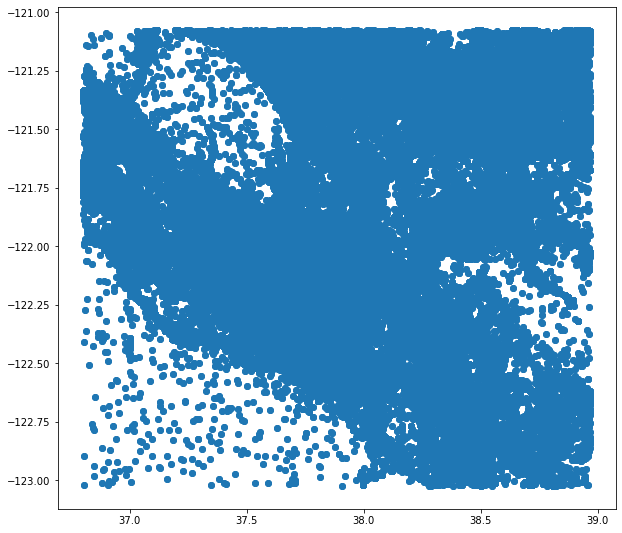

In [91]:
centroidsgdf = myh3.df_with_hexid_to_centroids_gdf(hexgdf, hexcolname='_id')
centroidsgdf.plot()

In [92]:
smooth_hexgdf=myh3.kring_smoother(hexgdf, hexcolname='_id',  metric_col='nonresidents')
smooth_hexgdf.rotate(270, origin = (0,0), use_radians=False).plot(column='nonresidents')

MemoryError: Unable to allocate 1.50 GiB for an array with shape (201977524,) and data type int64